<center><br><font size=10>Machine Leraning Project</font><br>
<font size=6>Noa Rifinski 206572018 and May Magen 209373356</font>
<br><br>
<b>Introduction to Machine Learning – Digital Sciences for High-Tech</b>
<br><i>30/06/2023</i></center>

# Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn import svm, preprocessing, datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, roc_auc_score, mean_squared_error, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.base import BaseEstimator

# Part 1 - Exploration

In [2]:
df = pd.read_csv('train.csv') #load the data
features = df[df.columns[:-1]] #save the features columns
labels = df['label']  #save the label column

Let's take a brief look at the first two examples in order to understand what the data looks like, learn about the types of variables and their nature.

In [3]:
df.head(2).T

0  \
sha256               a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd...   
size                                                           6744064   
vsize                                                        6799360.0   
imports                                                          524.0   
exports                                                            3.0   
has_debug                                                          0.0   
has_relocations                                                    1.0   
has_resources                                                      1.0   
has_signature                                                      0.0   
has_tls                                                            1.0   
symbols                                                            0.0   
numstrings                                                     64882.0   
paths                                                              0.0   
urls                                                               0.0   
registry                                                           0.0   
MZ                                                                28.0   
printables                                                    899075.0   
avlength                                                     13.857079   
file_type_trid                Win32 EXE PECompact compressed (generic)   
file_type_prob_trid                                               64.2   
A                                                            -3.978981   
B                                                             5.732354   
C                                                                   er   
label                                                                1   

                                                                     1  
sha256               ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf01...  
size                                                             22016  
vsize                                                          45056.0  
imports                                                            2.0  
exports                                                            0.0  
has_debug                                                          0.0  
has_relocations                                                    0.0  
has_resources                                                      1.0  
has_signature                                                      0.0  
has_tls                                                            0.0  
symbols                                                            0.0  
numstrings                                                        89.0  
paths                                                              0.0  
urls                                                               0.0  
registry                                                           0.0  
MZ                                                                 1.0  
printables                                                       856.0  
avlength                                                      9.617978  
file_type_trid                    Win32 Dynamic Link Library (generic)  
file_type_prob_trid                                               38.4  
A                                                             7.064133  
B                                                             5.738201  
C                                                                   er  
label                                                                0

Main conclusions that can be drawn about the types of data -<br>
* The features: size, vsize, imports, exports, exports, numstrings, MZ, printables, avlength, file_type_prob_trid, A, B are numerical values (discrete and continuous).<br>
* The features: has_debug, has_relocations, has_resources, has_signature, has_tls are binary variables. <br>
* The features: file_type_trid, C are categorical variables.<br>
* The values of the variables are in different orders of magnitude - for example, 'size' is described in very large numbers compared to 'avlength' which is in relatively small orders of magnitude.

We will describe the data in order to get more information about the features distribution:

In [4]:
df.describe().T

count          mean           std         min  \
size                 60000.0  1.501019e+06  4.727391e+06  298.000000   
vsize                58065.0  1.965704e+06  2.017881e+07  544.000000   
imports              58261.0  1.061957e+02  2.134523e+02    0.000000   
exports              57907.0  3.080327e+01  5.080795e+02    0.000000   
has_debug            57073.0  4.037636e-01  4.906555e-01    0.000000   
has_relocations      56676.0  5.430694e-01  4.981460e-01    0.000000   
has_resources        58039.0  8.604559e-01  3.465164e-01    0.000000   
has_signature        58063.0  2.541894e-01  4.354083e-01    0.000000   
has_tls              57102.0  2.341949e-01  4.234983e-01    0.000000   
symbols              57344.0  4.017247e+01  1.239702e+03    0.000000   
numstrings           57282.0  7.404344e+03  2.463088e+04    1.000000   
paths                56340.0  1.644799e+00  3.700375e+01    0.000000   
urls                 57651.0  1.250129e+01  7.163172e+01    0.000000   
registry             57475.0  4.292823e-01  1.149686e+01    0.000000   
MZ                   56911.0  1.626343e+01  8.219309e+01    1.000000   
printables           57261.0  1.207710e+05  6.052203e+05    5.000000   
avlength             57243.0  3.265851e+01  1.094711e+03    5.000000   
file_type_prob_trid  60000.0  5.367875e+01  2.063248e+01   17.500000   
A                    56296.0  4.015404e+00  6.368440e+00  -17.783199   
B                    56249.0  5.810361e+00  6.412076e-01    0.004929   
label                60000.0  5.000000e-01  5.000042e-01    0.000000   

                               25%            50%           75%           max  
size                 107008.000000  483328.000000  1.239326e+06  3.253537e+08  
vsize                122880.000000  421888.000000  1.601536e+06  4.278288e+09  
imports                   1.000000      28.000000  1.520000e+02  1.504700e+04  
exports                   0.000000       0.000000  0.000000e+00  4.884000e+04  
has_debug                 0.000000       0.000000  1.000000e+00  1.000000e+00  
has_relocations           0.000000       1.000000  1.000000e+00  1.000000e+00  
has_resources             1.000000       1.000000  1.000000e+00  1.000000e+00  
has_signature             0.000000       0.000000  1.000000e+00  1.000000e+00  
has_tls                   0.000000       0.000000  0.000000e+00  1.000000e+00  
symbols                   0.000000       0.000000  0.000000e+00  1.816600e+05  
numstrings              475.000000    1990.500000  5.172000e+03  1.572261e+06  
paths                     0.000000       0.000000  1.000000e+00  5.324000e+03  
urls                      0.000000       0.000000  1.000000e+01  9.387000e+03  
registry                  0.000000       0.000000  0.000000e+00  2.492000e+03  
MZ                        1.000000       4.000000  1.100000e+01  7.010000e+03  
printables             6013.000000   22835.000000  7.615600e+04  5.034687e+07  
avlength                  7.447368      12.009456  1.731065e+01  2.079909e+05  
file_type_prob_trid      38.400000      43.300000  6.910000e+01  1.000000e+02  
A                        -0.293525       3.658333  7.863973e+00  4.392660e+01  
B                         5.469978       5.856659  6.344090e+00  6.584937e+00  
label                     0.000000       0.500000  1.000000e+00  1.000000e+00

Looking at the data description table and from the feature information we received, we can see that - <br>
1. size - Size of file on disk<br>
vsize - Virtual size – size of the file image when loaded into memory<br>
imports - Number of imported functions<br>
exports - Number of exported functions<br>
symbols - Number of symbols<br>
numstrings - The number of printable strings that are at least five printable characters long<br>
avlength - Average string length<br>
printables - Number of printable characters<br>
paths - number of strings that begin with C:\ (case insensitive) that may indicate a path<br>
urls - Number of occurrences of http:// or https:// (case insensitive) that may indicate a URL<br>
registry - the number of occurrences of HKEY_ that may indicate a registry key<br>
MZ - the number of occurrences of the short string MZ that may provide weak evidence of a Windows PE dropper or bundled executables<br><br>
The scale in which these features are described is in very large numbers.<br> It can be seen that there is a huge difference between the smallest example and the largest example (it is possible that later we will find many outliers for these features).<br> Also, the variation of the samples is very large, another thing that can indicate outliers.<br><br>
2. has_debug -Whether a file has a debug section - a binary feature where the average value is 0.49 and we conclude that this feature is balanced at the level of its division into 0 and 1 with a slight advantage to 0.<br><br>
3. has_relocations - Whether a file has relocations - a binary feature in which the average value is 0.54 and we conclude that this feature is less balanced in terms of its division into 0 and 1 with a slight advantage to 1.<br><br>
4. has_resources - Whether a file has resources - a binary feature where the average value is 0.86 and we conclude that the feature is not balanced at all and that most of the values in it are 1.<br><br>
5. has_signatures - Whether - a binary feature where the average value is 0.25 and we conclude that the feature is not balanced at all and that most of the values in it are 0.<br><br>
6. has_tls - Whether a file has thread local storage - a binary feature where the average value is 0.23 and we conclude that the feature is not balanced at all and that most of the values in it are 0. <br><br>
7. file_type_prob_trid - a numeric feature representing the probability of mentioned file type.<br> Described with variance and the difference between the end values is smaller than the other numerical variables.<br><br>
8. A - Anonymous columns - described with variance and the difference between the end values is smaller than the other numerical variables.<br><br>
9. B - Anonymous columns - described with variance and the difference between the end values is smaller than the other numerical variables.<br>

We will divide the names of the variables according to their type - numerical, binary and categorial:

In [5]:
def division_into_features(numeric_lst, binary_lst, categorical_lst):
    numeric_lst.extend(['size', 'vsize', 'imports', 'exports', 'symbols', 'numstrings', 'avlength', 'printables', 'paths', 'urls', 'registry', 'MZ', 'file_type_prob_trid', 'A', 'B'])
    binary_lst.extend(['has_debug', 'has_relocations', 'has_resources', 'has_signature', 'has_tls'])
    categorical_lst.extend(['C', 'file_type_trid'])

In [6]:
numeric_features,binary_features,categorical_features = [], [], []
division_into_features(numeric_features, binary_features,categorical_features)

In this section several functions are written and will be used later on for plotting the distribution of features.

In [7]:
# Function for plotting a histogram of one feature by the label

def plot_hist_by_label(df, feature_name, ax=None):
    benign = df[df['label'] == 0][feature_name].values     #save the benign examples    (y=0)
    malicious = df[df['label'] == 1][feature_name].values  #save the malicious examples (y=1)
    #percentile_99 = np.nanpercentile(df[feature_name], 99) #set the 99 percentile to "cut" the edges 
    #percentile_1 = np.nanpercentile(df[feature_name], 1)   #set the 1 percentile to "cut" the edges
    #bins = np.linspace(percentile_1, percentile_99, 50)    #set the size and limits of the bins
    ax.hist(malicious, bins=30, alpha=0.5, color='royalblue', label='malicious', edgecolor='black', linewidth=0.8)
    ax.hist(benign, bins=30, alpha=0.5,color='plum',   label='benign', edgecolor='black', linewidth=0.8)
    ax.set_title(f"{feature_name} Histogram by Label")
    ax.legend(loc='upper right')

# Function for plotting a histogram of one feature 
def plot_hist_regular(df, feature_name, ax=None):
    if ax is None:  
        _, ax = plt.subplots(figsize=(3, 3))
    df[feature_name].hist(color='darkseagreen', ax=ax, bins=30, edgecolor='black', linewidth=0.8)
    ax.set_title(f'{feature_name} Histogram')
    ax.set_xlabel('Label')
    ax.set_ylabel('Frequency')
    ax.grid(False)
    
# Function for plotting a boxplot of one feature by the label
def plot_boxplot(df, feature, log=False, ax=None):
    palette = ['plum', 'royalblue']  # Define a list of colors for the labels
    sns.boxplot(data=df, x='label', y=feature, ax=ax, palette=palette)
    ax.set_xlabel('label')
    ax.set_ylabel(feature)
    ax.set_yscale('log' if log else 'linear')
    ax.set_title(f"{feature} Boxplot")

# Function for plotting a numeric feature - present 2 histogram one next to the other   
def plot_numeric(df, feature_name):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    plot_hist_by_label(df, feature_name, ax=axes[1])   #on the left we will see the "label" histogram
    plot_hist_regular(df, feature_name, ax=axes[0])    #on the left we will see the "regular" histogram
    fig.suptitle(f'{feature_name} graphs', fontsize=16)
    plt.tight_layout()
    plt.show()

# Function for plotting a binary feature - bar of benign devided to 0/1 and another one for malicious
def prop_binary(feature_name, feature):
    counts = pd.crosstab(feature, labels)
    ax = counts.plot(kind="bar", figsize=(7, 4), color=['plum', 'royalblue'],edgecolor='black', linewidth=0.8 )
    ax.set_title(f"benign vs malicious for {feature_name}")
    ax.set_xlabel(f"{feature_name} = NO                  {feature_name} = YES")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.legend(["benign (0)", "malicious (1)"])
    ax.set_ylabel('Amount')
    ax.legend(["benign (0)", "malicious (1)"], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    for label in ax.containers:
        ax.bar_label(label,label_type='center')
    plt.show()

# Function for plotting a categorial feature - bar for each category devided to 0/1 labels
def prop_categorical(feature_name, feature):
    cross_table = pd.crosstab(feature, labels)
    cross_table.plot(kind="bar", figsize=(14, 5), color=['royalblue', 'plum'], edgecolor='black', linewidth=0.8)
    plt.title(f"Benign vs. Malicious for {feature_name}")
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.legend(['Malicious', 'Benign'])
    plt.show()
    
# Function for plotting the distribution of a feature
def plot_distribution(df, feature_name, feature, ax=None):
    palette = ['plum', 'royalblue']  # Define a list of colors for the labels
    sns.kdeplot(data=df, x=feature, hue='label', ax=ax, palette=palette)
    ax.set_title(f"{feature_name} Density Plot") 

# Function for plotting a normalized feature - present histogram by label, boxplot and densplot
def plot_graphs_normalized_feature(df, feature_name):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    plot_hist_by_label(df, feature_name, ax=axes[0])
    plot_boxplot(df, feature_name, ax=axes[1])  
    plot_distribution(df, feature_name, df[feature_name], ax=axes[2])
    fig.suptitle(f'{feature_name} graphs', fontsize=16)
    plt.tight_layout()
    plt.show()
    

To see the label distribution, we will use a histogram

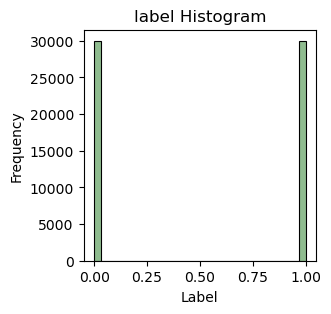

In [8]:
plot_hist_regular(df, 'label')

It can be seen that the data is completely balanced and this conclusion will benefit our models later on.

Now we would like to examine the distribution of the binary features together with the label and draw conclusions about each feature

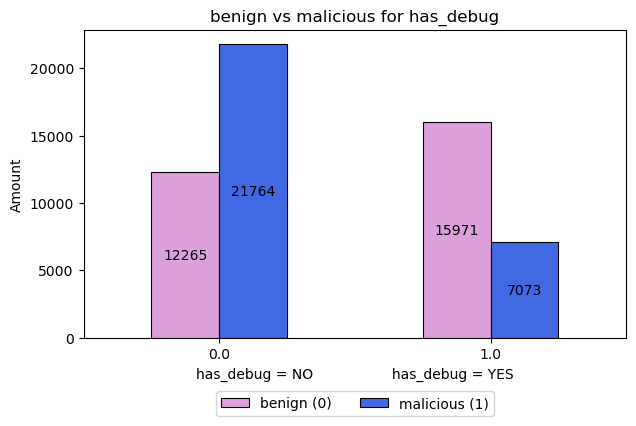

In [9]:
prop_binary('has_debug',df['has_debug'])

It can be seen that the 'has_debug' feature is not balanced in terms of the amount of examples that have debug and those that don't.<br>  The majority of examples don't have debug.<br>
Also, within each type (with or without debug) the division into malicious or benign is not balanced.<br>
In addition, we can tell that for examples without debug there are more labels that are malicious, but for examples with debug- most of the labels are benign.

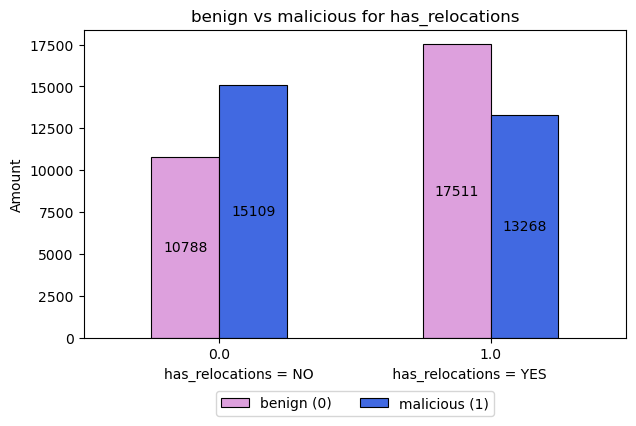

In [10]:
prop_binary('has_relocations',df['has_relocations'])

It can be seen that the 'has_relocations' feature is not balanced in terms of the amount of examples that have relocations and those that don't.<br><be> Most of the examples have relocations.<br>
Also, within each type (with or without relocations) the division into malicious or benign is not balanced.<br>
In addition, we can tell that for examples without relocations there are more labels that are malicious compared to examples with relocations where most of the labels are benign.

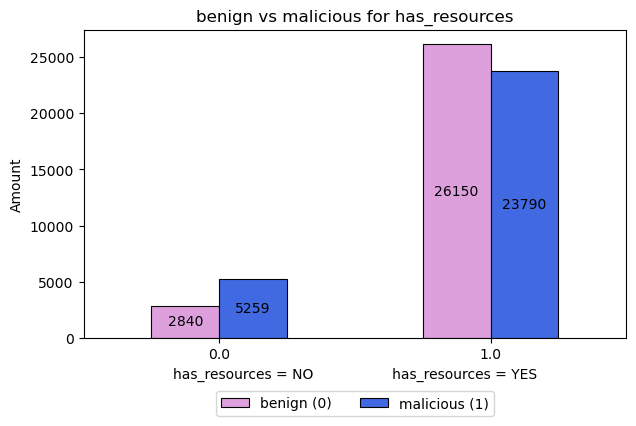

In [11]:
prop_binary('has_resources',df['has_resources'])

It can be seen that the 'has_resources' feature is not balanced at all in terms of the amount of examples, the majority of the examples have resources.<br>
Also, within each type (with or without resources) the division into malicious or benign is not balanced.<br>
In addition, we can tell that for examples without resources there are more labels that are malicious compared to examples with resources where most of the labels are benign but there is not such a big gap between the quantities.

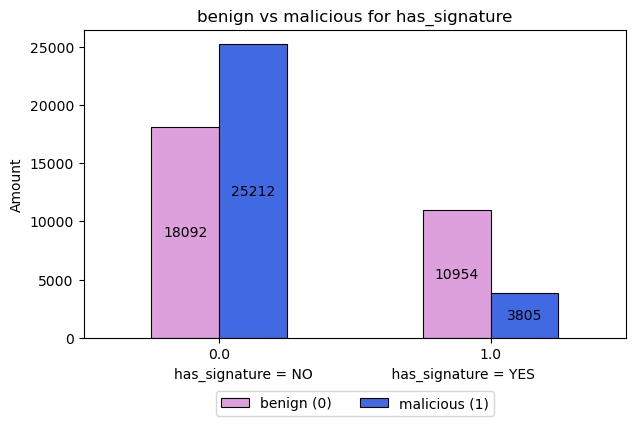

In [12]:
prop_binary('has_signature',df['has_signature'])

It can be seen that the 'has_signature' feature is not balanced in terms of the number of examples, the majority of the examples don't have a signature.<br>
Also, within each type (with or without a signature) the division into malicious or benign is not balanced.<br>
We can tell that for examples without a signature there are more labels that are malicious compared to samples with a signature where most of the labels are benign and that in both there is a relatively large gap between the quantities.

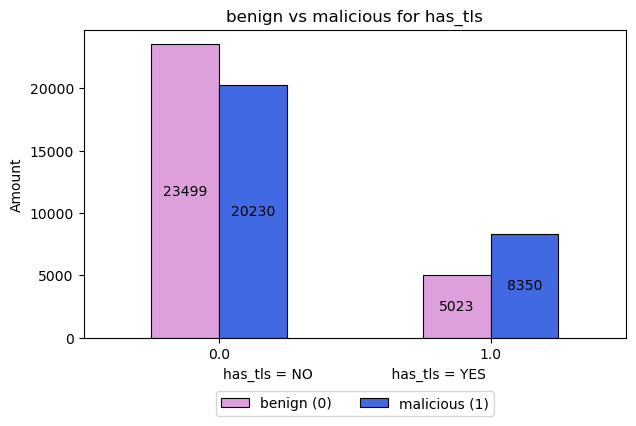

In [13]:
prop_binary('has_tls',df['has_tls'])

It can be seen that the 'has_tls' feature is not balanced in terms of the amount of examples, the majority of the examples don't have tls. <br>
Also, within each type (with or without tls) the division into malicious or benign is not balanced.<br>
We can tell that for examples without tls there are more labels that are benign, compared to examples with tls where most of the labels are malicious.

We will move on and look at the distribution of the categorical features:

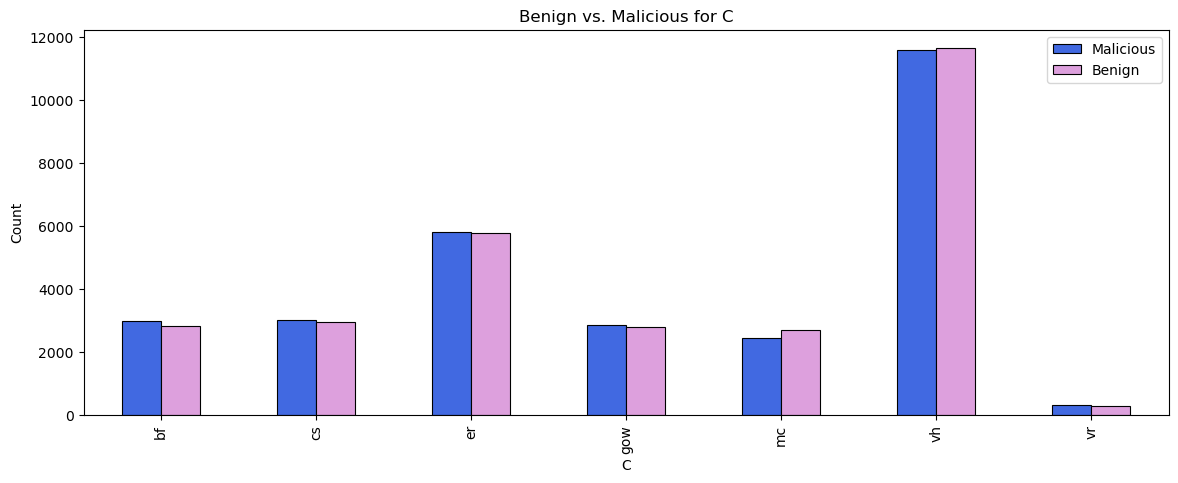

In [14]:
prop_categorical('C',df['C'])

It can be seen that feature 'C' is very balanced in the division of each of its categories into malicious and benging.<br > It is possible that due to this conclusion we will later decide to drop this feature because it probably won't contribute to our predication.

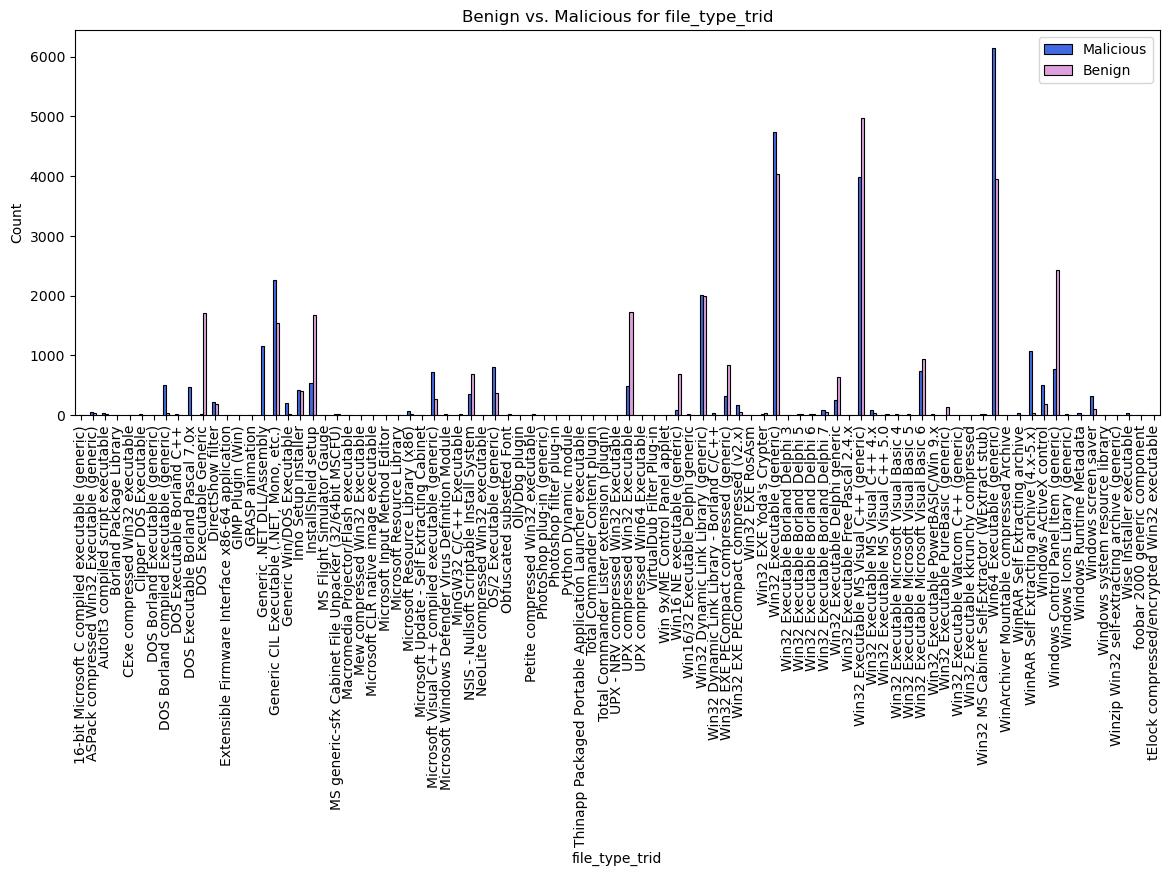

In [15]:
prop_categorical('file_type_trid',df['file_type_trid'])

It appeares that the 'file_type_trid' feature has a very large amount of categories and that some of them have a large number of examples and some have a smaller number of examples- are less common. <br>
Later we will examine whether it is worthwhile to unite "small" categories in order to reduce the number of dimensions of the feature.

We will finish with the analysis of the distribution of the numerical features and see what can be learned about each one and whether they are normally distributed in order to use this assumption later on.

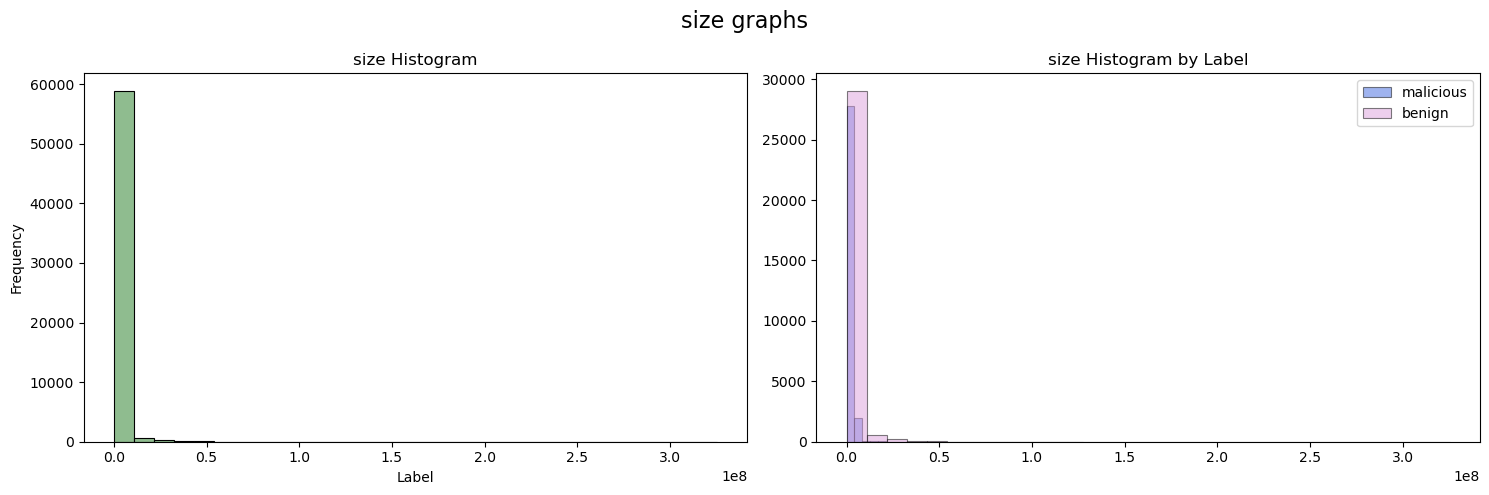

In [16]:
plot_numeric(df, 'size')

According to the graph we can see that most of the samples have similar sizes, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
In addition, it can be seen that there is a difference between the size distribution between malicious examples and benign examples.<br>
We can learn that the larger the size is, more examples are benign.<br>
From looking at these graphs, we can assume that the feature is not normally distributed.

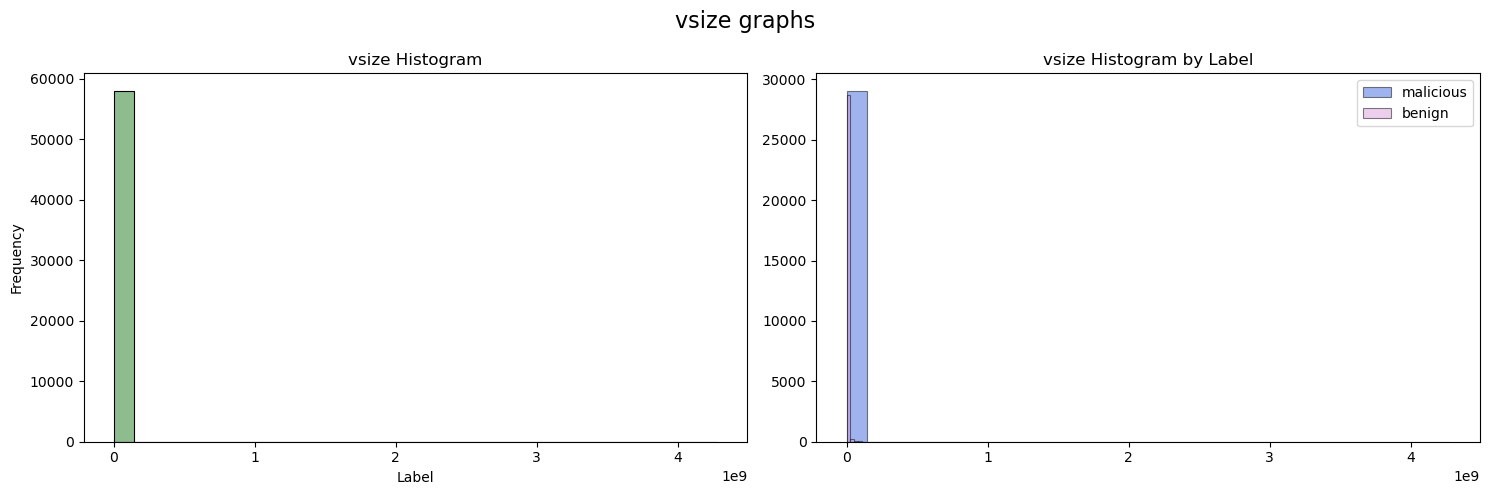

In [17]:
plot_numeric(df, 'vsize')

The distribution of vsize is similar to that of size.<br>
According to the graph we can see that most of the samples have similar vsizes, but according to the scale of the X-axis we can see that there are outlier value (we will deal with that later).<br>
In addition, it can be seen that there is a difference between the vsize distribution between malicious examples and benign examples.<br>
We can lear that the larger the vsize is, more examples are malicious <br>
From looking at these graphs, we can assume that the feature is not normally distributed.

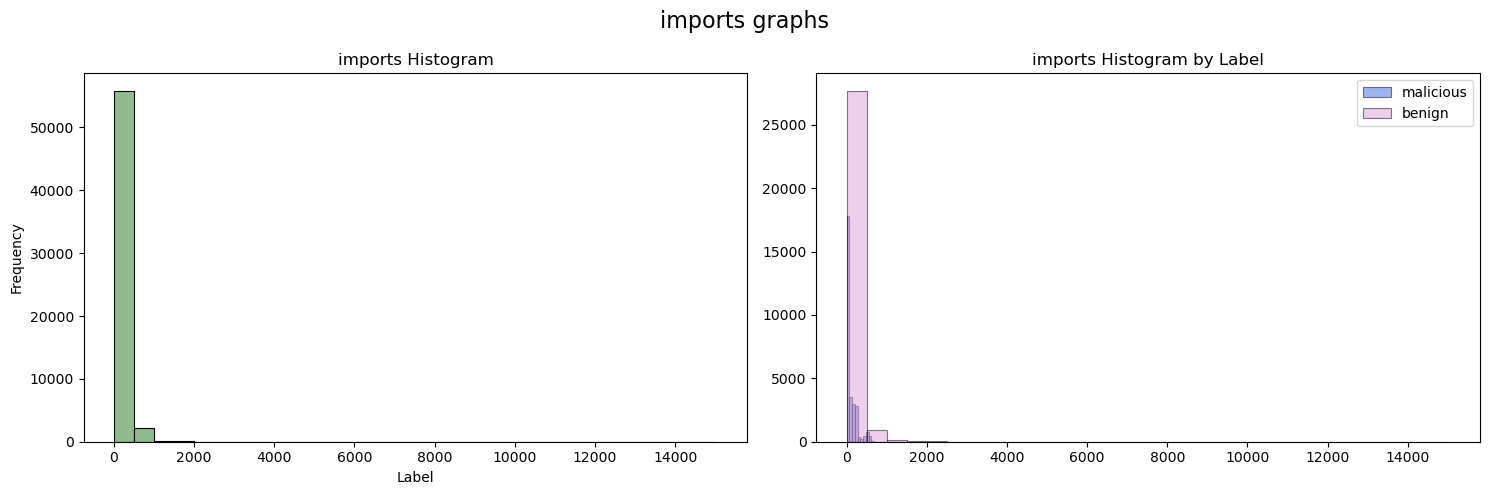

In [18]:
plot_numeric(df, 'imports')

According to the graph we can see that most of the samples have similar and small numbers of imports, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
<be>
After splitting according to the type of label, one can see the big differences in the distribution between malicious and benign examples. <br>
We can learn that as the number of imports is greater, the more we get examples that are benign.<br>
From looking at these graphs, we can assume that the feature is not normally distributed.

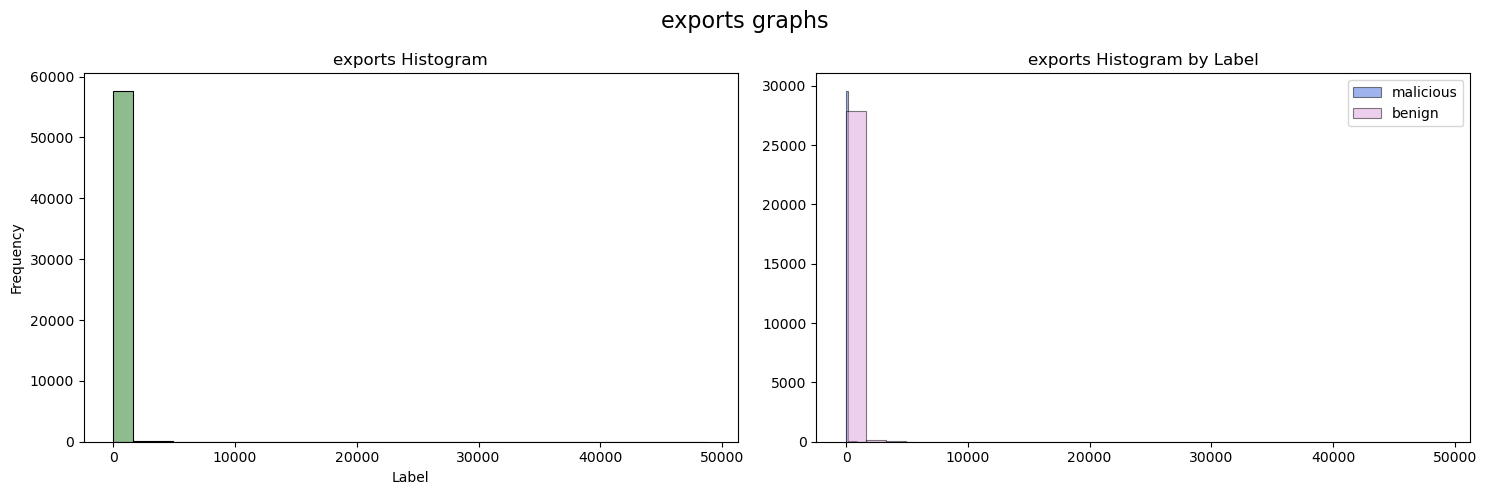

In [19]:
plot_numeric(df, 'exports')

According to the graph we can see that most of the samples have similar and small numbers of exports, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
<be>
After splitting according to the type of label, one can see the big differences in the distribution between malicious and benign examples. <br>
We can learn that as the number of exports is greater, the more we get examples that are benign.<br>
From looking at these graphs, we can assume that the feature is not normally distributed.

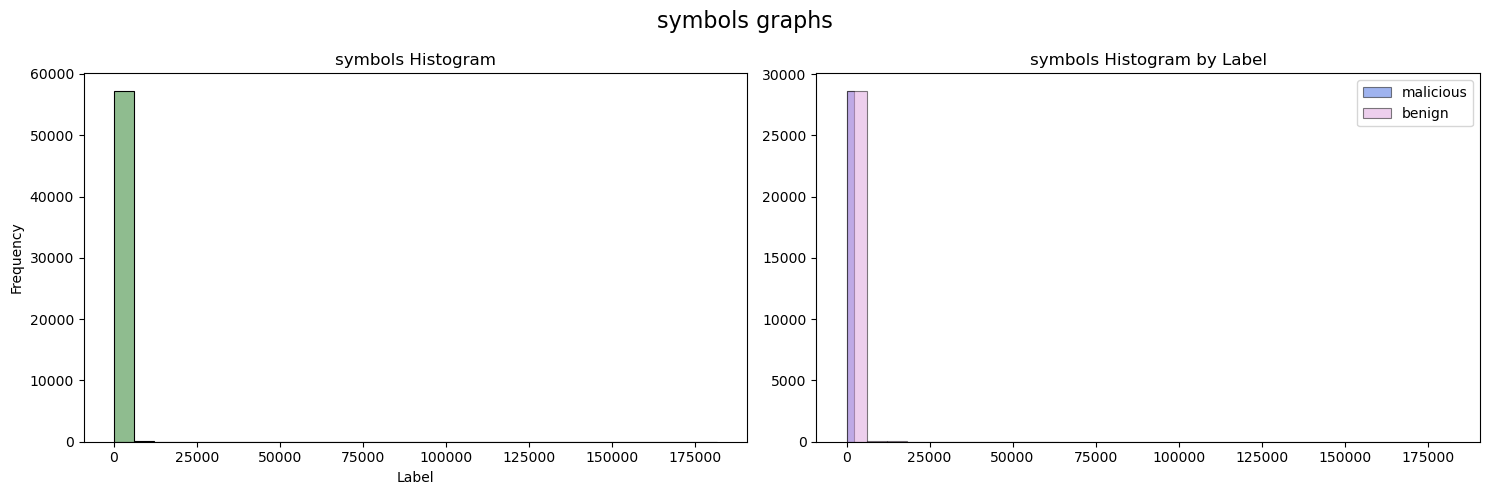

In [20]:
plot_numeric(df, 'symbols')

According to the graph we can see that most of the samples have similar and small numbers of symbols, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
<be>
After splitting according to the type of label, one can see the big differences in the distribution between malicious and benign examples. <br>
We can learn that as the number of symbols is greater, the more we get examples that are benign.<br>
From looking at these graphs, we can assume that the feature is not normally distributed.

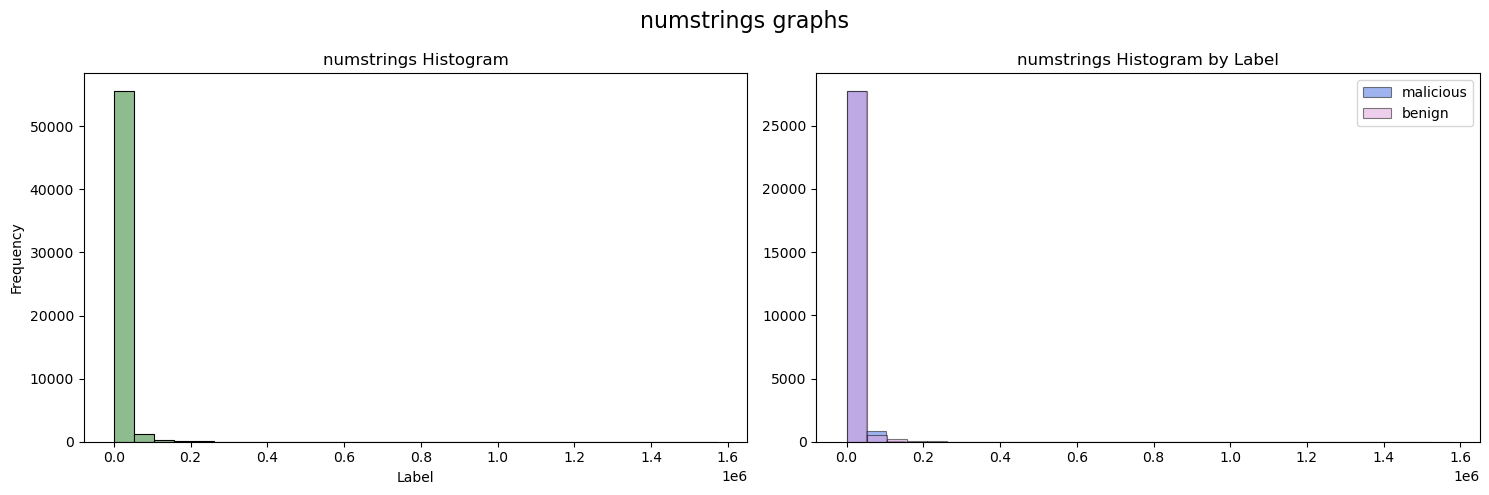

In [21]:
plot_numeric(df, 'numstrings')

According to the graph we can see that most of the samples have similar numstrings values, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
<be>
After splitting according to the type of label, one can see that the distribution between malicious and benign examples is really similar. <br>
From looking at these graphs, we can assume that the feature is not normally distributed.

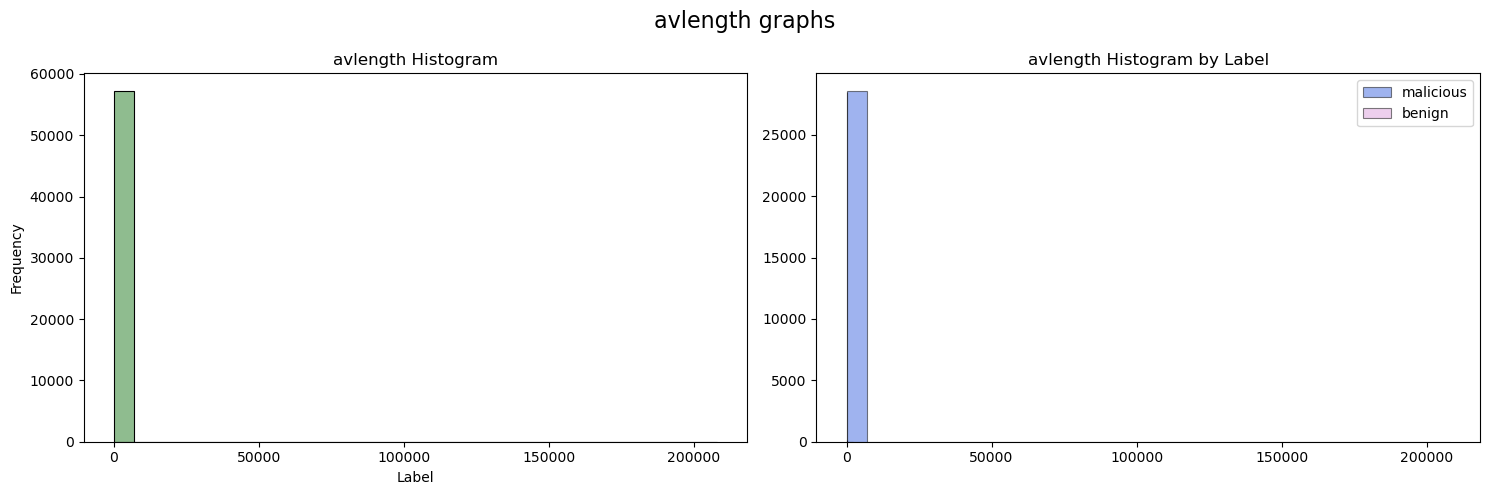

In [22]:
plot_numeric(df, 'avlength')

According to the graph we can see that most of the samples have a similar avlength, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
<be>
After splitting according to the type of label, we can see that the most of the sampels are malicious. (we can't see the bengin samples on the graph probably because they are outliers or have a very small amount) <br>
From looking at these graphs, we can assume that the feature is not normally distributed.

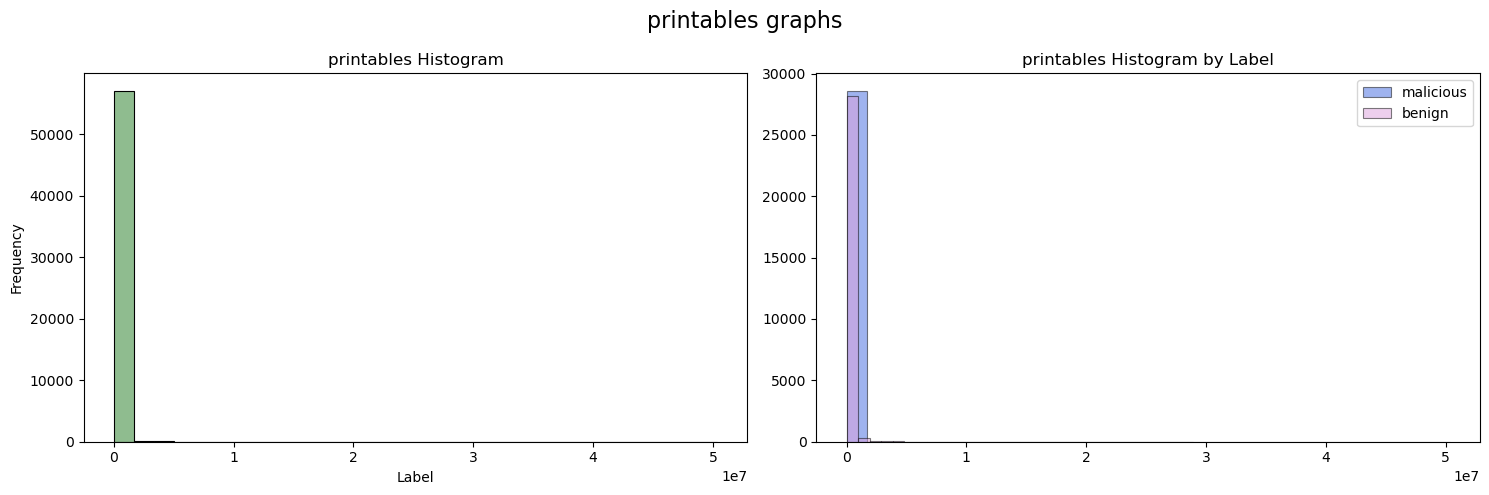

In [23]:
plot_numeric(df, 'printables')

According to the graph we can see that most of the samples have similar and small values of printables, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
<be>
After splitting according to the type of label, we can see the differences in the distribution between malicious and benign examples. <br>
We can learn that as the number of printables is greater, the more we see get examples that are malicious.<br>
From looking at these graphs, we can assume that the feature is not normally distributed.

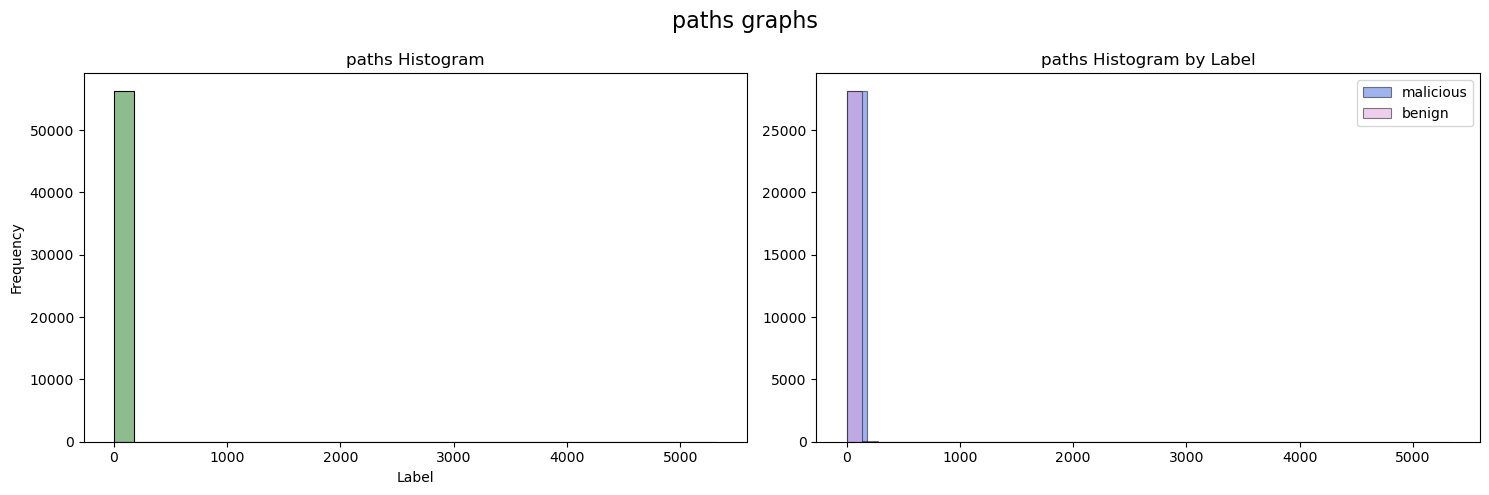

In [24]:
plot_numeric(df, 'paths')

According to the graph we can see that most of the samples have similar and small values of paths, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
<be>
After splitting according to the type of label, we can see that there isn't a big difference in the distribution between malicious and benign examples. <br>
From looking at these graphs, we can assume that the feature is not normally distributed.

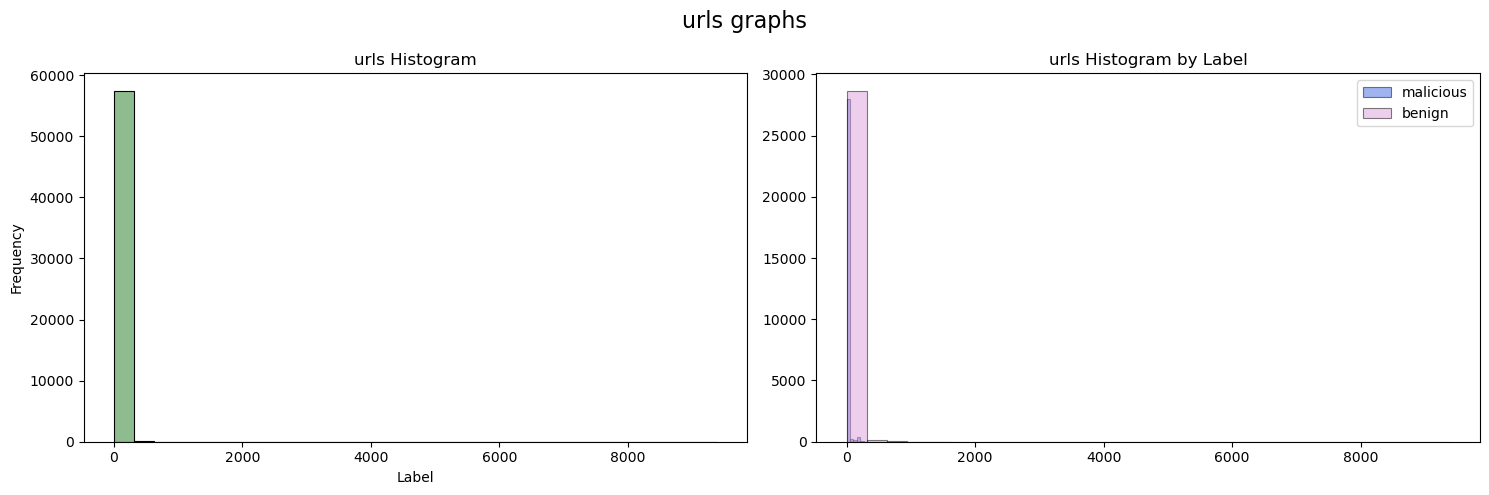

In [25]:
plot_numeric(df, 'urls')

According to the graph we can see that most of the samples have similar and small numbers of urls, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
<be>
After splitting according to the type of label, one can see the big differences in the distribution between malicious and benign examples. <br>
We can learn that the bigger the url, the more examples are benign.<br>
From looking at these graphs, we can assume that the feature is not normally distributed.

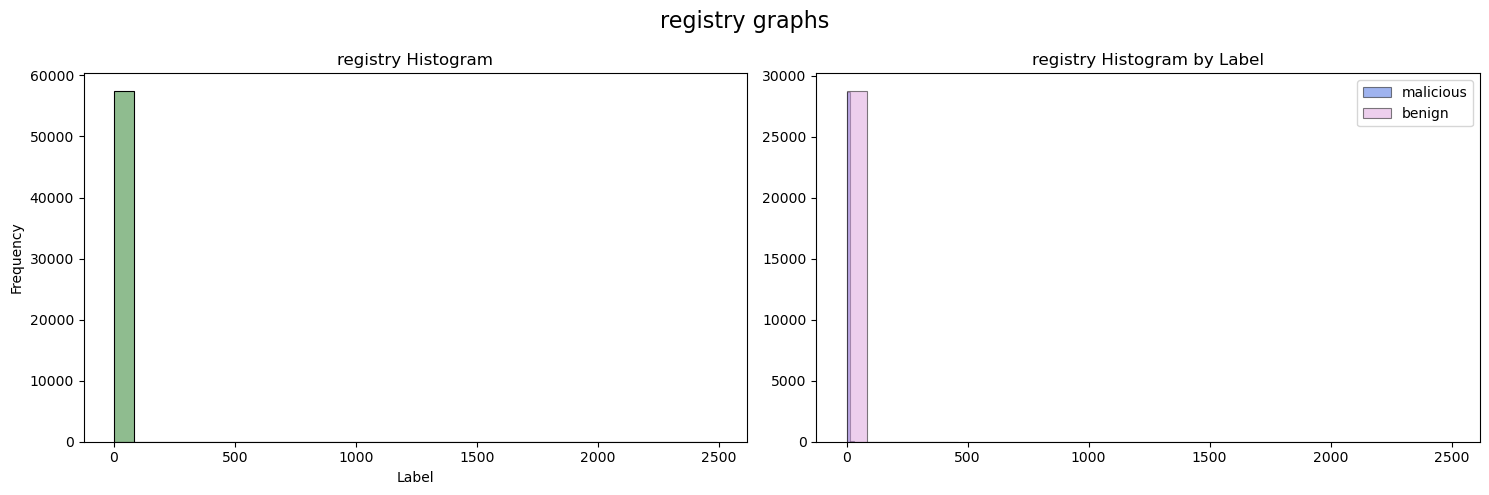

In [26]:
plot_numeric(df, 'registry')

According to the graph we can see that the registry feature gets the value 0 for the majority of the examples, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
<be>
After splitting according to the type of label, one can see the big differences in the distribution between malicious and benign examples. <br>
We can learn that as the number of registry is greater, the more we get examples that are benign.<br>
From looking at these graphs, we can assume that the feature is not normally distributed.

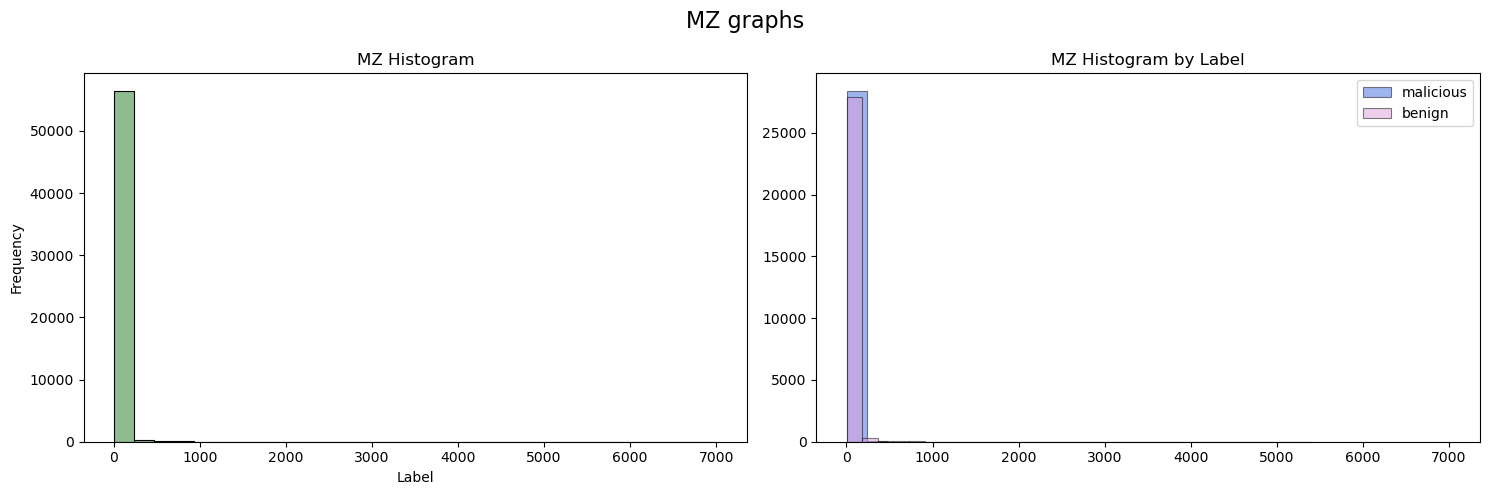

In [27]:
plot_numeric(df, 'MZ')

According to the graph we can see that most of the samples have similar and small values of MZ, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
<be>
After splitting according to the type of label, we can see that there isn't a big difference in the distribution between malicious and benign examples. <br>
From looking at these graphs, we can assume that the feature is not normally distributed.

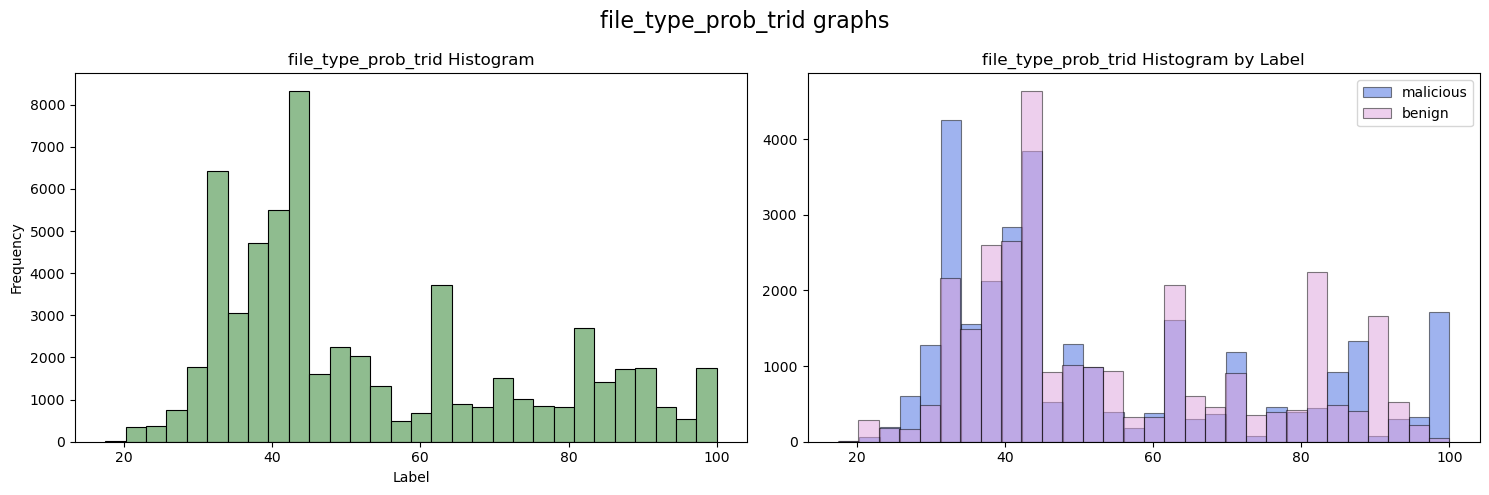

In [28]:
plot_numeric(df, 'file_type_prob_trid')

file_type_prob_trid accepts many values in the range between 0 and 100 (as mentioned these are probabilities).<br> The feature is not distributed normally.<br> 
After the division into malicious and benign, we can clearly see the difference between the quantities for each type, which may indicate the importance of this feature

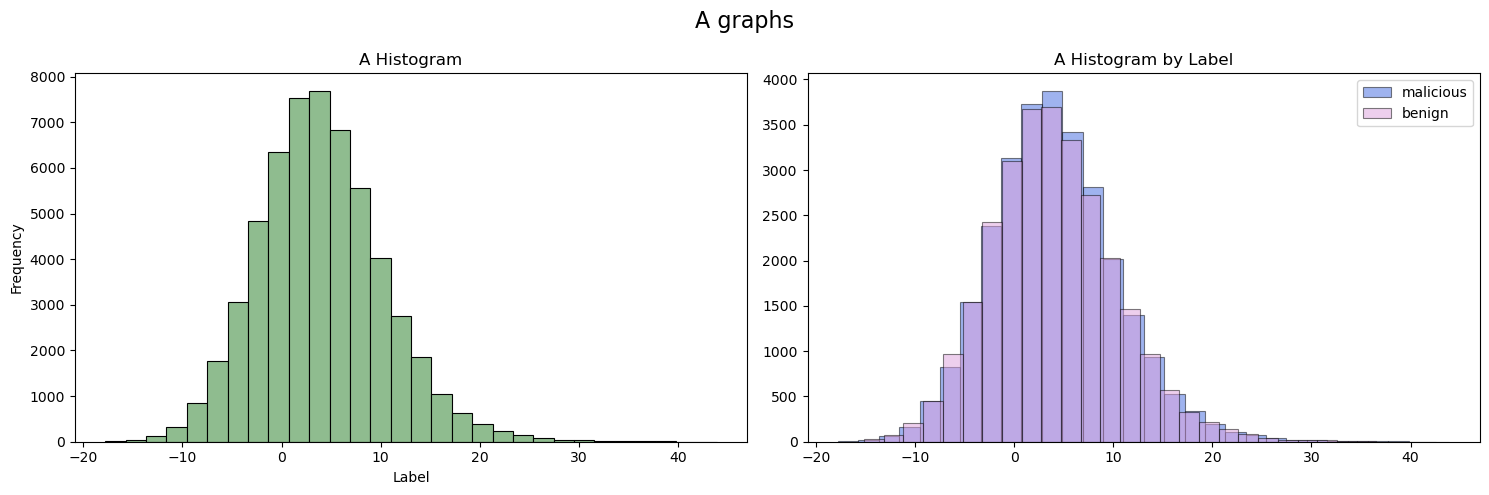

In [29]:
plot_numeric(df, 'A')

The feature A appears to be normally distributed.<br>
Beyond that, one can see that the division into malicious and bengin is really similar, later on we will discuss whether to drop this feature, since it may not contribute to the prediction.

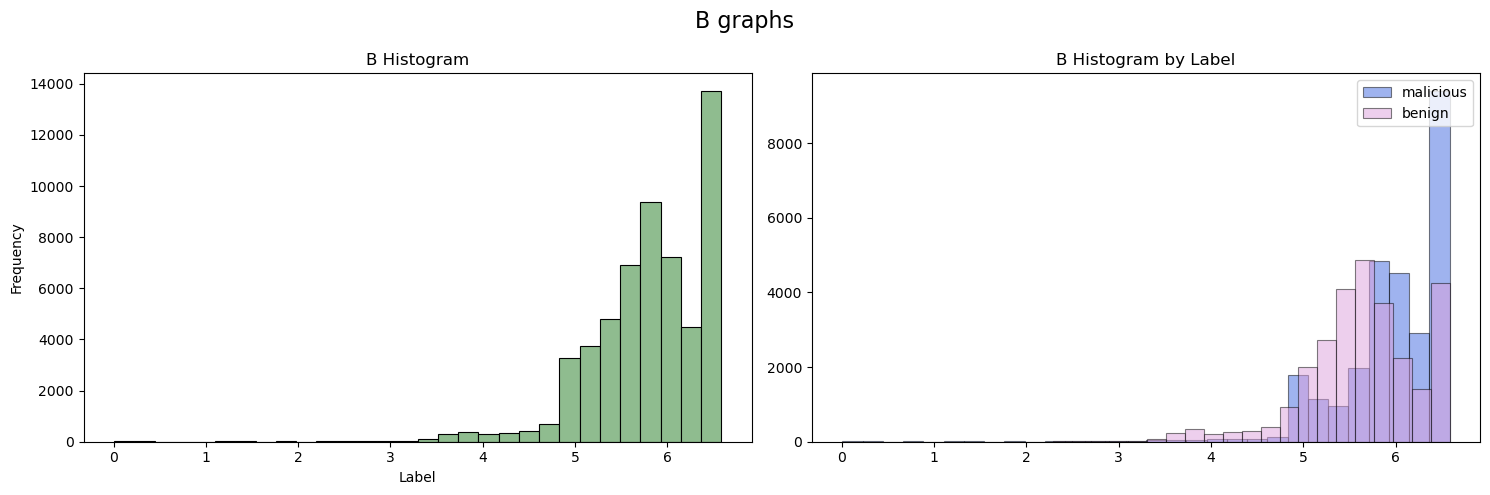

In [30]:
plot_numeric(df, 'B')

The feature B distribution looks approximately normal, but we won't assume that.
We can tell the differences between the distribution for malicious examples and bengin examples.

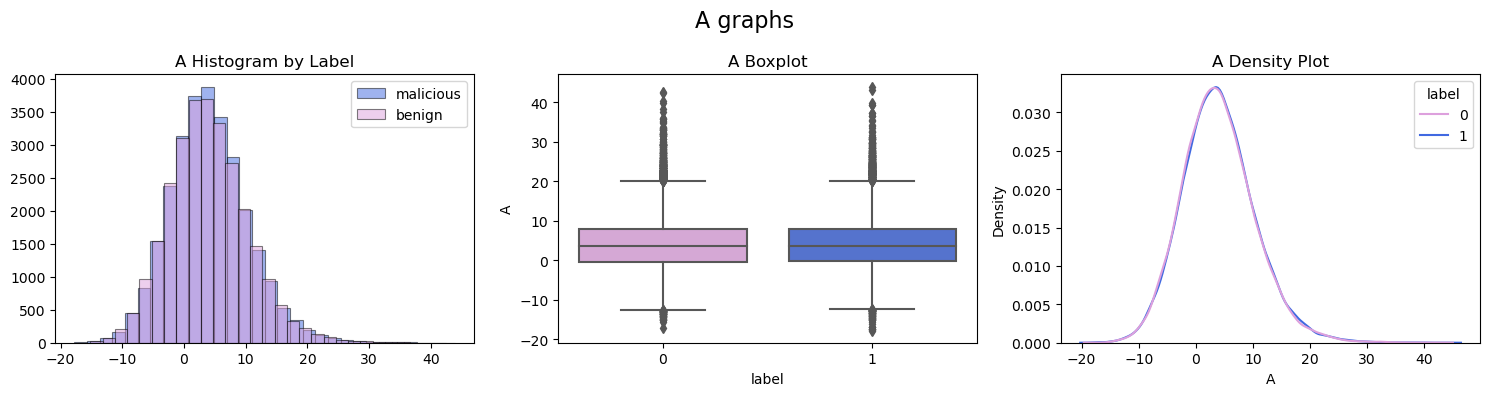

In [31]:
plot_graphs_normalized_feature(df, 'A')

Let's examine A again to as we saw that it appears to be normally distributed. Indeed the following graphs shows it clearly.<br> According to the density graph and according to the boxplot, we can see the great similarity between the types of labels as well as the manner of the normal distribution

In order to further handle the features but remove some of them, we will look at the correlation table and see if there are strong relationships between different features.

<Axes: >

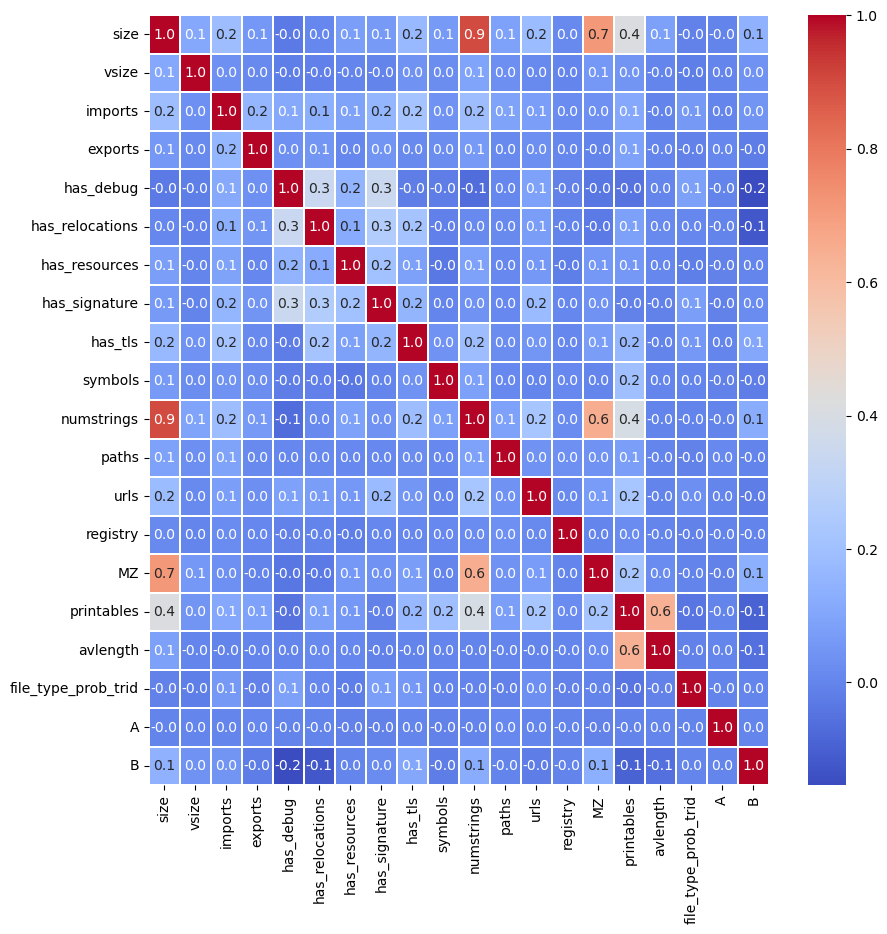

In [32]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(features.corr(), annot=True, linewidths=.2, fmt= '.1f',ax=ax,cmap='coolwarm')

From the correlation table it can be concluded that most of the features do not depend on each other because there is a very low correlation between most of them. <br>
However, the feature 'size' has a very strong positive correlation with 'numstrings' - this sounds logical because the more strings there are, the larger the file size should be. <br>
Also, the feature 'size' is in a strong positive correlation with 'MZ' and MZ is also in a strong relationship with numstring. <br>
As mentioned, these three features are correlated with each other and later we will use this claim for several purposes.

# Part 2 - Preprocessing

### Auxiliary functions for this part

NA handling function - <br>
The models we will run later in the project are - KNN, Logistic Regression, Decision Tree and Random Forest <br>
All these models, along with PCA later on, do not know how to deal with missing values, so we have to fill them in. <br>
We chose not to "throw" examples with missing values so we don't lose data and instead we handled the NA's in the following way:<br>
1. Binary features - we chose to fill by the most common value (0 or 1) of each feature with the understanding that an average is irrelevant for this type of variable. <br>
2. The MZ feature - as we have seen, there is a high correlation between this feature and size, so we chose to fill in the value of size from the same example of course. (it is important to note that at this stage the data is already after standardization). <br>
3. For the rest of the data we chose to fill in the average instead of the missing values.

In [33]:
def fill_na_all(df_for_values, df_to_fill):
    has_debug_fill_all_data = df_for_values['has_debug'].mode().iloc[0]
    has_relocations_fill_all_data = df_for_values['has_relocations'].mode().iloc[0]
    has_resources_all_data = df_for_values['has_resources'].mode().iloc[0]
    has_signature_fill_all_data = df_for_values['has_signature'].mode().iloc[0]
    has_tls_fill_all_data = df_for_values['has_tls'].mode().iloc[0]
    
    df_to_fill['has_debug'].fillna(has_debug_fill_all_data, inplace=True)
    df_to_fill['has_relocations'].fillna(has_relocations_fill_all_data, inplace=True)
    df_to_fill['has_resources'].fillna(has_resources_all_data, inplace=True)
    df_to_fill['has_signature'].fillna(has_signature_fill_all_data, inplace=True)
    df_to_fill['has_tls'].fillna(has_tls_fill_all_data, inplace=True)
    if 'MZ' in df_to_fill.columns:
        df_to_fill['MZ'].fillna(df_to_fill['size'], inplace=True)
    df_to_fill.fillna(df_for_values.mean(), inplace=True)

As we have seen, the file_type_trid feature is a categorical variable with a very large number of categories and some with a very small number of examples. <br>
Later, we will turn this feature into a dummy variable and in order not to create a very large number of categories we will want to unite small categories (categories with a very small number of examples- in this case we chose a thumb rule of all catagorize that contain less than 1% of the data).

In [136]:
def join_rare_categories (df_for_values, df_to_fill):
    file_types_count_per_category = df_for_values['file_type_trid'].value_counts()
    examples_count = df_for_values['file_type_trid'].count()
    categories_percentage = file_types_count_per_category / examples_count
    threshold = 0.01 
    small_categories = categories_percentage < threshold
    small_categories_names = categories_percentage[small_categories].index.tolist()

    df_to_fill['file_type_trid'] = df_to_fill['file_type_trid'].apply(lambda x: 'other_type' if (x in small_categories_names) or
                                                                          (x not in df_for_values['file_type_trid'].values) else x)

Treatment of categorical features - <br>
We would like to make the categorical feature into many features that will receive 1 only for their appropriate category. <br>
We will use the OneHotEncoder method as Dor said in the lesson (and not get_dummied which may cause errors) <br>
Additionally, instead of displaying the new features as 0 or 1 we would like to display them as the probability of getting this type of category- we have this data from the feature 'file_type_prob_trid'.

In [35]:
def categorical_variables_handling(df, show_probs):
    categorical_data = df[['file_type_trid']]
    probs = df['file_type_prob_trid']

    encoder = OneHotEncoder(sparse=False, drop='first')     # apply OneHotEncoder
    encoded_data = encoder.fit_transform(categorical_data)

    # create a new DataFrame with the encoded data
    df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['file_type_trid']))
    for col in df_encoded.columns:
        df_encoded[col] *= probs/100
    
    # concatenate the encoded DataFrame with the remaining columns
    df_encoded = pd.concat([df.drop(columns=['file_type_trid']), df_encoded], axis=1)

    return df_encoded

Define up new features - <br>
We would like to examine the relationship between several features in the data - <br>
1. imports/exports - we would like to see the ratio between the imports and exports and examine whether the relationship between them helps to understand the label. <br>
2. printables/symbols - We would like to see if the ratio between the number of printable characters and the number of symbols in the file helps to understand the type of label. <br>
3. vsize, numstrings, symbols, printables, paths, urls, MZ / size - We would like to examine the relationship between the number of features and the size of the file.
It is interesting to examine this to see unusual examples.
For example - we will expect to see for an example with a large value of vsize also a large value of size; an example with a small value of numstring we will expect also a small value of size.
It is clear that the scale in which the features are measured is different, but we expect to see a similar ratio - for non-exceptional examples, we expect the ratio to be mostly of the same order of magnitude.
If there is a very unusual relationship, for example size is very large and numstring is very small, then perhaps this is an unusual example that would be worth examining.

In [36]:
def define_new_fearures(df, numeric_features):
    df['imports/exports'] = df['imports']/df['exports'].apply(lambda x: max(1,x))
    numeric_features.append('imports/exports')
    df['symbols/printables'] = df['symbols']/df['printables'].apply(lambda x: max(1,x))
    numeric_features.append('symbols/printables')
    df['vsize/size'] = df['vsize']/df['size']
    numeric_features.append('vsize/size')
    df['numstrings/size'] = df['numstrings']/df['size'].apply(lambda x: max(1,x))
    numeric_features.append('numstrings/size')
    df['symbols/size'] = df['symbols']/df['size'].apply(lambda x: max(1,x))
    numeric_features.append('symbols/size')
    df['printables/size'] = df['printables']/df['size'].apply(lambda x: max(1,x))
    numeric_features.append('printables/size')
    df['paths/size'] = df['paths']/df['size'].apply(lambda x: max(1,x))
    numeric_features.append('paths/size')
    df['urls/size'] = df['urls']/df['size'].apply(lambda x: max(1,x))
    numeric_features.append('urls/size')
    df['MZ/size'] = df['MZ']/df['size'].apply(lambda x: max(1,x))
    numeric_features.append('MZ/size')

### Building new features and mathematical manipulation on existing features

In [37]:
define_new_fearures(df, numeric_features) # run of the function of building the new features of the data

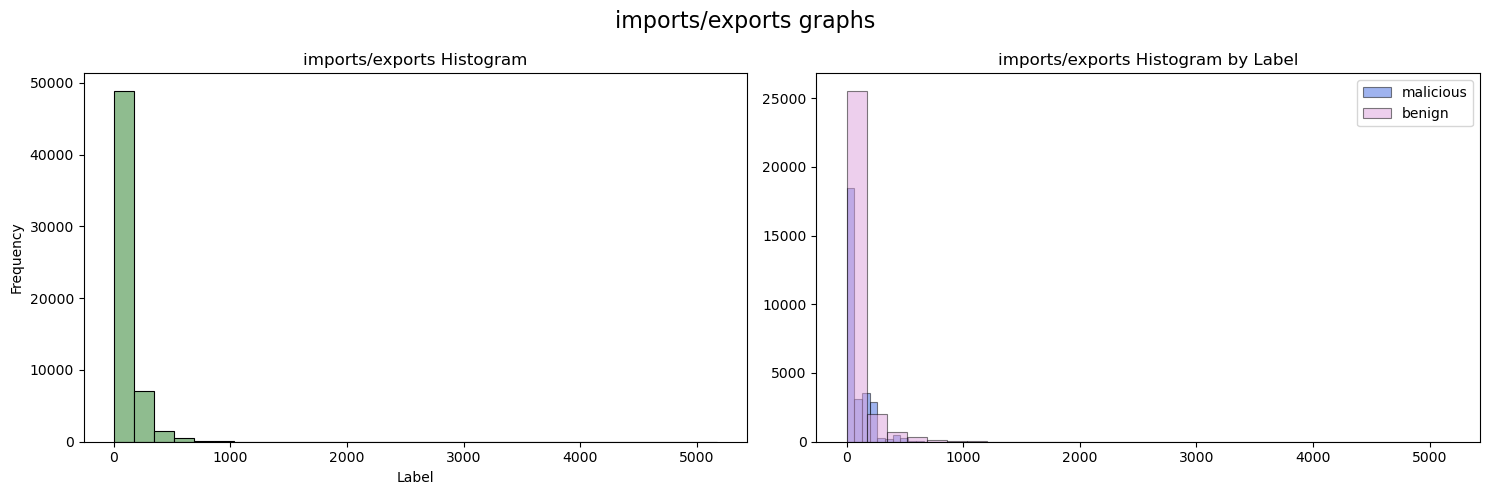

In [38]:
plot_numeric(df,'imports/exports')

In [39]:
df['imports/exports'].describe()

count    58261.000000
mean        79.571949
std        138.204543
min          0.000000
25%          1.000000
50%         17.000000
75%        126.000000
max       5173.000000
Name: imports/exports, dtype: float64

According to the graph we can see that most of the samples have similar values of imports/exports, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
In addition, it can be seen that there is a difference between the imports/exports distribution between malicious examples and benign examples.<br>
We can learn that the greater the value of import/export, the greater the chance that the examples are benign.<br>
From looking at these graphs, we can assume that the feature is not normally distributed.

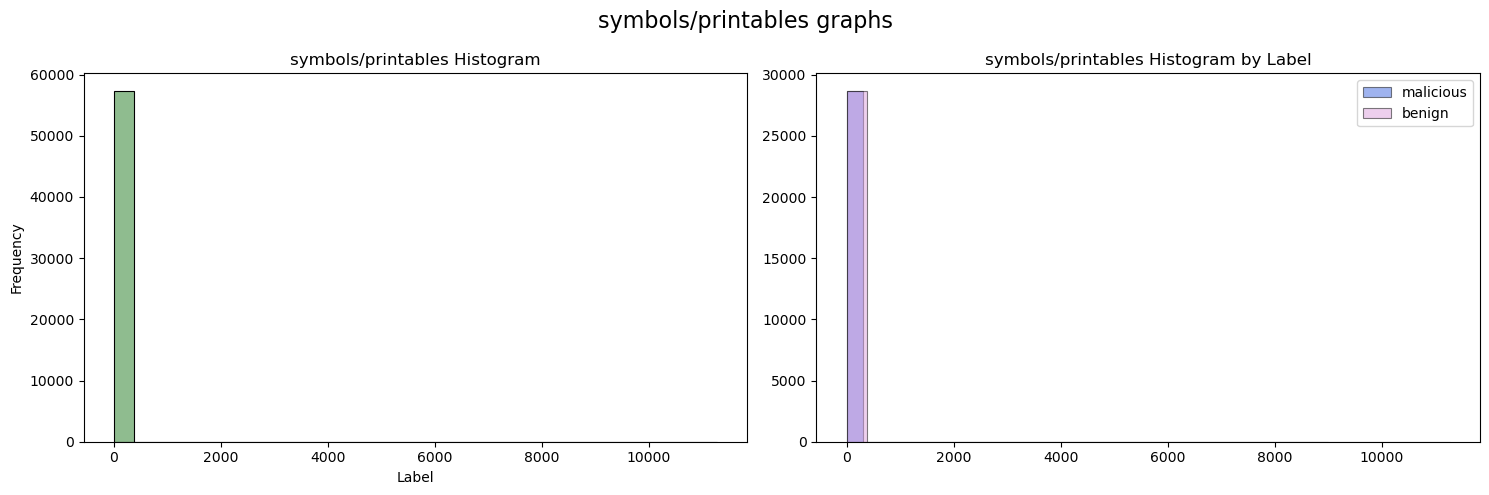

In [40]:
plot_numeric(df,'symbols/printables')

In [41]:
df['symbols/printables'].describe()

count    57344.000000
mean         1.036729
std         87.360530
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      11271.000000
Name: symbols/printables, dtype: float64

According to the graph we can see that most of the samples have similar values of symbols/printables, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
<be>
After splitting according to the type of label, one can see that the distribution between malicious and benign examples is really similar, later on we will discuss whether to drop this feature, since it may not contribute to the prediction.<br>
From looking at these graphs, we can assume that the feature is not normally distributed.

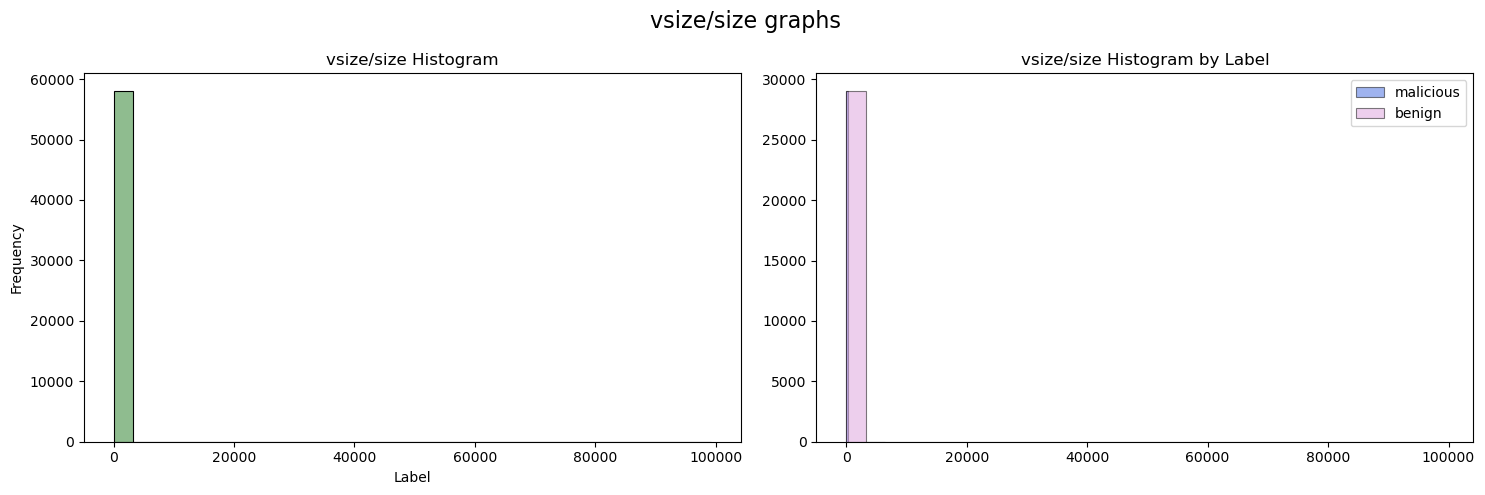

In [42]:
plot_numeric(df, 'vsize/size')

In [43]:
df['vsize/size'].describe()

count    58065.000000
mean         6.935778
std        455.270106
min          0.000578
25%          1.004349
50%          1.054653
75%          1.948991
max      99172.000000
Name: vsize/size, dtype: float64

According to the graph we can see that most of the samples have similar values of vsize/size, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
In addition, it can be seen that there is a difference in the vsize/size distribution between malicious examples and benign examples.<br>
We can learn that the greater the value of import/export, there are more examples that are benign.<br>
From looking at these graphs, we can assume that the feature is not normally distributed.

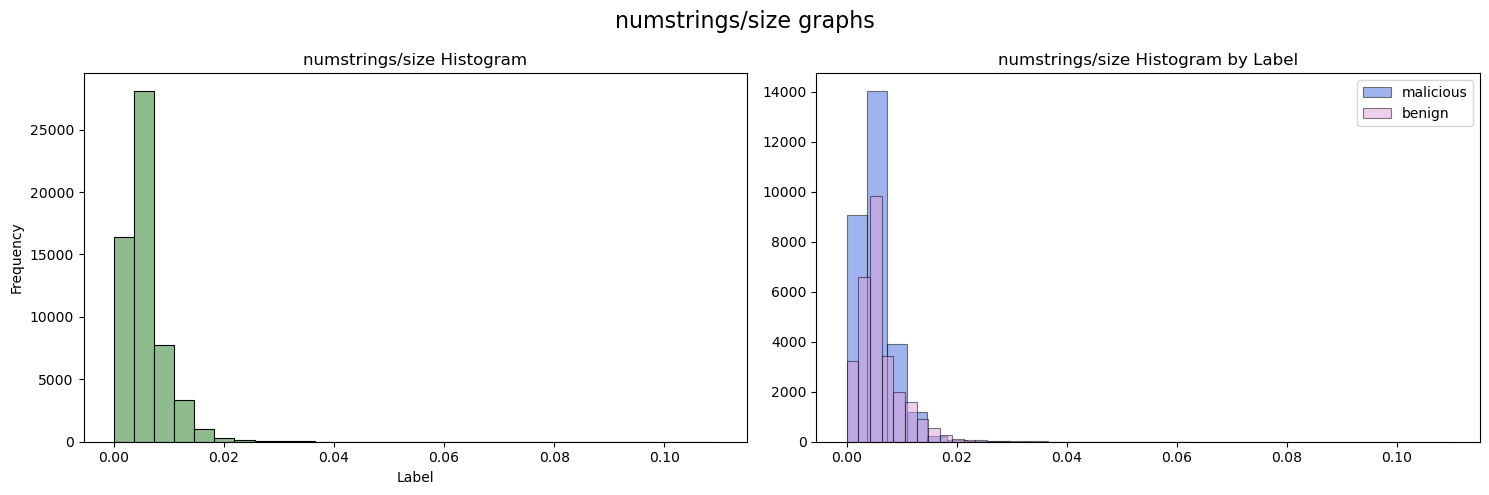

In [44]:
plot_numeric(df,'numstrings/size')

In [45]:
df['numstrings/size'].describe()

count    57282.000000
mean         0.005566
std          0.003851
min          0.000002
25%          0.003413
50%          0.004609
75%          0.006772
max          0.109600
Name: numstrings/size, dtype: float64

According to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
After the division into malicious and benign, we can clearly see the difference between the quantities for each type, which may indicate the importance of this feature.<br>
The feature is not distributed normally.<br> 

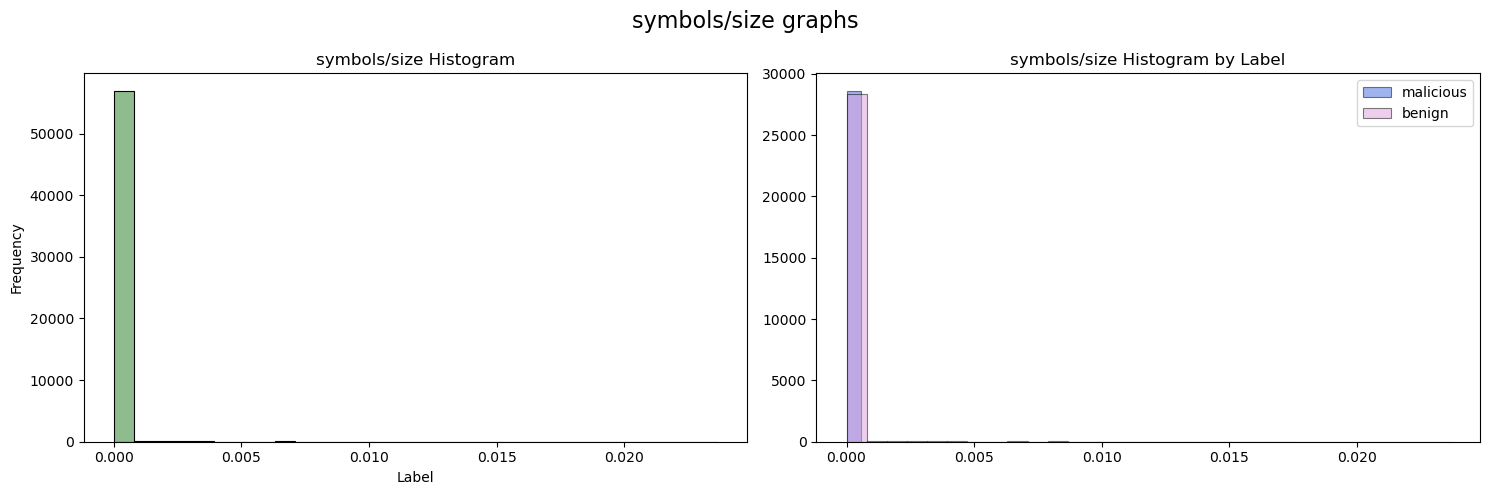

In [46]:
plot_numeric(df,'symbols/size')

In [47]:
df['symbols/size'].describe()

count    57344.000000
mean         0.000041
std          0.000622
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.023632
Name: symbols/size, dtype: float64

According to the graph we can see that most of the samples have similar values of symbols/size, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
<be>
After splitting according to the type of label, one can see that the distribution between malicious and benign examples is really similar, later on we will discuss whether to drop this feature, since it may not contribute to the prediction.<br>
From looking at these graphs, we can assume that the feature is not normally distributed.

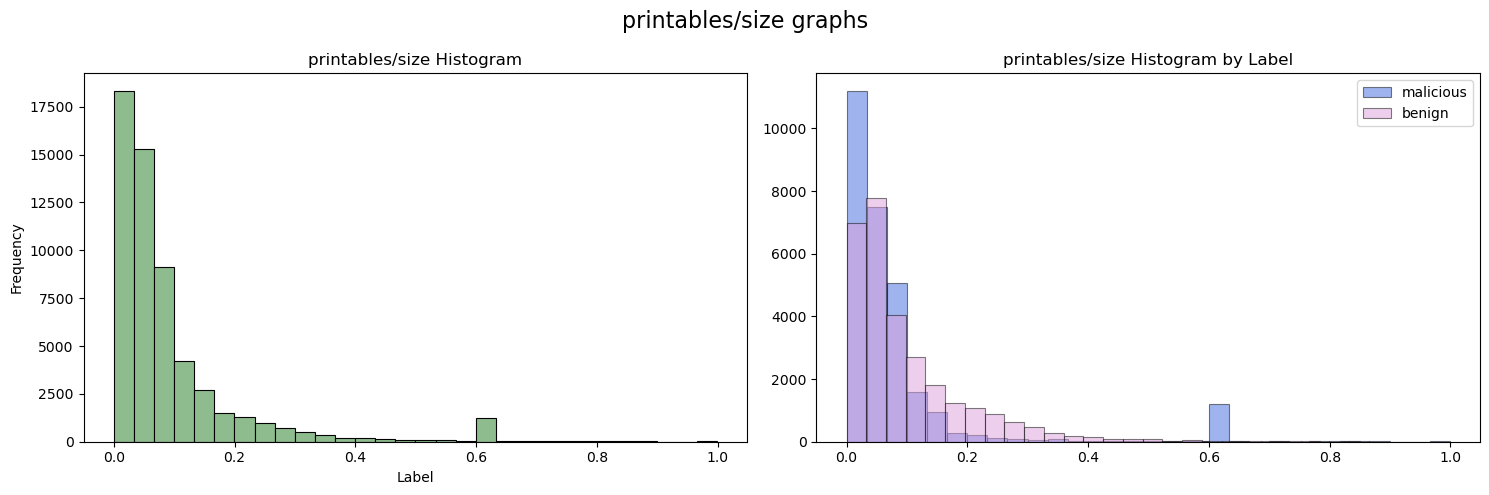

In [48]:
plot_numeric(df,'printables/size')

In [49]:
df['printables/size'].describe()

count    57261.000000
mean         0.094059
std          0.121519
min          0.000026
25%          0.028810
50%          0.054735
75%          0.101493
max          0.998905
Name: printables/size, dtype: float64

According to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
After the division into malicious and benign, we can clearly see the difference between the quantities for each type, which may indicate the importance of this feature.<br>
We can learn that the smaller the value of printables/size, the probability for the examples to be malicious is bigger; for the bigger values of printables/size the chance that the examples are benign is bigger.<br>
The feature is not distributed normally.<br> 

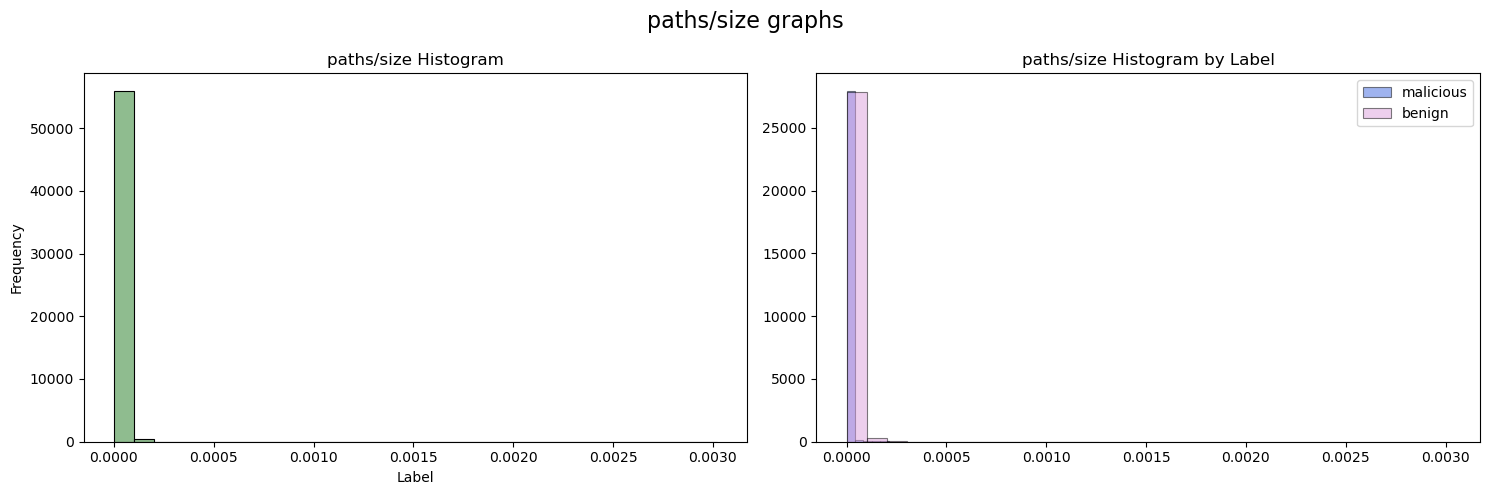

In [50]:
plot_numeric(df,'paths/size')

In [51]:
df['paths/size'].describe()

count    5.634000e+04
mean     4.259191e-06
std      2.477711e-05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.249743e-07
max      3.020833e-03
Name: paths/size, dtype: float64

According to the graph we can see that most of the samples have similar values of paths/size, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
After splitting according to the type of label, one can see the differences in the distribution between malicious and benign examples. <br>
We can learn that as the value of paths/size is greater, the more we get examples that are benign.<br>
From looking at these graphs, we can assume that the feature is not normally distributed.

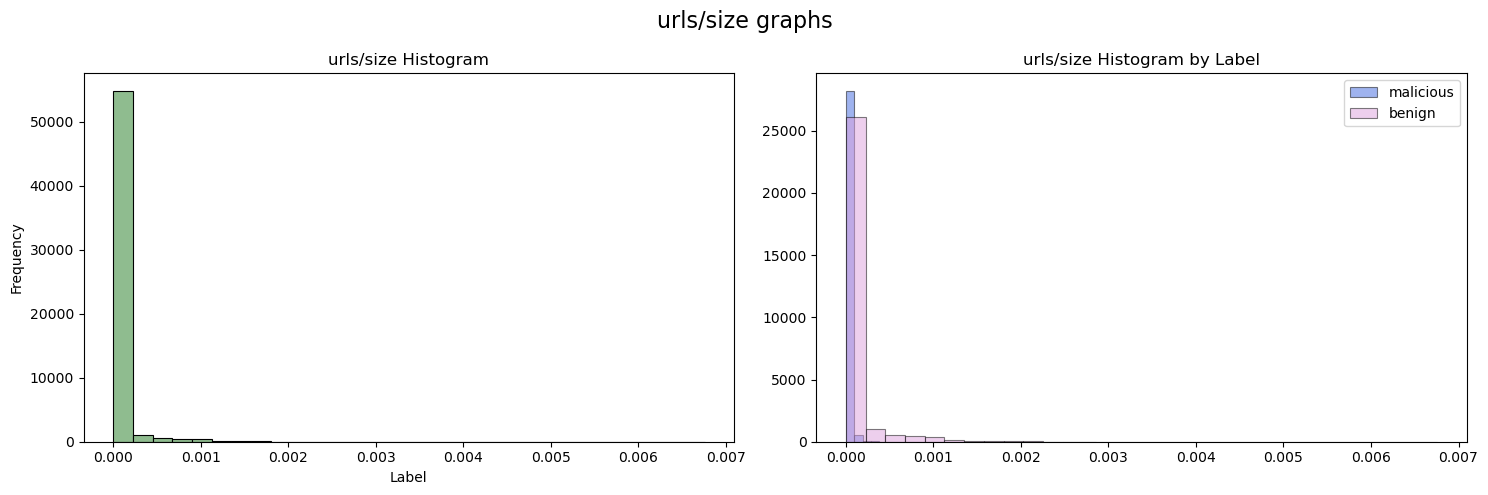

In [52]:
plot_numeric(df,'urls/size')

In [53]:
df['urls/size'].describe()

count    57651.000000
mean         0.000045
std          0.000171
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000012
max          0.006757
Name: urls/size, dtype: float64

According to the graph we can see that most of the samples have similar values of urls/size, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
After splitting according to the type of label, one can see the differences in the distribution between malicious and benign examples. <br>
We can learn that as the value of urls/size is greater, the more we get examples that are benign.<br>
From looking at these graphs, we can assume that the feature is not normally distributed.

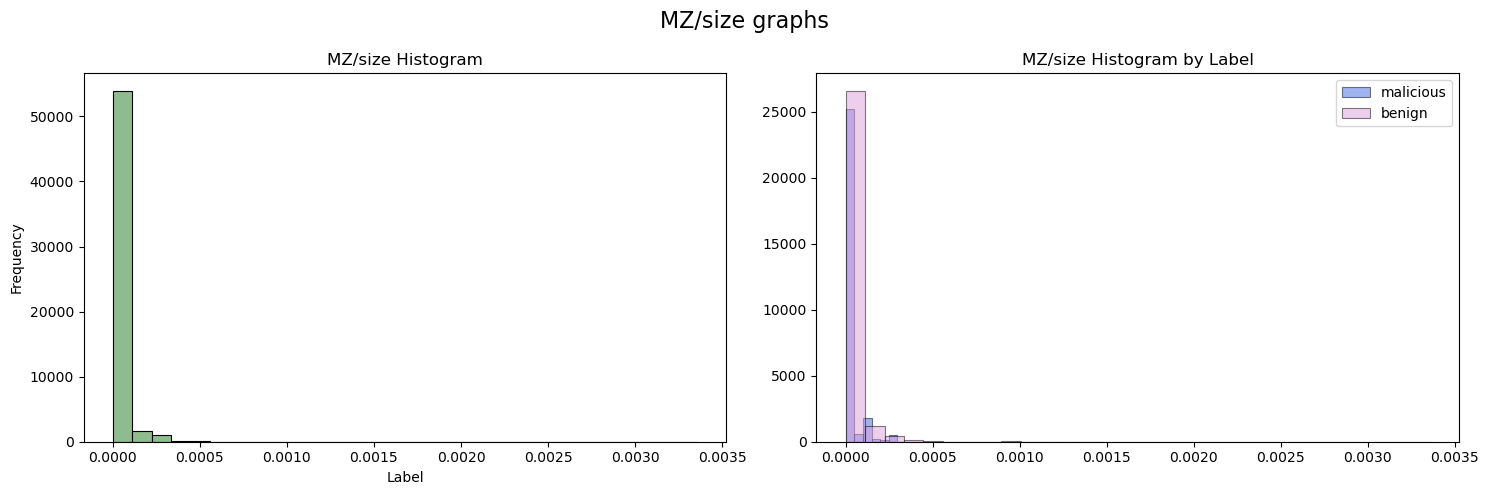

In [54]:
plot_numeric(df,'MZ/size')

In [55]:
df['MZ/size'].describe()

count    5.691100e+04
mean     3.095344e-05
std      7.008150e-05
min      3.969121e-08
25%      6.576178e-06
50%      1.368890e-05
75%      2.308745e-05
max      3.355705e-03
Name: MZ/size, dtype: float64

According to the graph we can see that most of the samples have similar values of MZ/size, but according to the scale of the X-axis we can see that there are outlier values (we will deal with that later).<br>
After splitting according to the type of label, one can see the differences in the distribution between malicious and benign examples. <br>
We can learn that as the value of MZ/size is greater, the more we get examples that are benign.<br>
From looking at these graphs, we can assume that the feature is not normally distributed.

In [56]:
def feature_removal(df,feature):  #a function to remove a feature
    df.drop(feature, axis=1, inplace=True)

In [57]:
#a function that receives a feature and data and removes the feature from the data as well as from the feature lists
def remove_from_data(df, numeric_lst): 
    feature_removal(df,'A')
    numeric_lst.remove('A')
    feature_removal(df,'C')
    feature_removal(df,'numstrings')
    numeric_lst.remove('numstrings')
    feature_removal(df,'symbols/printables')
    numeric_lst.remove('symbols/printables')
    feature_removal(df,'symbols/size')
    numeric_lst.remove('symbols/size')

We will examine the amount of examples from each category of file_type_trid

In [58]:
df['file_type_trid'].value_counts()   

Win64 Executable (generic)                   10085
Win32 Executable MS Visual C++ (generic)      8967
Win32 Executable (generic)                    8781
Win32 Dynamic Link Library (generic)          4010
Generic CIL Executable (.NET, Mono, etc.)     3804
                                             ...  
MS Flight Simulator Gauge                        1
Photoshop filter plug-in                         1
VirtualDub Filter Plug-in                        1
GIMP Plugin (Win)                                1
WinArchiver Mountable compressed Archive         1
Name: file_type_trid, Length: 89, dtype: int64

As we saw in the graph for file_type_trid, there are many categories and some with a very small number of examples.<br>
In order to reduce the dimension of the feature before turning it into a dummy variable, we would like to combine categories with a small number of examples. <br>
Therefore, all the categories that contain less than 1% of the examples will be combined into one category named other_type

In [59]:
join_rare_categories(df,df)  #unite the category of our data

In [60]:
df['file_type_trid'].value_counts()  #check whether the categories have indeed been merged

Win64 Executable (generic)                            10085
Win32 Executable MS Visual C++ (generic)               8967
Win32 Executable (generic)                             8781
Win32 Dynamic Link Library (generic)                   4010
Generic CIL Executable (.NET, Mono, etc.)              3804
other_type                                             3550
Windows Control Panel Item (generic)                   3208
InstallShield setup                                    2217
UPX compressed Win32 Executable                        2203
DOS Executable Generic                                 1724
Win32 Executable Microsoft Visual Basic 6              1669
OS/2 Executable (generic)                              1173
Win32 EXE PECompact compressed (generic)               1160
Generic .NET DLL/Assembly                              1151
WinRAR Self Extracting archive (4.x-5.x)               1107
NSIS - Nullsoft Scriptable Install System              1037
Microsoft Visual C++ compiled executable

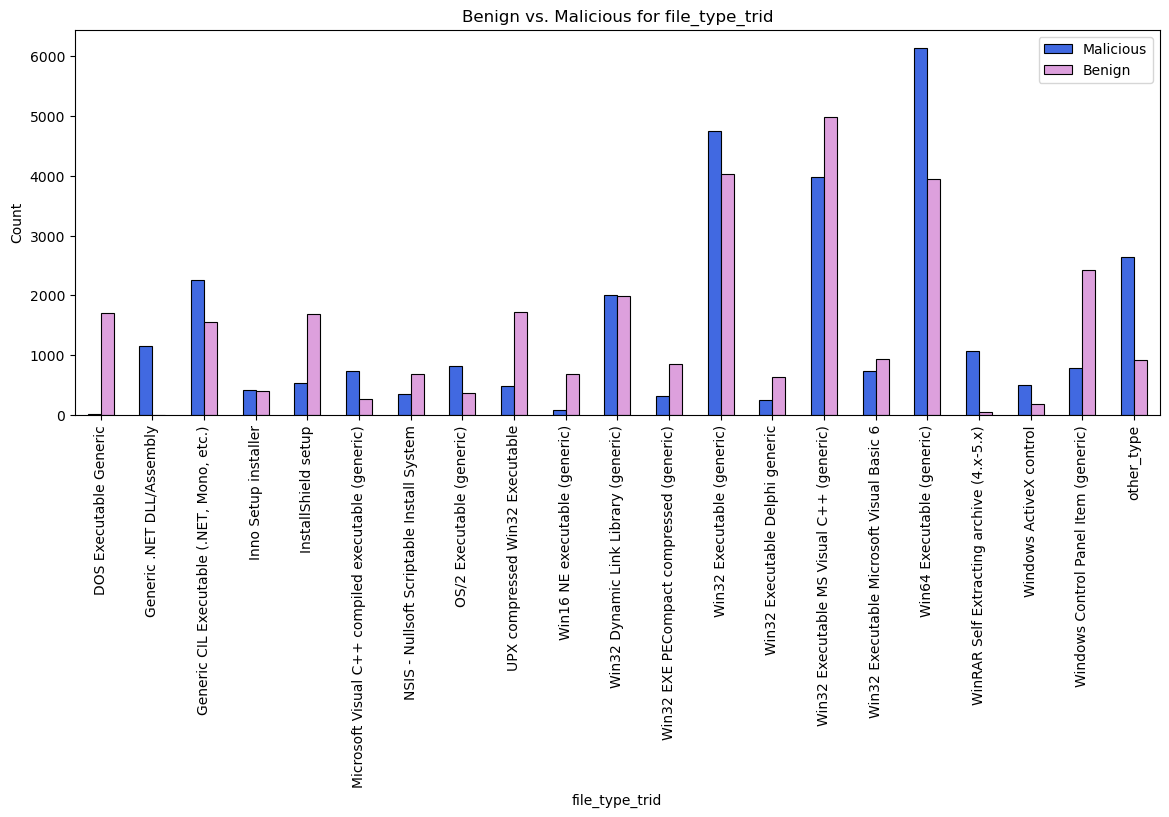

In [61]:
prop_categorical('file_type_trid',df['file_type_trid'])

We can see that there are indeed fewer categories now and that there are no longer categories with a very small number of examples

### Categorical variables

Now, we will turn the categorical variable file_type_trid, the only one left after downloading C, into a dummy variable by using OneHotEncoder (due to Dor's lecturer comment in the class and the instruction to use this function and not get_dummies which can lead to errors)

In [62]:
df_encoded = categorical_variables_handling(df, True) #we will save the data after the change as a new data 

feature removal

According to our analysis so far, we have chosen to remove several features at this stage -
1. A - As we have seen, the division into malicious and bengin is really similar, therfore, we have decided to drop this feature since it probably won't contribute to the prediction.
2. C - As we have seen, this feature is also divided into malicious and bengin similarly, which may not contribute to the prediction.
3. numstrings - a feature that is highly correlated with MZ and with size (but contains lots of NA compared to size), so we chose to remove it.
4. symbols/printables - As we have seen, this feature is also divided into malicious and bengin similarly.
5. symbols/size - As we have seen, this feature is also divided into malicious and bengin similarly.

In [63]:
remove_from_data(df_encoded, numeric_features) # run the function on our data
labels_encoded = df_encoded['label']
features_encoded = df_encoded.drop(columns=['sha256', 'label'])

### The dimensionality of the problem

Before we perform PCA for the dimensionality problem, we will divide the data into training and validation.<br>
We will divide both the data without the standardization and the data after performing the scale change with the understanding that some of the models need standardized features (KNN and logistic regression) and some do not (tree-based models)

Now we will perform PCA in order to reduce dimensions while preserving 99% of the variance.<br>
We will make a copy of the data and perform standartizarion and fill the NA values for the PCA method.

In [64]:
data_copy_for_PCA = df_encoded.copy() #we will take a copy of the data so as not to change the original one
scaler_for_standardization = StandardScaler()   #run the standardization
data_copy_for_PCA[numeric_features] = scaler_for_standardization.fit_transform(data_copy_for_PCA[numeric_features]) #standardScaler only on the numeric features

fill_na_all(data_copy_for_PCA, data_copy_for_PCA)  #fill the missing values

In [65]:
labels_after_std_no_na = data_copy_for_PCA['label']  #save the labels
features_after_std_no_na = data_copy_for_PCA.drop(columns=['sha256', 'label'])  #save the features

In [66]:
pca = PCA() 
pca.fit(features_after_std_no_na)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
dim_num = np.argmax(explained_variance_ratio >= 0.99) + 1
components = pca.components_
print(f'The number of dimensions required to preserve 99% of variance is {dim_num}')

The number of dimensions required to preserve 99% of variance is 26


After performing PCA the number of dimensions decreased from 45 to 26. <br>
We will save best features after tha PCA

In [67]:
selector_std  = SelectKBest(f_classif, k=dim_num)  #save the K best features (K=24 from the previous function)
train_data_selected_std = selector_std.fit_transform(features_after_std_no_na, labels_after_std_no_na) #fit the data
selected_feature_indices_std = selector_std.get_support(indices=True) # get the indices of the selected features
selected_feature_names_std = features_after_std_no_na.columns[selected_feature_indices_std] #get the indices of the selected features
train_selected_features_std = features_after_std_no_na[selected_feature_names_std] #subset the original feature matrix with the selected features

In [68]:
# function for saving the data with the K selected features after the PCA
def best_features_data (df):
    best_features_PCA = df.loc[:, selected_feature_names_std]
    best_labels_PCA = df['label']
    return best_features_PCA, best_labels_PCA

In [69]:
features_df_regular_pca, labels_df_regular_pca = best_features_data(df_encoded)  

In [70]:
# spliting the data after PCA (without outliers, na, std) - we will use this data for knn and logistic reg
train_data_knn_log,validation_data_knn_log,train_labels_knn_log,validation_labels_knn_log =  train_test_split(features_df_regular_pca, labels_df_regular_pca, test_size=0.2,random_state = 42,shuffle = True)

print('Train dimensions:')
print(f'data: {train_data_knn_log.shape}')
print(f'labels: {train_labels_knn_log.shape}')

print('validation dimensions:')
print(f'data: {validation_data_knn_log.shape}')
print(f'labels: {validation_labels_knn_log.shape}')

Train dimensions:
data: (48000, 26)
labels: (48000,)
validation dimensions:
data: (12000, 26)
labels: (12000,)


In [71]:
# spliting the data without PCA (without outliers, na, std) - we will use this data for decision tree and random forest
train_data_tree,validation_data_tree,train_labels_tree,validation_labels_tree =  train_test_split(features_encoded, labels_encoded, test_size=0.2,random_state = 42,shuffle = True)

print('Train dimensions:')
print(f'data: {train_data_tree.shape}')
print(f'labels: {train_labels_tree.shape}')

print('validation dimensions:')
print(f'data: {validation_data_tree.shape}')
print(f'labels: {validation_labels_tree.shape}')

Train dimensions:
data: (48000, 45)
labels: (48000,)
validation dimensions:
data: (12000, 45)
labels: (12000,)


### Missing data

In this section we will examine the features for which there are missing values and fill them.

In [72]:
features_encoded.isnull().sum()  #the data for trees

size                                                                    0
vsize                                                                1935
imports                                                              1739
exports                                                              2093
has_debug                                                            2927
has_relocations                                                      3324
has_resources                                                        1961
has_signature                                                        1937
has_tls                                                              2898
symbols                                                              2656
paths                                                                3660
urls                                                                 2349
registry                                                             2525
MZ                                    

In [73]:
features_df_regular_pca.isnull().sum() #the data for knn and logistic reg

exports                                                              2093
has_debug                                                            2927
has_relocations                                                      3324
has_resources                                                        1961
has_signature                                                        1937
has_tls                                                              2898
urls                                                                 2349
B                                                                    3751
numstrings/size                                                      2718
printables/size                                                      2739
paths/size                                                           3660
urls/size                                                            2349
file_type_trid_Generic .NET DLL/Assembly                                0
file_type_trid_Generic CIL Executable 

We would like to see in the histogram the distribution of each feature and how many missing values it has

In [74]:
def plot_na_histogram(df):
    na_counts = df.isnull().sum()
    na_counts.plot(kind='bar', figsize=(14, 4), color='darkseagreen')
    plt.xlabel('Features')
    plt.ylabel('Missing Value Count')
    plt.title('Histogram of Missing Values')
    plt.show()

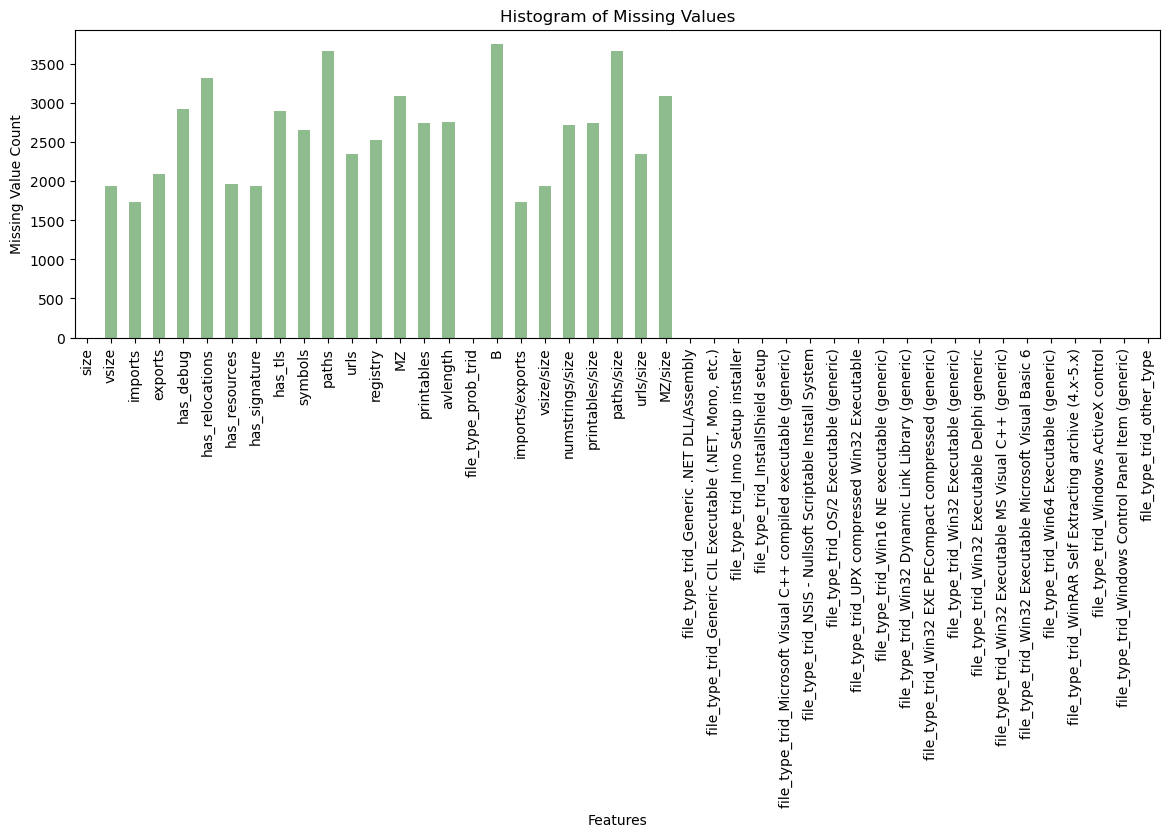

In [75]:
plot_na_histogram(features_encoded) #the data for trees

We can see that there are many features for which there are no missing values at all and that most of the features have between 1500-3000 examples with missing values, which is about 2.5-5% of each feature. <br>
We will not remove the examples with missing values because we don't want to lode data therefore, later on we will handle these values differently for each feature.

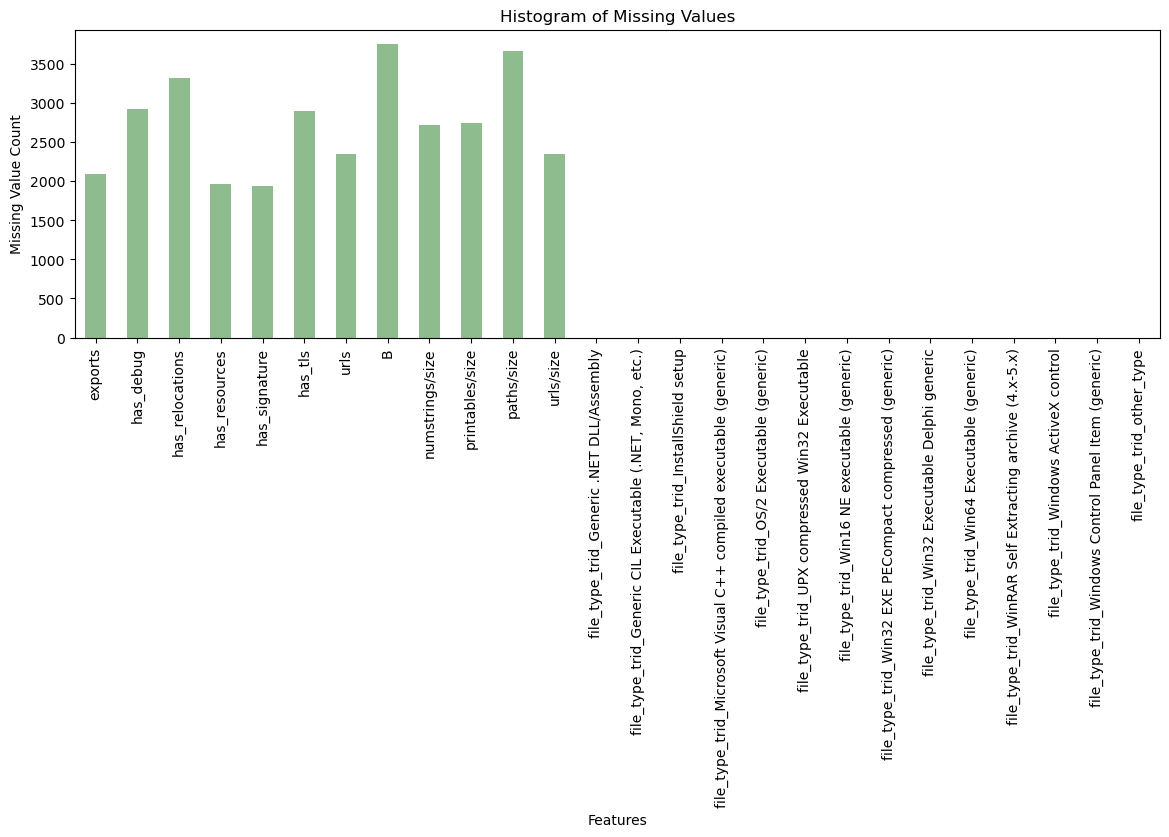

In [76]:
plot_na_histogram(features_df_regular_pca) #the data for knn and logistic reg

### Outliers
According to the histogram for each numerical variable, we noticed outliers for most variables.
<br> For the variables that receive 0 or 1 there are no outliers since they cannot receive values other than 0 or 1 (we doubled checked that and indeed there wheren't any values besides 0 and 1)

We will build an auxiliary function that gets a feature and a right and left percentile and takes all the values that are beyond the "thresholds" and reduces each marginal value to the value that is in the percentile at each end. <br>
Thus, instead of getting rid of the outliers, we will still keep them with similar but less extreme values

In [77]:
def outliers_handling_thresholds(df_to_calc, df_to_run, feature, percentage_left, percentage_right) :
    percentile_right = np.nanpercentile(df_to_calc[feature], percentage_right)
    percentile_left = np.nanpercentile(df_to_calc[feature], percentage_left)
    df_to_run.loc[df_to_run[feature] > percentile_right ,feature] = percentile_right
    df_to_run.loc[df_to_run[feature] < percentile_left ,feature] = percentile_left

In [78]:
def plot_outliers(df_to_calc, df_to_run, feature_name,percentage_left, percentage_right):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    plot_hist_regular(df, feature_name, ax=axes[0])     # plot histogram before removing outliers
    axes[0].set_title(f'{feature_name} Histogram (before outliers)')
    df_to_calc = df_to_calc.copy()  # copy the dataframe to preserve the original values
    outliers_handling_thresholds(df_to_calc,df_to_calc, feature_name, percentage_left, percentage_right)  # removw outliers by the percentiles
    plot_hist_regular(df_to_calc, feature_name, ax=axes[1])   # plot histogram after removing outliers
    axes[1].set_title(f'{feature_name} Histogram (after outliers)')
    fig.suptitle(f'{feature_name} Histograms', fontsize=16)
    plt.tight_layout()
    plt.show()

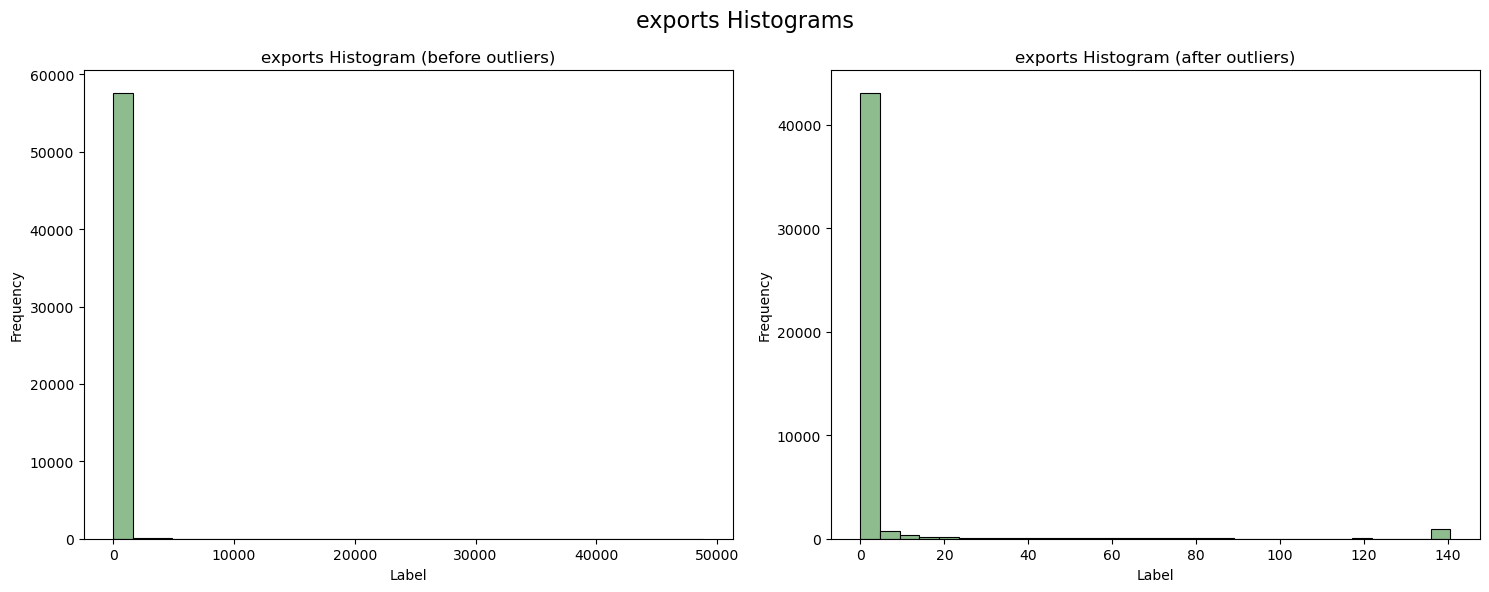

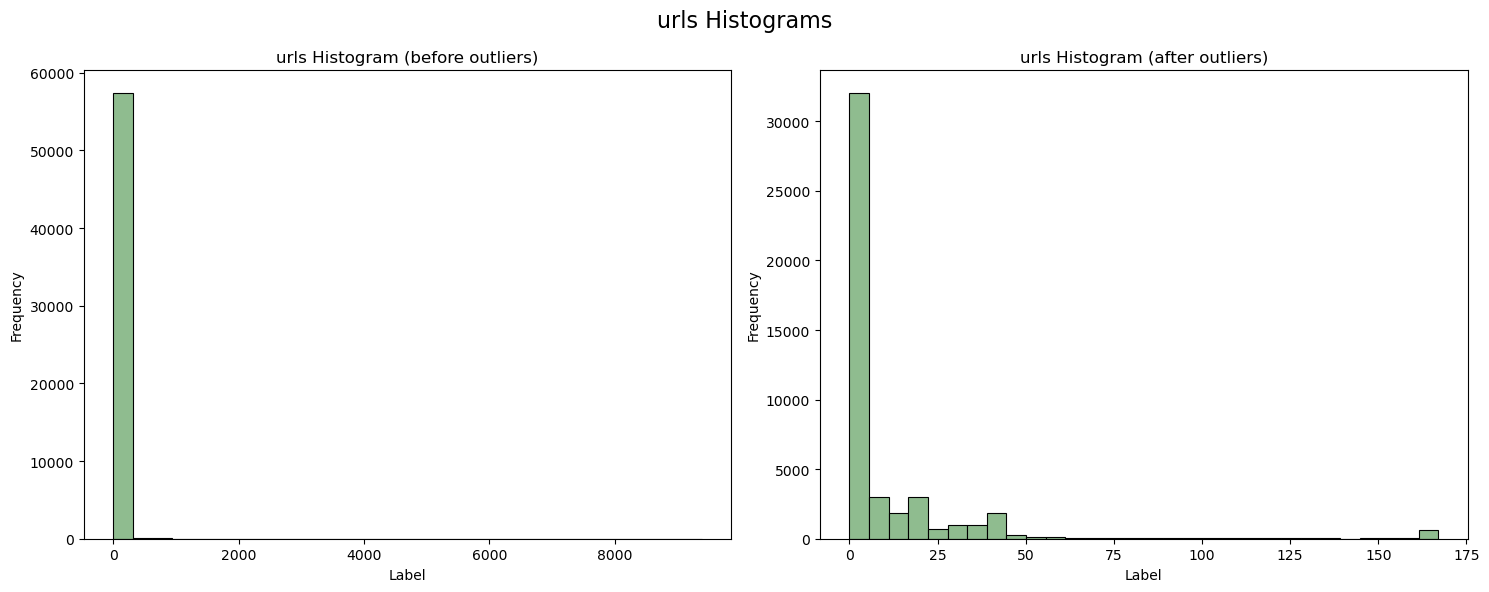

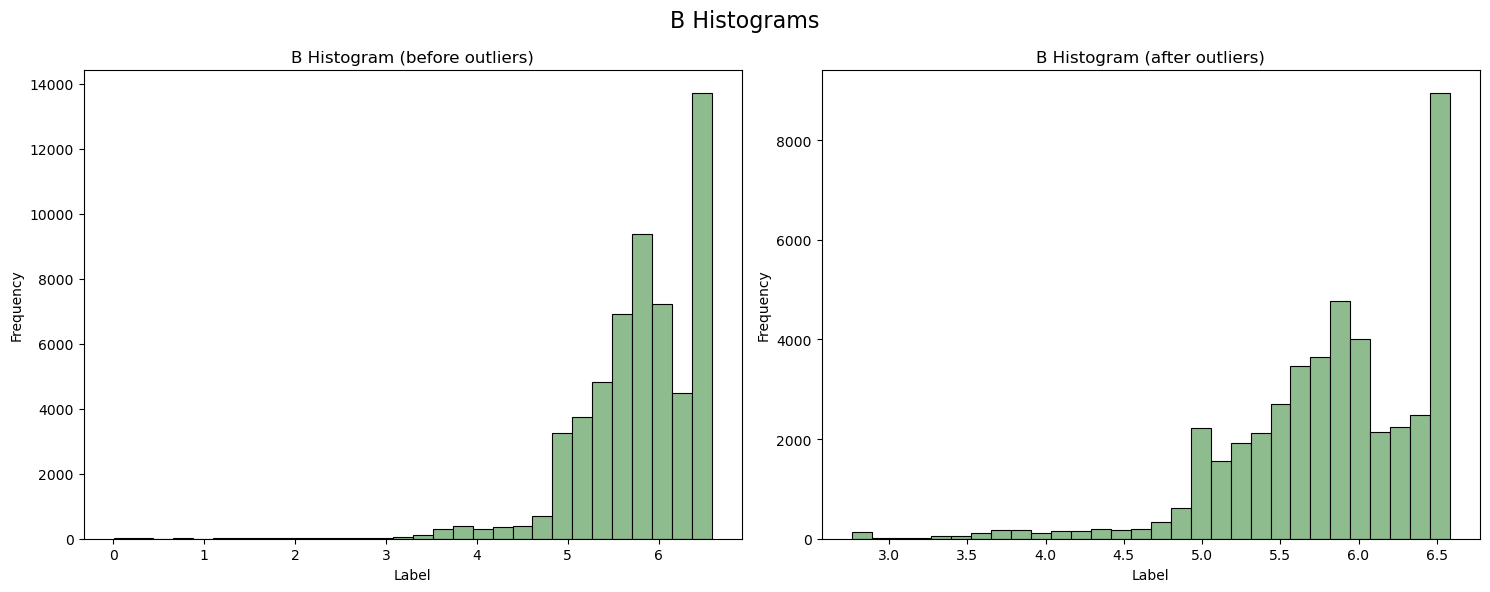

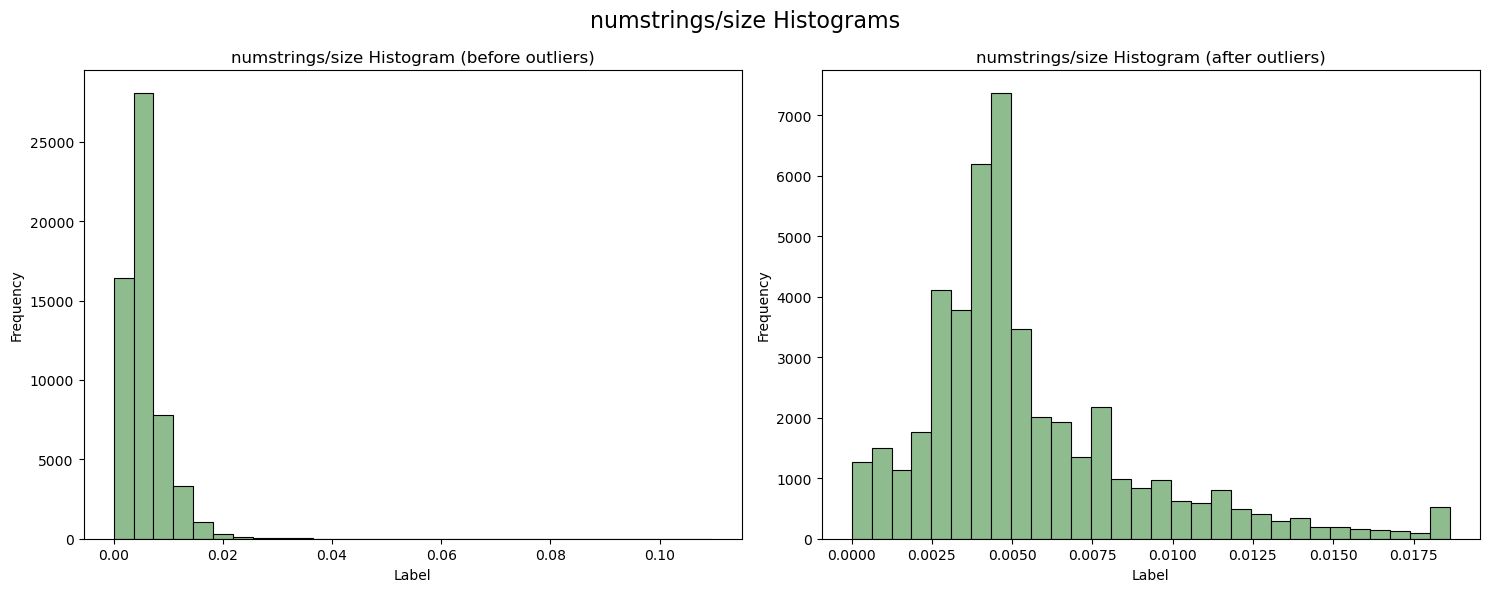

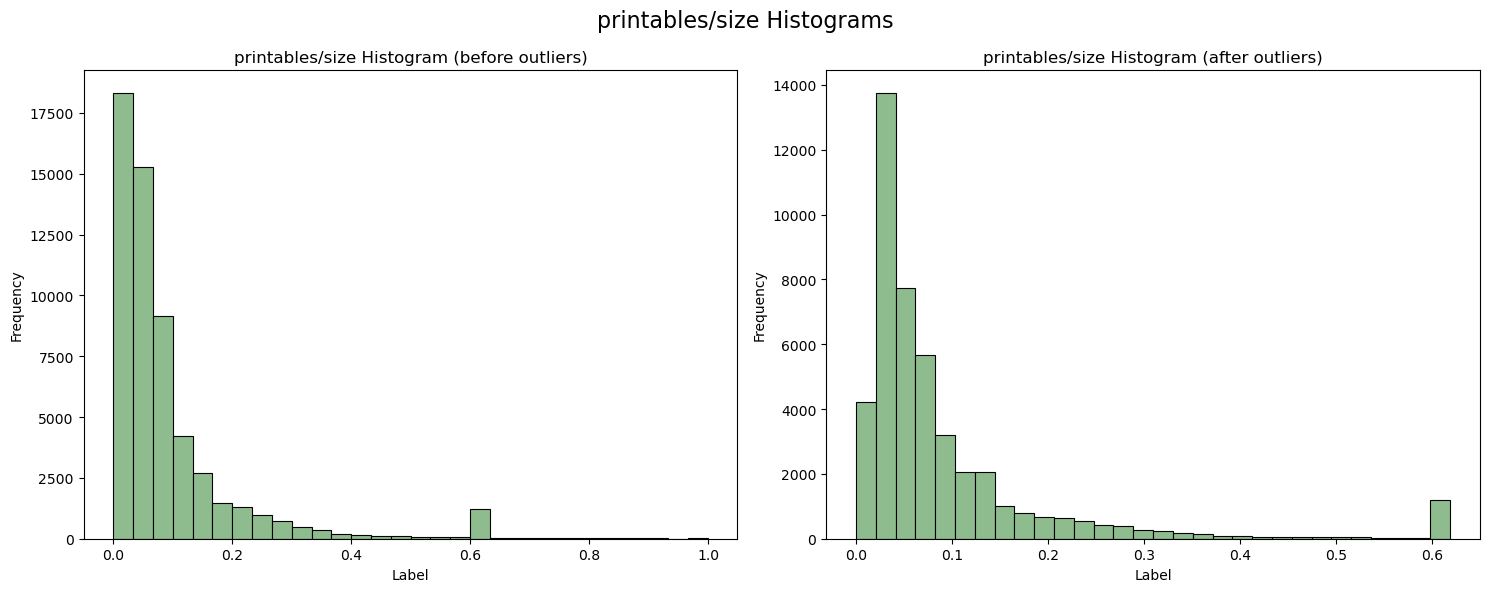

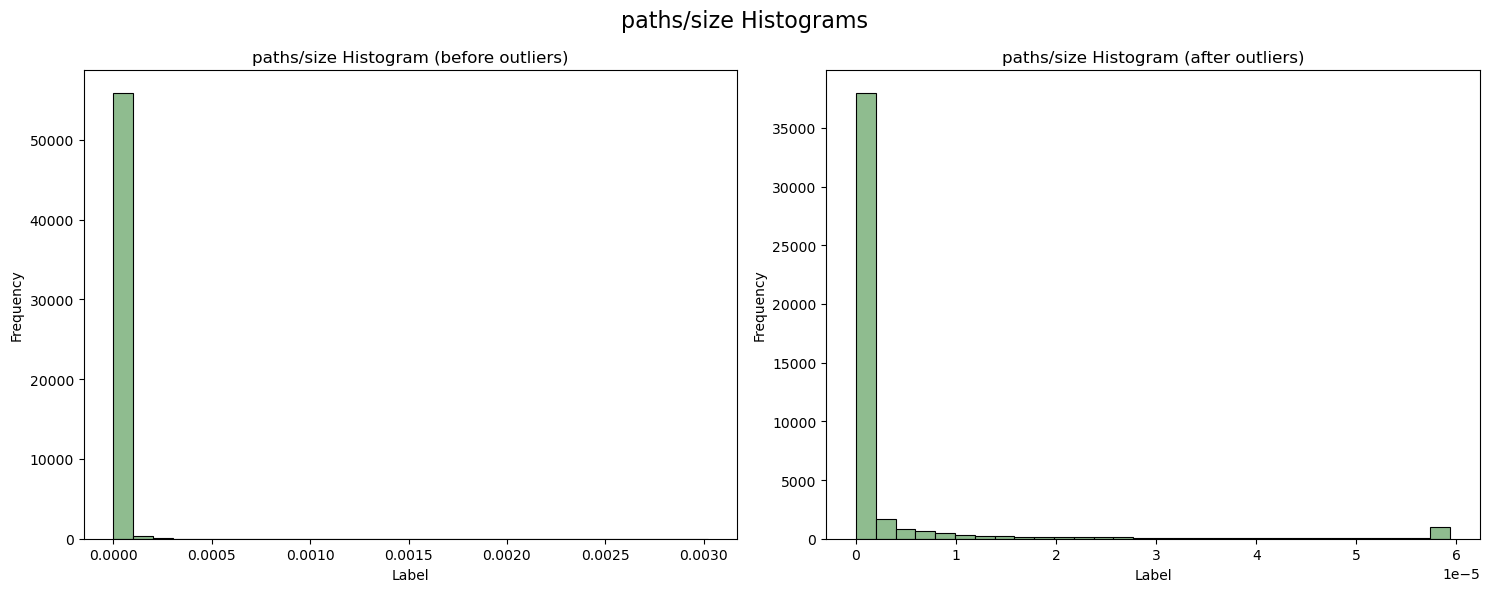

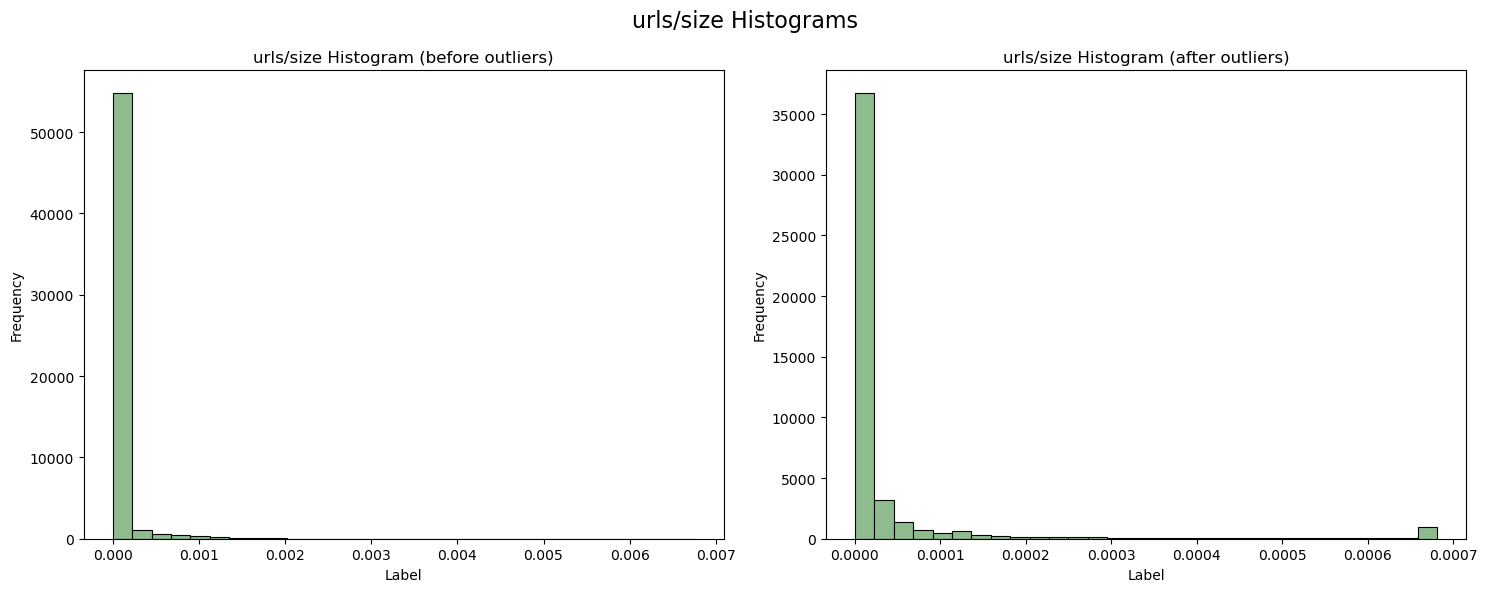

In [79]:
#the numeric features returned from the PCA
plot_outliers(train_data_knn_log, train_data_knn_log,'exports', 0, 98)
plot_outliers(train_data_knn_log, train_data_knn_log,'urls', 0, 99)
plot_outliers(train_data_knn_log, train_data_knn_log,'B', 0.25, 100)
plot_outliers(train_data_knn_log, train_data_knn_log,'numstrings/size', 0, 99)
plot_outliers(train_data_knn_log, train_data_knn_log,'printables/size', 0, 98)
plot_outliers(train_data_knn_log, train_data_knn_log,'paths/size', 0, 98)
plot_outliers(train_data_knn_log, train_data_knn_log,'urls/size', 0, 98)

For each feature, we examined the histograms above, we will examine the corresponding percentages.<br>
For features with many outliers only on the right, a left percentile of 0 is chosen and a relatively large right percentile and vice versa for features with many outliers on the left. For features that are "balanced" in terms of outliers sides, percentages on both sides are chosen.<br>
On the one hand, we made sure to take care of the outliers, and on the other hand, we made sure not to change the distribution drastically.

In [80]:
def outliers_handeling (df_to_calc, df_to_run): #we will handle outliers only for the KNN+log df (trees can handle outliers)
    if 'size' in df_to_calc.columns :
        outliers_handling_thresholds(df_to_calc, df_to_run, 'size', 0, 98)
    if 'exports' in df_to_calc.columns :
        outliers_handling_thresholds(df_to_calc, df_to_run, 'exports', 0, 98)
    if 'urls' in df_to_calc.columns :
        outliers_handling_thresholds(df_to_calc, df_to_run, 'urls', 0, 99)
    if 'file_type_prob_trid' in df_to_calc.columns :
        outliers_handling_thresholds(df_to_calc, df_to_run, 'file_type_prob_trid', 0, 100)
    if 'B' in df_to_calc.columns :
        outliers_handling_thresholds(df_to_calc, df_to_run, 'B', 0.25, 100)
    if 'imports/exports' in df_to_calc.columns :
        outliers_handling_thresholds(df_to_calc, df_to_run, 'imports/exports', 0, 98)
    if 'symbols/printables' in df_to_calc.columns :
        outliers_handling_thresholds(df_to_calc, df_to_run, 'symbols/printables', 0, 98)
    if 'vsize/size' in df_to_calc.columns :
        outliers_handling_thresholds(df_to_calc, df_to_run, 'vsize/size', 0, 98)
    if 'numstrings/size' in df_to_calc.columns :
        outliers_handling_thresholds(df_to_calc, df_to_run, 'numstrings/size', 0, 98)
    if 'symbols/size' in df_to_calc.columns :
        outliers_handling_thresholds(df_to_calc, df_to_run, 'symbols/size', 0, 98)
    if 'urls/size' in df_to_calc.columns :
        outliers_handling_thresholds(df_to_calc, df_to_run, 'urls/size', 0, 98)
    if 'paths/size' in df_to_calc.columns :
        outliers_handling_thresholds(df_to_calc, df_to_run, 'paths/size', 0, 98)
    if 'MZ/size' in df_to_calc.columns :
        outliers_handling_thresholds(df_to_calc, df_to_run, 'MZ/size', 0, 98)
    if 'printables/size' in df_to_calc.columns :
        outliers_handling_thresholds(df_to_calc, df_to_run, 'printables/size', 0, 98)


In [81]:
#we will take the train data to save the percentages and use them to handle the outliers of the validation just as we will do later for the test
outliers_handeling(train_data_knn_log, validation_data_knn_log)
#after that we will handle the outliers of the train
outliers_handeling(train_data_knn_log, train_data_knn_log)

### Normalized / standardize data

As we saw in the data description, there are many features with different scales.<br>
In order to be able to use the data properly in KNN and logistic regression models, we will activate a standardization type change of scale with the understanding that these are different scales and we only want to reduce the scale(so we will be able to compare) and not change the data to a normal distribution.<br>
Since this is a consistent mathematical operation, its effect will be mainly in models such as linear regression and KNN in which the numerical value of the feature is important and not only the field in which it is found (as in trees that check whether the value is greater than or less than a certain value)

In [82]:
def mean_std_calc(df):
    data_for_standardization = df.copy() #we will take a copy of the data so as not to change the original one
    # calculate the mean and standard deviation from the reference dataset
    mean_ref = data_for_standardization.mean()
    std_ref = data_for_standardization.std()
    return mean_ref,std_ref  #return the data after the change

def standartization (df_to_calc, df_to_run, mean, std) :
    df_to_run = (df_to_calc - mean) / std

In [83]:
#we will take the train data to save the mean and std and use them to perforn standartization on the validation just as we will do later for the test
mean_knn_log, std_knn_log = mean_std_calc(train_data_knn_log)
mean_tree, std_tree = mean_std_calc(train_data_tree)

#we will perform standardization for validation with the mean and variance of the train
standartization(train_data_knn_log, validation_data_knn_log, mean_knn_log, std_knn_log)
standartization(train_data_knn_log, train_data_knn_log, mean_knn_log, std_knn_log) #after that we will standartize the train

#we will perform standardization for validation with the mean and variance of the train
standartization(train_data_tree, validation_data_tree, mean_tree, std_tree)
standartization(train_data_tree, train_data_tree, mean_tree, std_tree) #after that we will standartize the train

Now, after changing the scale we choose to handle the missing values. <br>
We chose to do this after the standartization and not before in order to fill in the most appropriate values and not to fill in the missing values before performing the scale change

For the variable MZ we chose to fill in the values as they appear in the feature size of the same example because of the high correlation between them.<br>
For each binary variable we chose to fill in the missing values with the most common value for each feature (0 or 1) and not to fill in an average in order to save the binary feature (only 0 and 1) <br>
For the rest of the features we chose to fill in the average of each feature.

In [84]:
#we will fill in the values of the validation using the frequent and average values for the train, just as we will do later with the test
fill_na_all(train_data_knn_log, validation_data_knn_log)
fill_na_all(train_data_knn_log, train_data_knn_log) #after that we will fill the train

#we will fill in the values of the validation using the frequent and average values for the train, just as we will do later with the test
fill_na_all(train_data_tree, validation_data_tree)
fill_na_all(train_data_tree, train_data_tree) #after that we will fill the train

We will redistribute the data after PCA and standardization into a training and validation set

### Applying the preprocessing to the test set

In [137]:
df_train = pd.read_csv('train.csv') #load the data
df_to_test = pd.read_csv('test.csv') #load the data
def preprocessing(df_train, df_to_test) :

    #division of the training set according to the types of features
    numeric_features_train, binary_features_train, categorial_features_train  = [], [], []
    division_into_features(numeric_features_train, binary_features_train,categorial_features_train)  
    
    #division of the test set according to the types of features
    numeric_features_test, binary_features_test, categorial_features_test  = [], [], []
    division_into_features(numeric_features_test, binary_features_test,categorial_features_test)

    define_new_fearures(df_train, numeric_features_train) #new features to the training set
    join_rare_categories(df_train,df_to_test) #join categories (the file_type_trid feature) for the training set

    define_new_fearures(df_to_test, numeric_features_test) #new features to the test set
    join_rare_categories(df_train,df_train) #join categories (the file_type_trid feature) for the test set

    train_encoded = categorical_variables_handling(df_train, True) #we will save the data after the change as a new data 
    test_encoded = categorical_variables_handling(df_to_test, True) #we will save the data after the change as a new data 

    remove_from_data(train_encoded,numeric_features_train ) # run the function on our data

    remove_from_data(test_encoded, numeric_features_test) # run the function on our data

    outliers_handeling(train_encoded, test_encoded) #dealing with outliers to the test set based on the training set
    outliers_handeling(train_encoded, train_encoded) #dealing with outliers to the train set based on the training set

    mean_data, std_data = mean_std_calc(train_encoded) #mean and variance of the training set for standardization
    standartization(train_encoded, test_encoded, mean_data, std_data) #standardizing the test set based on the mean and variance of the training
    standartization(train_encoded, train_encoded, mean_data, std_data) #standardizing the ttaining set based on the mean and variance of the training

    fill_na_all(train_encoded, test_encoded) #filling in missing values for the test set based on the training set
    fill_na_all(train_encoded, train_encoded) #filling in missing values for the training set based on the training set

    labels_encoded_train = train_encoded['label']
    features_encoded_train = train_encoded.drop(columns=['sha256', 'label'])
    features_encoded_test = test_encoded.drop(columns=['sha256'])

    return df_to_test, features_encoded_train, labels_encoded_train, features_encoded_test

# Part 3 - Running selected models

## KNN Classifier

For KNN we will use the data after standartized and PCA <br> <br>
Meaning of hyper parameters - <br>
* n_neighbors -  determines the number of neighboring data points considered for classification <br>
Higher n_neighbors -  less complex decision boundary, higher bias, lower variance <br>
Lower n_neighbors -  more complex decision boundary, lower bias, higher variance <br>
Finding the optimal value of n_neighbors involves a tradeoff between underfitting (high bias) and overfitting (high variance) <br>
* weights - determines the weight assigned to each neighboring data point during classification. In KNN, the weights parameter can be set to two different options - "uniform" or "distance".<br>
Uniform weights - it is assumed that all neighbors have equal importance. This can result in higher bias because the model treats all neighbors equally, regardless of their proximity to the point you want to test. <br>
Distance weights - the contribution of a neighbor is inversely proportional to its distance from the point you want to check. Closer neighbors have a higher influence, while distant neighbors have a lower influence. This can reduce bias, as the model gives more weight to points that are close to the point of interest.<br>
Uniform weights - higher bias, lower potential for variation.
Distance weights - lower potential bias, no direct effect on variance.


In [86]:
#we will check what the optimal hyperparameters are for this model 
# what is the best number of neighbors and what is the preferred type of weights

params_KNN = {'n_neighbors': range(15, 30), 'weights': ['uniform', 'distance']} 
clf_KNN = KNeighborsClassifier()

#we chose the roc_auc score type with the understanding that the model is measured according to its AUC score
grid_search_cv_KNN = GridSearchCV(clf_KNN, params_KNN, scoring='roc_auc', n_jobs=2, cv=5)
grid_search_cv_KNN.fit(train_data_knn_log, train_labels_knn_log)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid={'n_neighbors': range(15, 30),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [87]:
best_params_KNN = grid_search_cv_KNN.best_params_  #save the best params
validation_pred_KNN = grid_search_cv_KNN.predict_proba(validation_data_knn_log)[:, 1]   #predict
validation_auc_KNN = roc_auc_score(validation_labels_knn_log, validation_pred_KNN)  #calculate the AUC

print(f'KNeighborsClassifier Best Params: {best_params_KNN} \n')
print(f'KNeighborsClassifier Validation AUC score for best params {validation_auc_KNN}')

KNeighborsClassifier Best Params: {'n_neighbors': 26, 'weights': 'distance'} 

KNeighborsClassifier Validation AUC score for best params 0.9494664480541892


In [88]:
KNN = KNeighborsClassifier(**best_params_KNN) #run the model with the selected hyperparameters
KNN.fit(train_data_knn_log, train_labels_knn_log) #fit the model
pred_KNN = KNN.predict(validation_data_knn_log)  #predict  
acc_KNN = metrics.accuracy_score(validation_labels_knn_log, pred_KNN) #calculate the accuracy
print(f'Validation Accuracy of KNeighborsClassifier: {acc_KNN}')

Validation Accuracy of KNeighborsClassifier: 0.872


## LogisticRegression

For LogisticRegression we will use the data after standartized and PCA <br> <br>
Meaning of hyper parameters - <br>
* penalty - controls the regularization technique used to prevent overfitting and balance the bias and variance gap.<br>
L1 penalty (Lasso regularization) - adds the absolute values of the coefficients to the loss function. This can reduce the number of features used in the model and increase bias. Higher potential bias, lower potential variance. <br>
L2 penalty (ridge regularization) - adds the squared magnitudes of the coefficients to the loss function. This helps control the size of the coefficients and reduce overfitting. It can balance the gap between bias and variance by penalizing large weights and reducing variance.
Balanced bias-variance trade-off. <br>
elasticnet penalty - combines L1 and L2 penalties, adds both the absolute values and the squared values of the coefficients to the loss function. <br>
* C - controls the inversion of the regularization strength (penalty) <br>
Smaller C (stronger regularization) - increases the strength of the regularization, leading to higher bias. may fit the data by making overly simplistic assumptions. Higher bias, lower variability potential. <br>
Larger C (weaker regularization) - reduces the strength of the regularization, allowing the model to fit the training data better. This may increase the risk of overfitting and higher variability but the potential bias is lower.
* solver - used to optimize the model parameters. This does not directly affect the trade-off between variance and bias. <br>
The choice of solver can affect the regularization process and, consequently, the bias-variance. <br>
The choice of solver indirectly affects the trade-off between variance and bias by influencing the regularization technique applied during model training.

In [89]:
#we will check what the optimal hyperparameters are for this model 
# what is the best penalty,  what is the optimal C and the best solver
powers = range(-10,0)
params_logistic = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [10**p for p in powers],'solver': ['lbfgs','newton-cg', 'saga', 'sag']} 
clf_logistic = LogisticRegression(random_state=0)

#we chose the roc_auc score type with the understanding that the model is measured according to its AUC score
grid_search_cv_logistic = GridSearchCV(clf_logistic, params_logistic, scoring='roc_auc', n_jobs=2, cv=5) 
grid_search_cv_logistic.fit(train_data_knn_log, train_labels_knn_log)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=2,
             param_grid={'C': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                               0.001, 0.01, 0.1],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'newton-cg', 'saga', 'sag']},
             scoring='roc_auc')

In [90]:
best_params_logistic = grid_search_cv_logistic.best_params_ #save the best params
validation_pred_logistic = grid_search_cv_logistic.predict_proba(validation_data_knn_log)[:, 1] #predict
validation_auc_logistic = roc_auc_score(validation_labels_knn_log, validation_pred_logistic) #calculate the accuracy
print(f'LogisticRegression Best Params: {best_params_logistic} \n')
print(f'LogisticRegression Validation AUC score for best params: {validation_auc_logistic}')

LogisticRegression Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'} 

LogisticRegression Validation AUC score for best params: 0.8238977326941626


In [91]:
lr = LogisticRegression(random_state=0, **best_params_logistic) #run the model with the selected hyperparameters
lr.fit(train_data_knn_log, train_labels_knn_log) #fit the model
lr_acc = lr.score(validation_data_knn_log, validation_labels_knn_log)  #calculate the accuracy
print(f'Validation Accuracy of LogisticRegression: {lr_acc}')

Validation Accuracy of LogisticRegression: 0.76125


## Decision Tree

For Decision Tree we will use the data after standartized (without PCA) <br> <br>
Meaning of hyper parameters - <br>
* criterion -used to evaluate the quality of the split during the wood building process.<br>
Gini - measures the probability of misclassification of a randomly selected element from a given node. Its goal is to minimize misclassifications and build a tree that separates the classes as cleanly as possible. It tends to create more complex trees with fewer but deeper splits, when they have higher variance. This can make the model more prone to overfitting. <br>
Entropy - measures the level of impurity or disorder in a junction. Seeks to maximize the information gain and build a tree that provides the most information on the target variable. Tends to produce more balanced and shallower trees with more splits at each level. These trees can be less prone to overfitting and have lower variance compared to Gini. <br>
* max_depth - controls the maximum depth or maximum number of levels in the decision tree. <br>
Increasing the max_depth hyperparameter allows the decision tree to grow deeper, resulting in a more complex model with higher variance. A deeper tree can capture fine details and complex interactions between features, which can lead to overfitting.<br>
On the other hand, reducing the max_depth hyperparameter limits the depth of the tree, resulting in a simpler model with lower variance. A shallower tree focuses on more general patterns in the data and is less likely to overfit.<br>
* min_samples_split - sets the minimum number of samples required to split an internal node during the tree building process.<br>
Increasing the value of min_samples_split leads to more conservative splits in the decision tree, resulting in a simpler model with lower variance. Additionally, there is a requirement for more samples to be present at the junction before splitting can occur. Such a decision tree becomes less able to capture subtle patterns and noise in the training data, leading to reduced variance. <br>
Conversely, decreasing the value of min_samples_split allows for more splits and a more complex tree with higher variance. Such a tree requires fewer samples to be present at a node for it to be eligible for splitting which may lead to overfitting.

In [92]:
#we will check what the optimal hyperparameters are for this model 
# what is the best number of criterion,  what is the optimal  max_depth and the best samples_split
params_tree = {'criterion': ['entropy', 'gini'], 'max_depth': range(5,30,5), 'min_samples_split': range(80,120,5) } 
clf_tree = DecisionTreeClassifier(random_state=0)

#we chose the roc_auc score type with the understanding that the model is measured according to its AUC score
grid_search_cv_tree = GridSearchCV(clf_tree, params_tree, scoring='roc_auc', n_jobs=2, cv=5) 
grid_search_cv_tree.fit(train_data_tree,train_labels_tree)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=2,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 30, 5),
                         'min_samples_split': range(80, 120, 5)},
             scoring='roc_auc')

In [93]:
best_params_tree = grid_search_cv_tree.best_params_ #save the best params
validation_pred_tree = grid_search_cv_tree.predict_proba(validation_data_tree)[:, 1] #predict  
validation_auc_tree = roc_auc_score(validation_labels_tree, validation_pred_tree) #calculate the AUC
print(f'DecisionTreeClassifier Best Params: {best_params_tree} \n')
print(f'DecisionTreeClassifier Validation AUC score for best params: {validation_auc_tree}')

DecisionTreeClassifier Best Params: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 105} 

DecisionTreeClassifier Validation AUC score for best params: 0.9474457965362284


In [94]:
dtc = DecisionTreeClassifier(**best_params_tree) #run the model with the selected hyperparameters
dtc.fit(train_data_tree,train_labels_tree) #fit the model
pred_trees = dtc.predict(validation_data_tree) #predict
acc_tree = metrics.accuracy_score(validation_labels_tree, pred_trees) #calculate the accuracy
print(f'Validation Accuracy of DecisionTreeClassifier: {acc_tree}')

Validation Accuracy of DecisionTreeClassifier: 0.8756666666666667


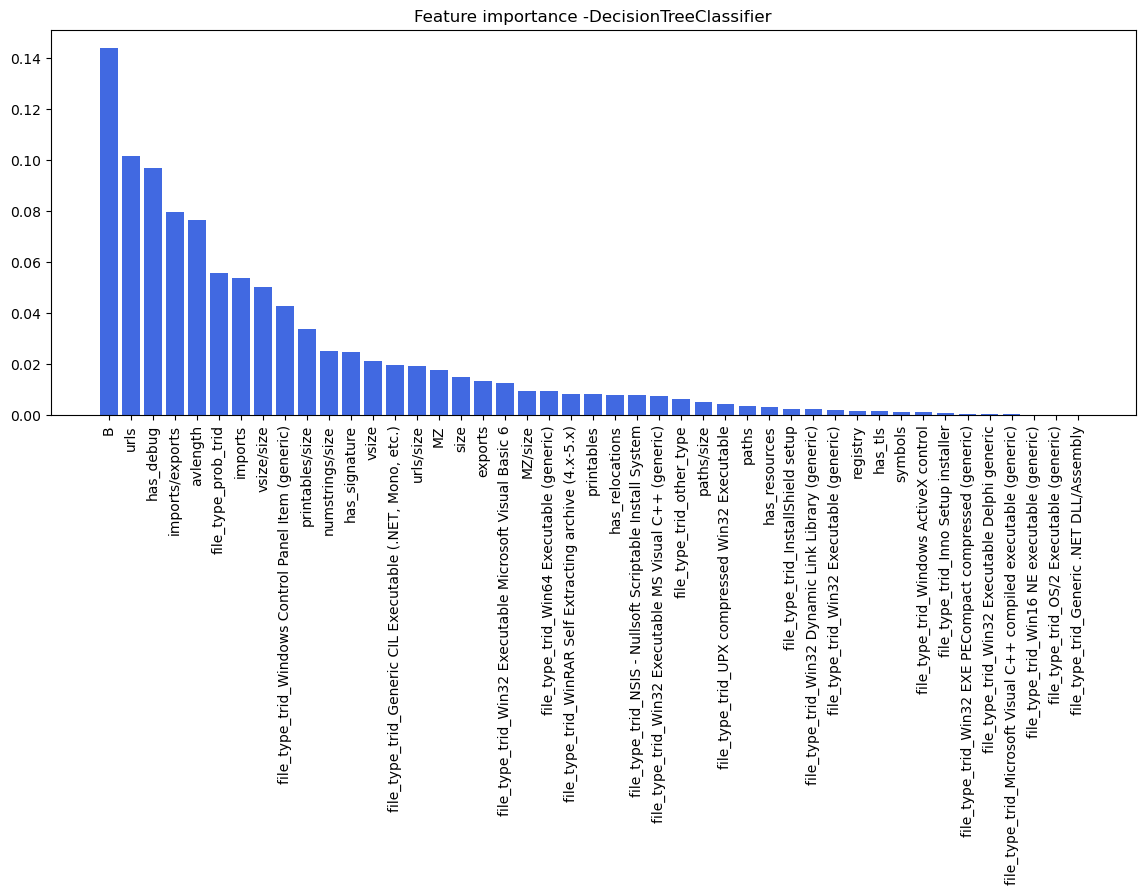

In [95]:
importances_tree = dtc.feature_importances_  #save the importance of features
sorded_featues_by_index_tree = np.argsort(importances_tree)[::-1]  # sort the index of the feature importances in descending way
importances_titles_tree = train_data_tree.columns[sorded_featues_by_index_tree]  #save the names of the features in the same order

#plot -  from recitation 8 
plt.figure(figsize=(14,5))
plt.title('Feature importance -DecisionTreeClassifier')
plt.bar(range(train_data_tree.shape[1]), importances_tree[sorded_featues_by_index_tree], color = 'royalblue')
plt.xticks(range(train_data_tree.shape[1]), importances_titles_tree, rotation='vertical')
plt.show()

We can infer from this plot that the feature B (which we do not know what it means) is the feature that has the greatest importance for the decision tree model. <br> It is followed by urls, has_debug, imports/exports, avlength and file__type_prpb_trib- their contribution is big since according to their distribution they manage to explain a lot about the label being malicious or bengin. <br>
The features that talk about the file type have the lowest contribution, probably due to the fact that they are dummy variables and for many of them most of the values will be 0.

## random forest

For RandomForestClassifier we will use the data after standartized (without PCA) <br> <br>
Meaning of hyper parameters - <br>
* max_depth - controls the maximum depth or maximum number of levels in the decision tree. <br>
Increasing the max_depth hyperparameter allows the decision tree to grow deeper, resulting in a more complex model with higher variance. A deeper tree can capture fine details and complex interactions between features, which can lead to overfitting.<br>
On the other hand, reducing the max_depth hyperparameter limits the depth of the tree, resulting in a simpler model with lower variance. A shallower tree focuses on more general patterns in the data and is less likely to overfit.<br>
* n_estimators - specifies the number of decision trees to be included in the random forest ensemble. <br>
Increasing the value of n_estimators leads to a more complex ensemble with higher variance. With more decision trees in the ensemble, there is greater potential for capturing complex patterns in the training data. Consequently, increasing n_estimators can increase the risk of overfitting.<br>
On the other hand, reducing the value of n_estimators reduces the complexity of the ensemble and reduces its variance. With fewer decision trees, the ensemble relies less on complex patterns and focuses more on general patterns in the data. A smaller vehicle can be more robust to noise and anomalies, reducing the risk of overfitting.
* min_samples_split - sets the minimum number of samples required to split an internal node during the tree building process.<br>
Increasing the value of min_samples_split leads to more conservative splits in the decision tree, resulting in a simpler model with lower variance. Additionally, there is a requirement for more samples to be present at the junction before splitting can occur. Such a decision tree becomes less able to capture subtle patterns and noise in the training data, leading to reduced variance. <br>
Conversely, decreasing the value of min_samples_split allows for more splits and a more complex tree with higher variance. Such a tree requires fewer samples to be present at a node for it to be eligible for splitting which may lead to overfitting.

In [96]:
#we will check what the optimal hyperparameters are for this model 
#what is the best number of estimators,  what is the optimal max_depth and the best samples_split
params_forest = {'max_depth': range(30, 40, 5),'n_estimators': range(100, 150, 10), 'min_samples_split' :range(2, 6, 2)} 
clf_forest = RandomForestClassifier(random_state=0)

#we chose the roc_auc score type with the understanding that the model is measured according to its AUC score
grid_search_cv_forest = GridSearchCV(clf_forest, params_forest, scoring='roc_auc', n_jobs=2, cv=5) 
grid_search_cv_forest.fit(train_data_tree,train_labels_tree)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=2,
             param_grid={'max_depth': range(30, 40, 5),
                         'min_samples_split': range(2, 6, 2),
                         'n_estimators': range(100, 150, 10)},
             scoring='roc_auc')

In [97]:
best_params_forest = grid_search_cv_forest.best_params_ #save the best params
validation_pred_forest = grid_search_cv_forest.predict_proba(validation_data_tree)[:, 1] #predict 
test_auc_forest = roc_auc_score(validation_labels_tree, validation_pred_forest) #calculate the AUC
print(f'RandomForestClassifier Best Params: {best_params_forest} \n')
print(f'RandomForestClassifier Validation AUC score for best params: {test_auc_forest}')

RandomForestClassifier Best Params: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 140} 

RandomForestClassifier Validation AUC score for best params: 0.9834324797863321


In [98]:
rf = RandomForestClassifier(random_state=0, **best_params_forest) #run the model with the selected hyperparameters
rf.fit(train_data_tree,train_labels_tree) #fit the model
pred_forest = rf.predict(validation_data_tree) #predict
rf_acc = rf.score(validation_data_tree, validation_labels_tree) #calculate the accuracy
print(f'Validation Accuracy of RandomForestClassifier: {rf_acc}')

Validation Accuracy of RandomForestClassifier: 0.9305833333333333


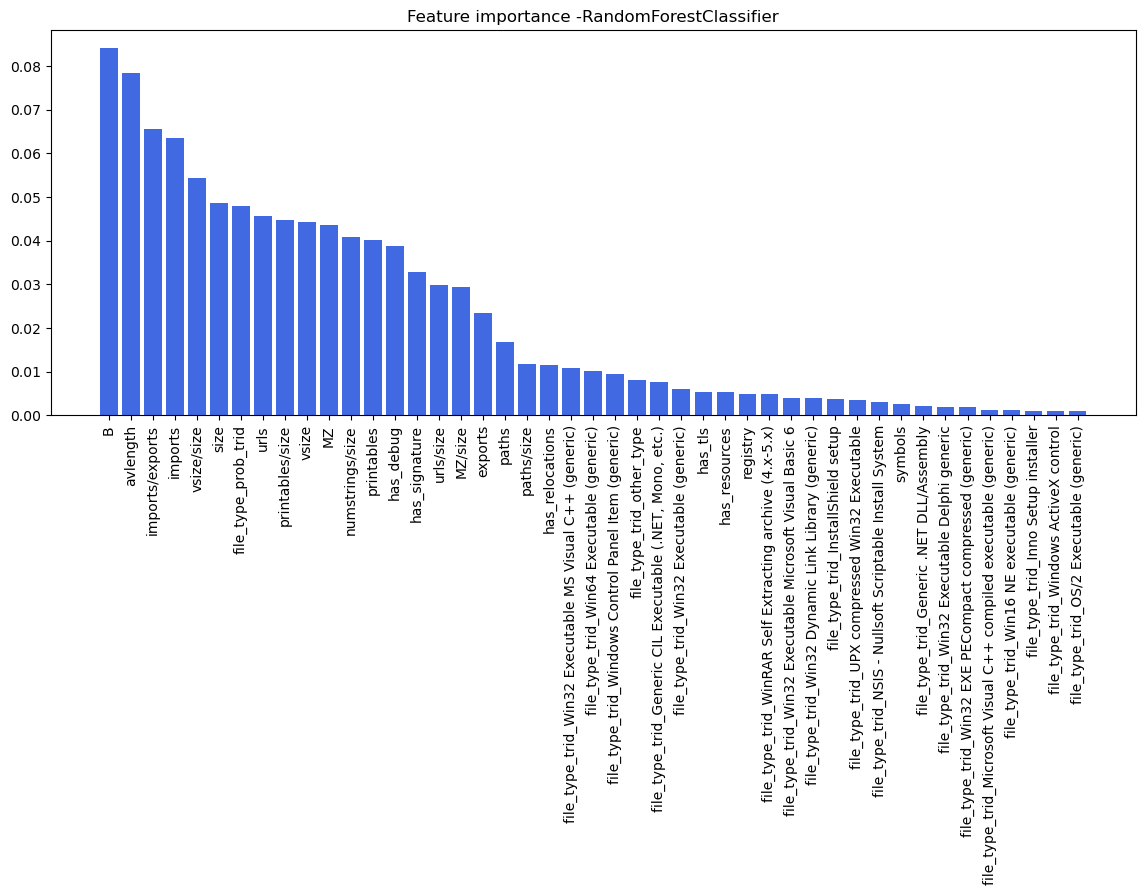

In [99]:
importances_forest = rf.feature_importances_  #save the importance of features
sorded_featues_by_index_forest = np.argsort(importances_forest)[::-1]  # sort the index of the feature importances in descending way
importances_titles_forest = train_data_tree.columns[sorded_featues_by_index_forest]  #save the names of the features in the same order

#plot -  from recitation 8  
plt.figure(figsize=(14,5))
plt.title('Feature importance -RandomForestClassifier')
plt.bar(range(train_data_tree.shape[1]), importances_forest[sorded_featues_by_index_forest], color = 'royalblue')
plt.xticks(range(train_data_tree.shape[1]), importances_titles_forest, rotation='vertical')
plt.show()

Also for this model the feature B (which we don't know what it means) is one of the most important features. It is followed by avglength, imports, imports/exports, vsize/size - their contribution is great since according to their distribution they manage to explain a lot about the label being malicious or bengin.<bt>
The features symbols, registry and those that talk about the file type have the lowest contribution.<br>
The feature importance for this model is different than the DecisionTree due to the fact that in random forest an analysis is performed for a large number of trees and it is possible that for a large number of trees, the features get different importance than for a single tree.

# Part 4 - Evaluation of the models

In this section, several auxiliary functions will be built in order not to duplicate code.

In [100]:
#function to create confusion_matrix
#the function accepts validation_data, validation_labels and the model and prints the confusion_matrix for the model

def confusion_matrix_plot(validation_data, validation_labels, classifier):
    predictions = classifier.predict(validation_data)
    train_cm = confusion_matrix(validation_labels, predictions)
    tn, fp, fn, tp = train_cm.ravel()
    accuracy = (tn + tp) / (tn + fp + fn + tp)  

    print('Confusion Matrix:\n', train_cm)
    print('Accuracy:\n', accuracy)

    disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=classifier.classes_)
    disp.plot(cmap='tab20c')
    plt.show()
    return predictions

In [101]:
# function to calculate the accuracy of each model while performing cross validation
#the function accepts validation_data, validation_labels and the model and prints the average accuracy for the model
def kf_cv_accuracy(validation_data, validation_labels, classifier):
    accuracy_cv = cross_val_score(classifier, validation_data, validation_labels, scoring='accuracy', cv=5)
    print(f'Accuracy score of the model with 5-fold cross-validation is: {accuracy_cv.mean()}')
    return accuracy_cv

In [102]:
#function to calculate the AUC of each model while performing cross validation
#the function accepts validation_data, validation_labels and the model and prints the average AUC for the model
def kf_cv_AUC(validation_data, validation_labels, classifier):
    AUC_cv = cross_val_score(classifier, validation_data, validation_labels, scoring='roc_auc', cv=5)
    print(f'AUC score of the model with 5-fold cross-validation is: {AUC_cv.mean()}')
    return AUC_cv

ROC Curve - a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. <br>
The ROC curve is created by plotting the true rate (TPR) against the false positive rate (FPR) at various threshold settings.<br>
The closer it gets to the top left corner, the better the classifier is.<br>
The bigger AUC (area under curve), the better the classifier is.<br>
Here we will show the ROC response of different datasets, created from K-fold cross-validation. Taking all of these curves, it is possible to calculate the mean AUC, and see the variance of the curve when the training set is split into different subsets. This roughly shows how the classifier output is affected by changes in the training data, and how different the splits generated by K-fold cross-validation are from one another.

In [103]:
#function to print a graph showing the AUC for KFOLD and also the average AUC of the model

def ROC_KFOLD_graphs(data, labels, classifier):
    cv = StratifiedKFold(n_splits=5)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(7,7))
    
    for fold, (train, test) in enumerate(cv.split(data, labels)):
        classifier.fit(data.iloc[train], labels.iloc[train])
        viz = RocCurveDisplay.from_estimator(classifier, data.iloc[test], labels.iloc[test],
                                             name=f'ROC fold {fold+1}', alpha=0.3, lw=2, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    ax.plot(mean_fpr, mean_tpr, color = 'b', label = f'Mean ROC (AUC = {mean_auc:.5f})', lw = 2, alpha = 0.5)

    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    ax.legend(loc='lower right')
    plt.show()

In [104]:
scores_map = {} #creating a dictionary in which we will save all the accuracy values of each model for the training set and the validation set
AUC_map = {} ##creating a dictionary in which we will save all the AUC values of each model for the training set and the validation set

## KNN

In [105]:
print('Train Accuracy')
KNN_acc_train = kf_cv_accuracy(train_data_knn_log, train_labels_knn_log, KNN)
scores_map['KNeighborsClassifier_Train'] = KNN_acc_train

print('\nValidation Accuracy')
KNN_acc_val = kf_cv_accuracy(validation_data_knn_log, validation_labels_knn_log, KNN)
scores_map['KNeighborsClassifier_Validation'] = KNN_acc_val

print(f'\nThe differene between the Train and the Validation accuracy is {KNN_acc_train.mean()-KNN_acc_val.mean()}')

Train Accuracy


Accuracy score of the model with 5-fold cross-validation is: 0.8626874999999998

Validation Accuracy
Accuracy score of the model with 5-fold cross-validation is: 0.8370833333333334

The differene between the Train and the Validation accuracy is 0.025604166666666428


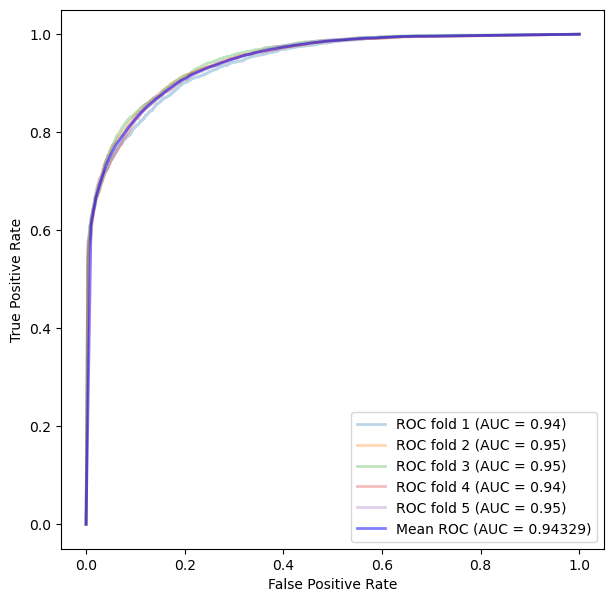

In [106]:
ROC_KFOLD_graphs(train_data_knn_log, train_labels_knn_log, KNN)

KNN - train data<br>
We can tell that the AUC is quite big. <br>
The splits give similar scores which means we get consistant classifications- similar to one another.

In [107]:
print('Train AUC')
train_AUC_KNN = kf_cv_AUC(train_data_knn_log, train_labels_knn_log,KNN)
AUC_map['KNeighborsClassifier_Train'] = train_AUC_KNN

print('\nValidation AUC')
validation_AUC_KNN = kf_cv_AUC(validation_data_knn_log, validation_labels_knn_log,KNN)
AUC_map['KNeighborsClassifier_Validation'] = validation_AUC_KNN

print(f'\nThe differene between the Train and the Validation AUC is {train_AUC_KNN.mean() - validation_AUC_KNN.mean()}')

Train AUC
AUC score of the model with 5-fold cross-validation is: 0.9449711807613118

Validation AUC
AUC score of the model with 5-fold cross-validation is: 0.9251926574541092

The differene between the Train and the Validation AUC is 0.019778523307202645


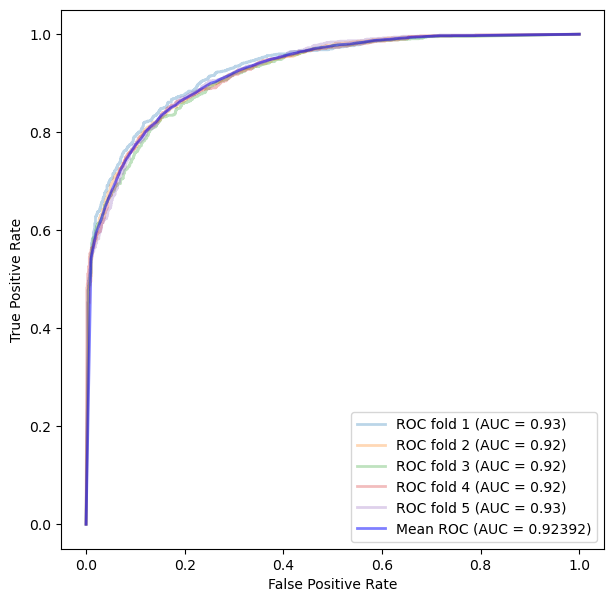

In [108]:
ROC_KFOLD_graphs(validation_data_knn_log, validation_labels_knn_log, KNN)

KNN - validation data<br>
We can tell that the AUC is quite big, but has quite a large difference from the train AUC. This might indicate overfitting. <br>
The splits give similar scores which means we get consistant classifications- similar to one another.

## Logistic Regression

In [109]:
print('Train Accuracy')
lr_cc_train = kf_cv_accuracy(train_data_knn_log, train_labels_knn_log,lr)
scores_map['LogisticRegression_Train'] = lr_cc_train

print('\nValidation Accuracy')
lr_acc_val = kf_cv_accuracy(validation_data_knn_log, validation_labels_knn_log,lr)
scores_map['LogisticRegression_Validation'] = lr_acc_val

print(f'\nThe differene between the Train and the Validation is {lr_cc_train.mean()-lr_acc_val.mean()}')

Train Accuracy
Accuracy score of the model with 5-fold cross-validation is: 0.7611458333333333

Validation Accuracy
Accuracy score of the model with 5-fold cross-validation is: 0.7585000000000001

The differene between the Train and the Validation is 0.0026458333333332362


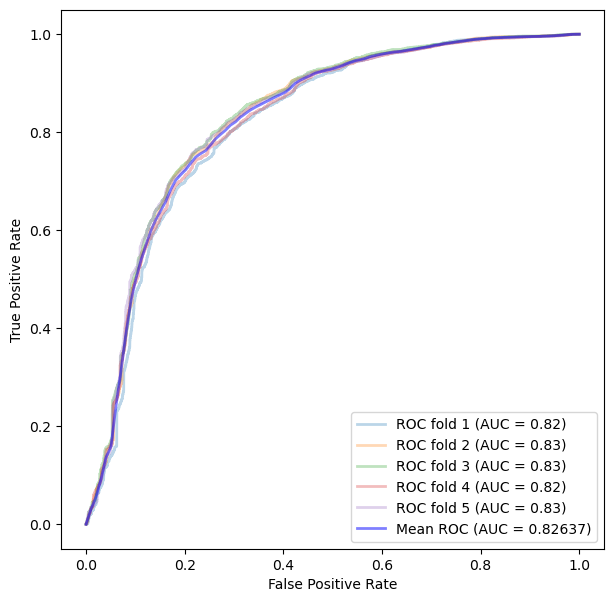

In [110]:
ROC_KFOLD_graphs(train_data_knn_log,train_labels_knn_log, lr)

Logistic Regression - train data<br>
We can tell that the AUC is relatively small - this can indicate that the classifier doesn't do a great job. <br>
The splits give similar scores which means we get consistant classifications- similar to one another.

In [111]:
print('Train AUC')
train_AUC_lr = kf_cv_AUC(train_data_knn_log, train_labels_knn_log,lr)
AUC_map['LogisticRegression_Train'] = train_AUC_lr

print('\nValidation AUC')
validation_AUC_lr = kf_cv_AUC(validation_data_knn_log, validation_labels_knn_log,lr)
AUC_map['LogisticRegression_Validation'] = validation_AUC_lr

print(f'\nThe differene between the Train and the Validation AUC is {train_AUC_lr.mean() - validation_AUC_lr.mean()}')

Train AUC
AUC score of the model with 5-fold cross-validation is: 0.8264000971180936

Validation AUC
AUC score of the model with 5-fold cross-validation is: 0.8195767890215979

The differene between the Train and the Validation AUC is 0.006823308096495673


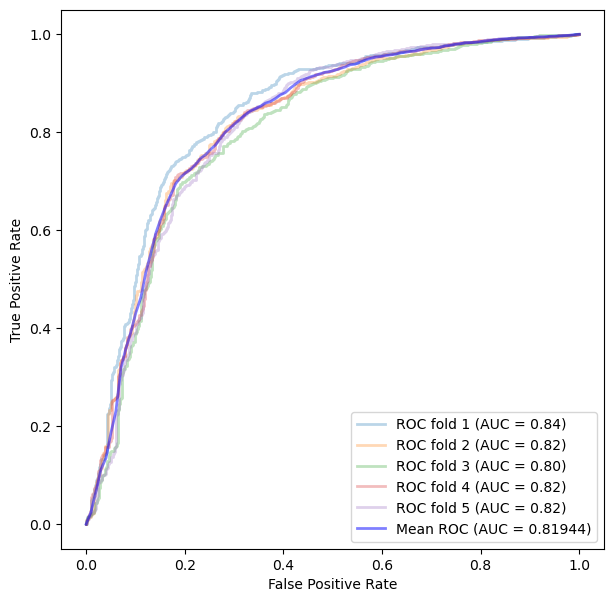

In [112]:
ROC_KFOLD_graphs(validation_data_knn_log, validation_labels_knn_log, lr)

Logistic Regression - validation data<br>
We can tell that the AUC is relatively small - this can indicate that the classifier doesn't do a great job, but it makes sense according to the train AUC score.<br>
The difference between the validation AUC and the train AUC is small - good news for our classifier, we can infer that there probably won't be overfitting. <br>
The splits give relatibely less similar scores which means we get less consistant classifications.

## Desicion Tree

In [113]:
print('Train Accuracy')
tree_acc_train = kf_cv_accuracy(train_data_tree, train_labels_tree, dtc)
scores_map['DecisionTreeClassifier_Train'] = tree_acc_train

print('\nValidation Accuracy')
tree_acc_val = kf_cv_accuracy(validation_data_tree, validation_labels_tree, dtc)
scores_map['DecisionTreeClassifier_Validation'] = tree_acc_val

print(f'\nThe differene between the Train and the Validation is {tree_acc_train.mean()-tree_acc_val.mean()}')

Train Accuracy
Accuracy score of the model with 5-fold cross-validation is: 0.8734375

Validation Accuracy
Accuracy score of the model with 5-fold cross-validation is: 0.8290000000000001

The differene between the Train and the Validation is 0.04443749999999991


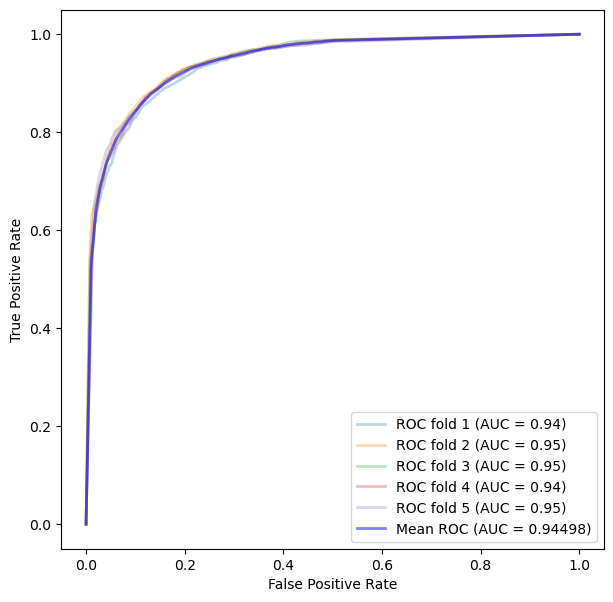

In [114]:
ROC_KFOLD_graphs(train_data_tree, train_labels_tree, dtc)

Decision Tree - train data<br>
We can tell that the AUC is quite big. <br>
The splits give similar scores which means we get consistant classifications- similar to one another.

In [115]:
print('Train AUC')
train_AUC_dtc = kf_cv_AUC(train_data_tree, train_labels_tree,dtc)
AUC_map['DecisionTreeClassifier_Train'] = train_AUC_dtc

print('\nValidation AUC')
validation_AUC_dtc = kf_cv_AUC(validation_data_tree, validation_labels_tree,dtc)
AUC_map['DecisionTreeClassifier_Validation'] = validation_AUC_dtc

print(f'\nThe differene between the Train and the Validation AUC is {train_AUC_dtc.mean() - validation_AUC_dtc.mean()}')

Train AUC
AUC score of the model with 5-fold cross-validation is: 0.9456121922964293

Validation AUC
AUC score of the model with 5-fold cross-validation is: 0.911722017707055

The differene between the Train and the Validation AUC is 0.03389017458937438


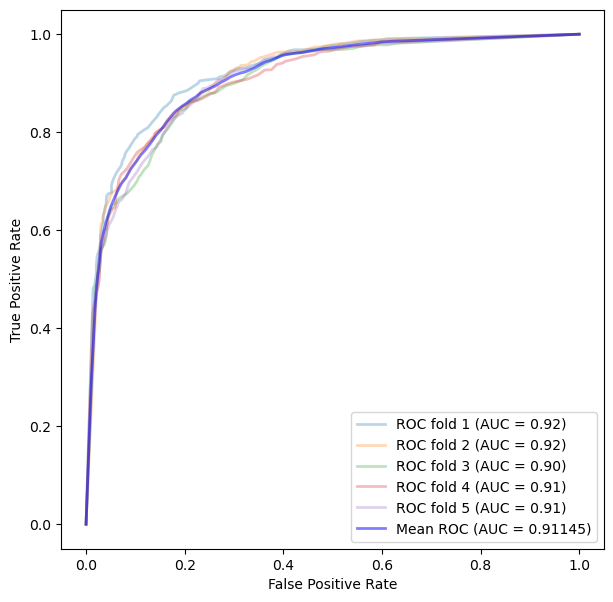

In [116]:
ROC_KFOLD_graphs(validation_data_tree, validation_labels_tree,dtc)

Decision Tree - validation data<br>
We can tell that the AUC is not that big, and has a slight difference from the train AUC. This might indicate overfitting. <br>
The splits give similar scores which means we get consistant classifications- similar to one another.

## Random Forest

Confusion Matrix:
 [[5692  323]
 [ 510 5475]]
Accuracy:
 0.9305833333333333


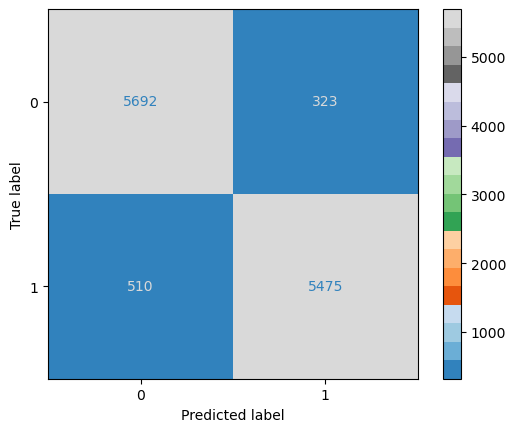

In [117]:
forest_pred = confusion_matrix_plot(validation_data_tree, validation_labels_tree,rf)

Confusion Matrix - (the numbers might change in each devision to train/validation/cv) <br>
* ~~ 5711 - true positive (TP) - we predicted positive and the true value is positive (we were 'true') - <br>in the case of our data - we predicted that the file is malicious and it is indeed malicious  <br><br>
* ~~ 304 - false positive (FP) - we predicted positive and the true value is negative (we were 'false') -<br>in the case of our data - we predicted that the file is malicious and it is actually bengin  <br><br>
* ~~ 503 - false negative (FN)- we predicted negative and the real value is positive (we were 'false') -<br>in the case of our data - we predicted that the file is bengin and is actually malicious  <br><br>
* ~~ 5482 - true negative (TN) - we predicted a negative and the true value is negative (we were 'true') - <br>in the case of our data - we predicted that the file is bengin and it is indeed bengin  <br>

main conclusions -
1. Accuracy = How many files were labeled correctly out of all the files in the data <br>
We would like this value to be as high as possible in order to correctly predict as large a percentage as possible of the new examples <br>
$ Accuracy = \frac{TP + TN}{TP + FP + FN + TN} $  -----> $ Accuracy = \frac{5711 + 5482}{5711 + 304 + 503 + 5482} $  -----> $ Accuracy = ~~0.932 $ <br>  <br> 

2. Precision = Some of those labeled as malicious files are really malicious <br>
We would like this value to be as high as possible, so that our prediction is as good as possible and without errors <br>
$ Precision = \frac{TP}{TP+FP} $ -----> $ Precision = \frac{5711}{5711+304} $ -----> $ Precision = ~~0.949 $ <br> <br>

3. Recall/Sensitivity = Of all the malicious files, how many of these we predicted correctly (we said they were malicious) <br>
We would like this value to be as high as possible,so that our prediction is as good as possible and without errors <br>
$ Sensitivity = \frac{TP}{TP+FN} $ -----> $ Sensitivity = \frac{5711}{5711+503} $ -----> $ Sensitivity = ~~0.919 $ <br> <br>

4. Specificity = Of all the bengin files, how many of them we predicted correctly (we said they were bengin) <br>
We would like this value to be as high as possible, so that our prediction is as good as possible and without errors <br>
$ Specificity = \frac{TN}{TN+FP} $ -----> $ Specificity = \frac{5482}{5482+304} $ -----> $ Specificity = ~~0.947 $ <br> <br>

5. False alarm = Of all the bengin files,  how many of them we predicted wrongly (we said they were malicious) <br>
We would like this value to be as low as possible, so that our error is small <br>
$ False alarm = \frac{FP}{TP+FP} $ -----> $ False alarm = \frac{304}{5711+304} $ -----> $ False alarm = ~~0.05 $ <br>

As we can see, for each type of measurement we got the result we were hoping for


In [118]:
print('Train Accuracy')
forest_acc_train = kf_cv_accuracy(train_data_tree, train_labels_tree, rf)
scores_map['RandomForestClassifier_Train'] = forest_acc_train

print('\nValidation Accuracy')
forest_acc_val = kf_cv_accuracy(validation_data_tree, validation_labels_tree, rf)
scores_map['RandomForestClassifier_Validation'] = forest_acc_val

print(f'\nThe differene between the Train and the Validation is {forest_acc_train.mean()-forest_acc_val.mean()}')

Train Accuracy


Accuracy score of the model with 5-fold cross-validation is: 0.928375

Validation Accuracy
Accuracy score of the model with 5-fold cross-validation is: 0.9088333333333333

The differene between the Train and the Validation is 0.01954166666666668


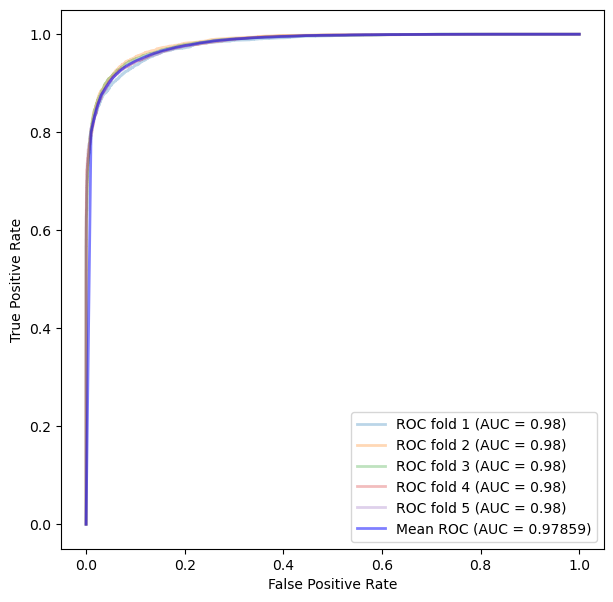

In [119]:
ROC_KFOLD_graphs(train_data_tree ,train_labels_tree,rf)

Random Forest - train data<br>
We can tell that the AUC is big - the classifier does a good job. <br>
The splits give similar scores which means we get consistant classifications- similar to one another.

In [120]:
print('Train AUC')
train_AUC_rf = kf_cv_AUC(train_data_tree, train_labels_tree,rf)
AUC_map['RandomForestClassifier_Train'] = train_AUC_rf

print('\nValidation AUC')
validation_AUC_rf = kf_cv_AUC(validation_data_tree, validation_labels_tree,rf)
AUC_map['RandomForestClassifier_Validation'] = validation_AUC_rf


Train AUC
AUC score of the model with 5-fold cross-validation is: 0.9820923193937011

Validation AUC
AUC score of the model with 5-fold cross-validation is: 0.9715013496612132


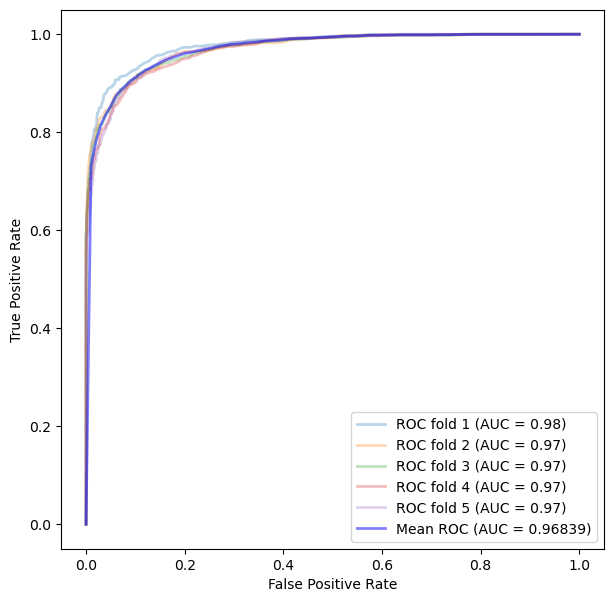

In [121]:
ROC_KFOLD_graphs(validation_data_tree, validation_labels_tree,rf)

Random Forest - validation data<br>
We can tell that the AUC is big - the classifier does a good job.<br>
The difference between the validation AUC and the train AUC is small - good news for our classifier, we can infer that there probably won't be overfitting. <br>
The splits give similar scores which means we get consistant classifications- similar to one another.

## Comparing the models

All models accuracy

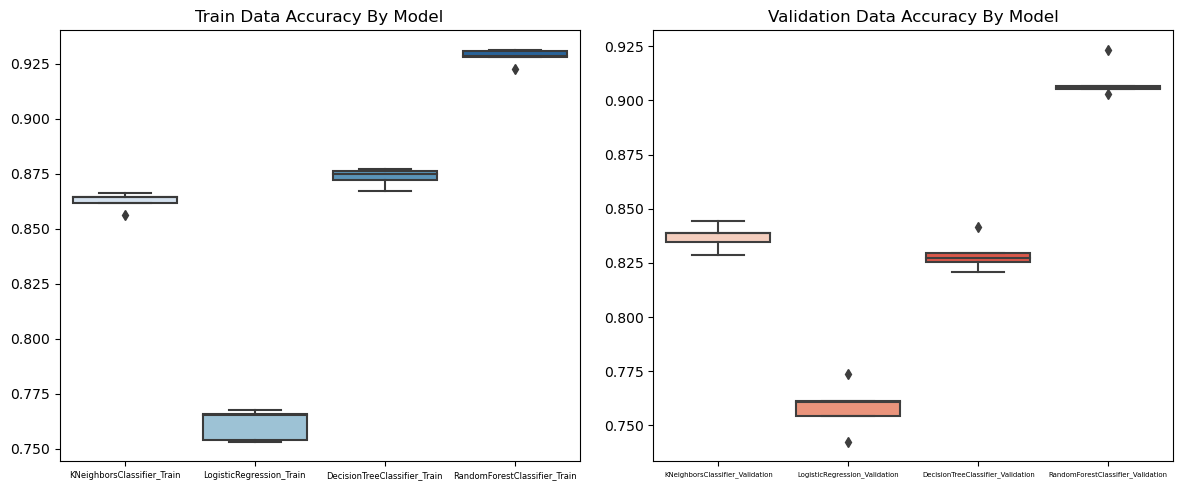

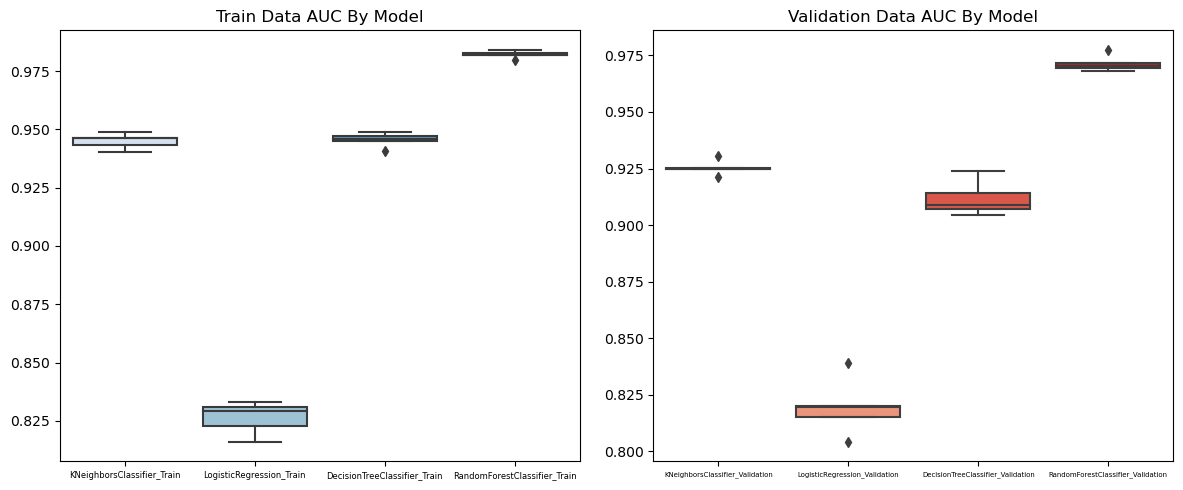

In [122]:
substring_val = 'Validation'
substring_train = 'Train'

validation_map = {key: value for key, value in scores_map.items() if substring_val in key}
train_map = {key: value for key, value in scores_map.items() if substring_train in key}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax1 = sns.boxplot(data=pd.DataFrame(train_map), ax=axes[0], palette='Blues')
ax1.set_title('Train Data Accuracy By Model')
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=6)  
ax2 = sns.boxplot(data=pd.DataFrame(validation_map), ax=axes[1], palette='Reds')
ax2.set_title('Validation Data Accuracy By Model')
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=5)

plt.tight_layout()
plt.show()

validation_map_auc = {key: value for key, value in AUC_map.items() if substring_val in key}
train_map_auc = {key: value for key, value in AUC_map.items() if substring_train in key}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax1 = sns.boxplot(data=pd.DataFrame(train_map_auc), ax=axes[0], palette='Blues')
ax1.set_title('Train Data AUC By Model')
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=6)  
ax2 = sns.boxplot(data=pd.DataFrame(validation_map_auc), ax=axes[1], palette='Reds')
ax2.set_title('Validation Data AUC By Model')
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=5)

plt.tight_layout()
plt.show()


From the analysis of the boxplots the picture is clear - <br>
The random forest model has the best performance. <br>
It can be seen for both training and validation that the accuracy score of this model is the highest, with very low variance and almost no gap between training and validation.<br>
Similarly to the AUC test.

All models AUC

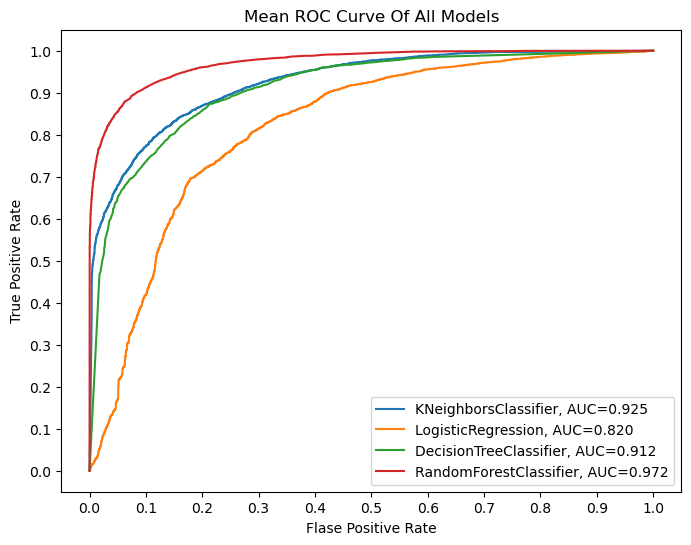

In [123]:
def roc_all_models(model, val_data, val_labels, result_table):
    yproba = cross_val_predict(model, val_data, val_labels, cv=5, method='predict_proba')[:, 1]  #predict using cv=5
    fpr, tpr, _ = roc_curve(val_labels, yproba) #find the true positive and false positive rates
    auc_scores = cross_val_score(model, val_data, val_labels, cv=5, scoring='roc_auc') #find the AUC score using cv=5
    auc_mean = auc_scores.mean() #the result will be the mean AUC of all cv
    result_table = result_table.append({'classifiers': str(model), 'fpr': fpr, 'tpr': tpr, 'auc': auc_mean}, ignore_index=True) #all the results to the df
    return result_table

result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc']) #create an empty df to save the results

# call function for each model and add the results to the result_table
result_table = roc_all_models(KNN, validation_data_knn_log, validation_labels_knn_log, result_table)
result_table = roc_all_models(lr, validation_data_knn_log, validation_labels_knn_log, result_table)
result_table = roc_all_models(dtc, validation_data_tree, validation_labels_tree, result_table)
result_table = roc_all_models(rf, validation_data_tree, validation_labels_tree, result_table)

#plot all the ROC curves
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    model_name = result_table.loc[i]['classifiers'].split('(')[0]  #the classifiers also includes the hyperparametrs so we will take onlt the "word" of the classifiers
    auc_score = result_table.loc[i]['auc']  #save the auc for the model
    plt.plot(result_table.loc[i]['fpr'], result_table.loc[i]['tpr'], label='{}, AUC={:.3f}'.format(model_name, auc_score))

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('Flase Positive Rate')
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve Of All Models')
plt.legend(loc='lower right')
plt.show()

This plot strengthens the argument the the Random Forest classifier is the ideal one for us because it is the closest to the top left corner.<br>
Which means it has the highest ability to distinguish the positive class values from the negative ones. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.


#### SELECTED MODEL - RANDOM FOREST

Our selected node is a random forest.
We chose this model both because its performance on the validation set is the highest and because the difference between the performance on the training set and the validation set is small. <br>
It can be seen that the performance of this model is the best out of the boxplots in which the random forest received the best score both in the accuracy measurement and in the AUC measurement, both for the training set and for the validation set. <br>
Another way is in the graph showing the average AUC for each model, where also the random forest model received the best score

In [124]:
print(f'\nThe differene between the Train and the Validation AUC is {train_AUC_rf.mean() - validation_AUC_rf.mean()}')


The differene between the Train and the Validation AUC is 0.010590969732487965


We can see the difference between the average AUC (after 5 folds) for training and validation is  0.01. <br>
This is a small gap that on the one hand shows that our model is reliable and predicts the labels well and on the other hand indicates that there is no overfitting since the model does not accurately predict all the examples

# Part 5 - Making a prediction

### Pipeline for running the final model

In [ ]:
df_train = pd.read_csv('train.csv') #load the data
df_to_test = pd.read_csv('test.csv') #load the data

#run the preprocessing on the test and train - function in section 2
df_to_test, features_encoded_train, labels_encoded_train, features_encoded_test =  preprocessing(df_train, df_to_test) 

# Run the selected model
params_forest = {'max_depth': range(30, 40, 5),'n_estimators': range(100, 150, 10), 'min_samples_split' :range(2, 6, 2)}  
clf_forest = RandomForestClassifier(random_state=0)

#We chose the roc_auc score type with the understanding that the model is measured according to its AUC score
grid_search_cv_forest_test = GridSearchCV(clf_forest, params_forest, scoring='roc_auc', n_jobs=2, cv=5) 
grid_search_cv_forest_test.fit(features_encoded_train,labels_encoded_train)
test_predict = grid_search_cv_forest_test.predict_proba(features_encoded_test)[:,1] #predict 
test_predict = pd.Series(test_predict)
final_df = df_to_test[['sha256']].copy()
final_df['predict_proba'] = test_predict

final_df.to_csv('results_23.csv', index=False) #save the df as a csv


# Part 6 - Tools not taught in the course

In general, SHAP is a mathematical method used to explain how a machine learning model works.<br>
It can show how each feature affects every prediction of the model.<br>
The idea behind SHAP is to assign an importance value, known as the Shapley value, to each feature in a prediction.
The Shapley value measures the contribution of each feature towards the prediction by considering all possible combinations of features and calculating their marginal contributions. Meaning, the Shapley value is the average marginal contribution of a feature considering all possible combinations

In [142]:
! pip install shap # we got a permission to import the package shap

ERROR: Invalid requirement: '#'


In [144]:
import shap 

We thought it would be interesting to examine SHAP upon the mistakes(fp and fn) of our chosen model the Random Forest during the training phase.<br> That way we can draw insights about the model's mistakes.


In [145]:
fn_fp_indices = np.where(validation_labels_tree != rf.predict(validation_data_tree))

fn_fp_data = validation_data_tree.iloc[fn_fp_indices]

explainer = shap.TreeExplainer(rf)
fn_fp_shap_values = explainer.shap_values(fn_fp_data)

In [146]:
# creates the explanation object
explanation_obj = shap.Explanation(values=fn_fp_shap_values[0], base_values=explainer.expected_value[0], data=fn_fp_data)

We will show two waterfall plots - display of a single prediction.

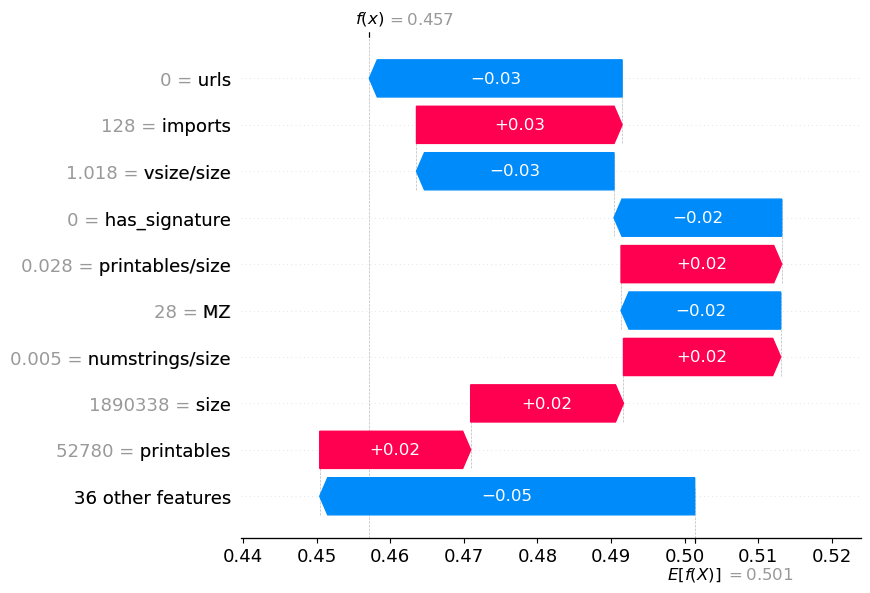

In [147]:
shap.plots.waterfall(explanation_obj[0])

In this waterfall plot we can see a breakdown of how each feature contributes towards the prediction:<br><br>
On the left hand side all features are ranked from top to bottom by how much impact they have on the models prediction for this specific example. The grey numbers are the values of the specific example. <br><br>
On the bottom of the plot is the base value. E[f(x)] is the expected value of the labels = the mean of all predictions. In our case E[f(x)]=0.501 therfore, we can conclude that the labels of our mistakes are equally divided into malicious and bengin.<br><br>
Inside the plot the SHAP values quantify the amount and direction in which each feature impacts the prediction. <br>
* The blue arrows "push" the model towards predction 0 - bengin
* The red arrows "push" the model towards predction 1 - malicious

Finally, f(x) is the model's predicted probabality for this example. It's calculated by the base value plus the sum of all the SHAP values.<br><br>
Reminder! we're talking about the mistakes of our model, meaning that in this case the prediction tended to 0-bengin (f(x)=0.393) and it's wrong. The example's label is actually 1 - malicious. So for example, the feature 'urls' with the biggest impact on the prediction, actually had a "bad" impact on our model, it has a lot of responsibility for our mistake. Whereas, the feature 'numstrings/size' had a large and "good" impact on our prediction (of course not strong enough).

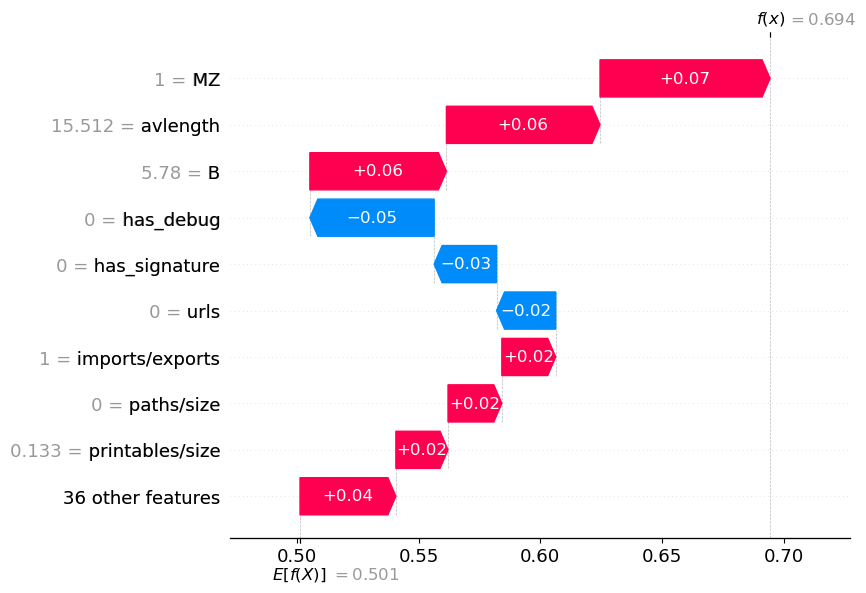

In [ ]:
shap.plots.waterfall(explanation_obj[20])

Here we chose a different example.<br>
Now we can see how different features are ranked from top to bottom by how much impact they have on the models prediction for this specific example. The grey numbers are the values of the specific example.<br>
We can tell that the base value didn't change proparly.<br>
Inside the plot the different features have different SHAP values of course.<br>
In this case f(x) is the model's predicted probabality for this example.<br>

Reminder! we're talking about the mistakes of our model, meaning that in this case the prediction tended to 1-malicious (f(x)=0.743) and it's wrong. The example's label is actually 0 - bengin. So for example, the features 'avlength','MZ' and 'B' with the biggest impact on the prediction, actually had a "bad" impact on our model, they have a lot of responsibility for our mistake.

Let's take a look at a beeswarm plot - an information-dense summary of how the top features in a dataset impact the model's false predictions.

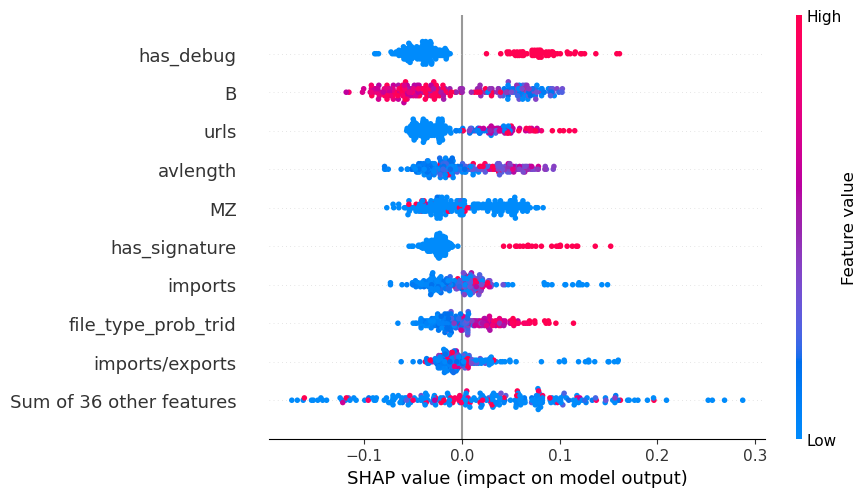

In [ ]:
shap.plots.beeswarm(explanation_obj)

On the left hand side all features are ranked from top to bottom by their mean absolute SHAP values for the entire dataset.<br><br>
The color bar on the right hand side indicates the size of the raw values of feature for each example on the graph.<br><br>
When we look at the color distribution horizaontally for each feature, it teaches us about the relationship between a features raw value and it's SHAP value.<br>
For instance, we see that lower values of 'urls'(in blue) have negative SHAP values(=push towards 0) while higher values of 'urls'(in red) have positive SHAP values(=push towards 1)<br>
It is also intersting to learn from this about feature 'B' since it is an anonymous feature and as we can see- has large importance, especially because from the plot it looks different from the rest of the features - as B value is higher, it has negative impact and as B value is lower, it has positive impact on the label prediction unlike the other features described in the plot.<br><br>
Examining how the SHAP values are distributed reveals how a feature may influence the model's predictions.
For instance, for 'urls', we can see a dense cluster of lower values of urls (blue points) with small but negtive SHAP values. While, instances of higher values of urls (red points) extend further towards the right, 
suggesting higher values of urls have a stronger positive impact on the label prediction than the negative impact of lower values of urls on the label prediction.<br><br>
Reminder! we're talking about the mistakes of our model. 